In [1]:
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 4.4 MB/s eta 0:00:0000:0100:01m
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached contourpy-1.1.0-cp38-cp38-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 3.0 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.4-cp38-cp38-macosx_11_0_arm64.whl (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 4.3 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('./Data.xlsx', sheet_name = None)

In [4]:
df.keys()

dict_keys(['ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'MADHYA PRADESH', 'MAHARASHTRA', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'TAMIL NADU', 'TELANGANA', 'UTTAR PRADESH', 'WEST BENGAL'])

In [5]:
def preprocess(state_df, state):
    columns = state_df.columns
    
    columns_to_remove = []
    for column in columns:
        if 'lacs' in column:
            column_renamed = column.replace('lacs', 'crores')
            state_df[column_renamed] = (state_df[column] / 100 )
            columns_to_remove.append(column)
        elif 'millions' in column:
            column_renamed = column.replace('millions', 'crores')
            state_df[column_renamed] = (state_df[column] / 10 )
            columns_to_remove.append(column)
        else:
            pass

    state_df = state_df.drop(columns = columns_to_remove)
    transposed_state_df = state_df.T
    transposed_state_df = transposed_state_df.reset_index()
    
    transposed_state_df.columns = transposed_state_df.iloc[0]
    transposed_state_df = transposed_state_df[1:].reset_index(drop=True)
    transposed_state_df['state'] = state
    return transposed_state_df

In [6]:
state_dfs = [preprocess(df[state], state) for state in df.keys()]
len(state_dfs)

19

In [7]:
state_dfs[0].head()

0                    Year total revenue Own Tax Revenue Total expenditure  \
0  2021-22 RE (in crores)    154272.703       73631.848        173817.837   
1  2020-21 RE (in crores)    118063.092       57358.777        152989.887   
2  2019-20 RE (in crores)    110871.149      57428.9315       137518.0662   
3  2018-19 RE (in crores)    114684.145       58694.786        126339.055   
4  2017-18 RE (in crores)     123254.01        52715.68         127272.02   

0 Developmental Expenditure Education, Sports, Arts and Culture  \
0                125589.937                           22675.442   
1                 104449.54                           20678.263   
2                 93542.229                          19961.2032   
3                  86528.31                           19341.755   
4                  87996.05                            20219.53   

0 Medical and Public Health Family Welfare Non Developmental Expenditure  \
0                   9240.67       3732.187                     48200.427   
1                  5562.696       3417.939                     48520.612   
2                 5263.2302      2074.5623                    43959.9657   
3                  5219.692       2005.487                     39769.611   
4                   4643.57        1885.75                      39209.29   

0 Interest payments   Salaries    Pensions           state  
0         21996.715  11349.538   12931.783  ANDHRA PRADESH  
1           22026.3   9456.856   14506.891  ANDHRA PRADESH  
2        16392.9193  7890.6382  17381.5059  ANDHRA PRADESH  
3         14303.526   7598.965   15290.553  ANDHRA PRADESH  
4          14756.17    7266.93    14384.82  ANDHRA PRADESH

In [8]:
state_dfs[18].head()

0                    Year total revenue Own Tax Revenue Total expenditure  \
0  2021-22 RE (in crores)    176031.061        73904.58        208994.659   
1  2020-21 RE (in crores)    145970.991       59886.588        180316.013   
2  2019-20 RE (in crores)      163259.0         65806.0          169430.0   
3  2018-19 RE (in crores)    152625.477        61616.86        160149.604   
4  2017-18 RE (in crores)     133034.08        45478.47         144039.69   

0 Developmental Expenditure Education, Sports, Arts and Culture  \
0                133305.436                           38093.594   
1                112370.493                           36435.995   
2                  104582.0                          32267.6104   
3                102793.623                             28939.6   
4                  90816.86                            25518.28   

0 Medical and Public Health Family Welfare Non Developmental Expenditure  \
0                 13831.013       1253.791                     75176.056   
1                  10901.11        896.288                     67435.562   
2                 8470.1084       974.0065                       64336.0   
3                  7474.239        745.383                     56847.109   
4                   6973.45         687.32                      52724.33   

0 Interest payments    Salaries    Pensions        state  
0         36561.673   12696.217   22538.424  WEST BENGAL  
1         33593.267   11124.764   19623.153  WEST BENGAL  
2        31305.7621  10972.2413  18324.6448  WEST BENGAL  
3         29140.007    8817.564   15297.409  WEST BENGAL  
4          27595.91     7843.24    14673.64  WEST BENGAL

In [20]:
final_df = pd.concat(state_dfs)
final_df = final_df.sort_values(by = ['state', 'Year'])

final_df.head()

0                    Year total revenue Own Tax Revenue Total expenditure  \
7  2014-15 RE (in crores)      84066.05        38475.11          98308.63   
6  2015-16 RE (in crores)      89380.82        44423.42          93520.94   
5  2016-17 RE (in crores)     107708.88        49282.32         112306.38   
4  2017-18 RE (in crores)     123254.01        52715.68         127272.02   
3  2018-19 RE (in crores)    114684.145       58694.786        126339.055   

0 Developmental Expenditure Education, Sports, Arts and Culture  \
7                  67755.81                            14476.43   
6                  66910.24                            16533.23   
5                  78470.01                            19736.72   
4                  87996.05                            20219.53   
3                  86528.31                           19341.755   

0 Medical and Public Health Family Welfare Non Developmental Expenditure  \
7                   3464.66          670.1                      30456.69   
6                   3631.29         981.43                       26544.7   
5                   4150.07         1367.1                      33770.37   
4                   4643.57        1885.75                      39209.29   
3                  5219.692       2005.487                     39769.611   

0 Interest payments  Salaries   Pensions           state  
7           9676.23   8548.45    9778.01  ANDHRA PRADESH  
6           9477.87   5282.94    9596.74  ANDHRA PRADESH  
5          12208.35   6887.34   12057.74  ANDHRA PRADESH  
4          14756.17   7266.93   14384.82  ANDHRA PRADESH  
3         14303.526  7598.965  15290.553  ANDHRA PRADESH

In [21]:
final_df.shape

(152, 13)

In [22]:
final_df['Year'].unique()

array(['2014-15 RE (in crores)', '2015-16 RE (in crores)',
       '2016-17 RE (in crores)', '2017-18 RE (in crores)',
       '2018-19 RE (in crores)', '2019-20 RE (in crores)',
       '2020-21 RE (in crores)', '2021-22 RE (in crores)'], dtype=object)

In [23]:
final_df.columns

Index(['Year', 'total revenue', 'Own Tax Revenue', 'Total expenditure',
       'Developmental Expenditure', 'Education, Sports, Arts and Culture',
       'Medical and Public Health', 'Family Welfare',
       'Non Developmental Expenditure', 'Interest payments', 'Salaries',
       'Pensions', 'state'],
      dtype='object', name=0)

In [24]:
def compute(df, column_name):
    df[column_name + ' as a percentage of total revenue'] = (df[column_name]*100) / df['total revenue']
    df[column_name + ' as a percentage of Own Tax Revenue'] = (df[column_name]*100) / df['Own Tax Revenue']
    df[column_name + ' as a percentage of Total expenditure'] = (df[column_name]*100) / df['Total expenditure']
    return df

In [30]:
final_df['Revenue Deficit'] = final_df['Total expenditure'] - final_df['total revenue']

final_df['Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare'] = final_df['Education, Sports, Arts and Culture'] + final_df['Medical and Public Health'] + final_df['Family Welfare']
final_df['Interest payments plus Salaries plus Pensions'] = final_df['Interest payments'] + final_df['Salaries'] + final_df['Pensions']

final_df['Medical and Public Health and Family Welfare'] = final_df['Family Welfare'] + final_df['Medical and Public Health']

final_df['Salaries plus Pensions'] = final_df['Salaries'] + final_df['Pensions']

final_df['Own Tax Revenue as a percentage of total revenue'] = ( final_df['Own Tax Revenue'] * 100 ) / final_df['total revenue']
final_df['Own Tax Revenue as a percentage of Total expenditure'] = ( final_df['Own Tax Revenue'] * 100 ) / final_df['Total expenditure']
final_df = compute(final_df, 'Developmental Expenditure')
final_df = compute(final_df, 'Education, Sports, Arts and Culture')
final_df = compute(final_df, 'Medical and Public Health')
final_df = compute(final_df, 'Family Welfare')
final_df = compute(final_df, 'Medical and Public Health and Family Welfare')
final_df = compute(final_df, 'Non Developmental Expenditure')
final_df = compute(final_df, 'Interest payments')
final_df = compute(final_df, 'Salaries')
final_df = compute(final_df, 'Pensions')
final_df = compute(final_df, 'Salaries plus Pensions')
final_df = compute(final_df, 'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare')
final_df = compute(final_df, 'Interest payments plus Salaries plus Pensions')


final_df.columns

Index(['Year', 'total revenue', 'Own Tax Revenue', 'Total expenditure',
       'Developmental Expenditure', 'Education, Sports, Arts and Culture',
       'Medical and Public Health', 'Family Welfare',
       'Non Developmental Expenditure', 'Interest payments', 'Salaries',
       'Pensions', 'state', 'Revenue Deficit',
       'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare',
       'Interest payments plus Salaries plus Pensions',
       'Medical and Public Health and Family Welfare',
       'Salaries plus Pensions',
       'Own Tax Revenue as a percentage of total revenue',
       'Own Tax Revenue as a percentage of Total expenditure',
       'Developmental Expenditure as a percentage of total revenue',
       'Developmental Expenditure as a percentage of Own Tax Revenue',
       'Developmental Expenditure as a percentage of Total expenditure',
       'Education, Sports, Arts and Culture as a percentage of total revenue',
       'Education, Sport

In [31]:
final_df.head()

0                    Year total revenue Own Tax Revenue Total expenditure  \
7  2014-15 RE (in crores)      84066.05        38475.11          98308.63   
6  2015-16 RE (in crores)      89380.82        44423.42          93520.94   
5  2016-17 RE (in crores)     107708.88        49282.32         112306.38   
4  2017-18 RE (in crores)     123254.01        52715.68         127272.02   
3  2018-19 RE (in crores)    114684.145       58694.786        126339.055   

0 Developmental Expenditure Education, Sports, Arts and Culture  \
7                  67755.81                            14476.43   
6                  66910.24                            16533.23   
5                  78470.01                            19736.72   
4                  87996.05                            20219.53   
3                  86528.31                           19341.755   

0 Medical and Public Health Family Welfare Non Developmental Expenditure  \
7                   3464.66          670.1                      30456.69   
6                   3631.29         981.43                       26544.7   
5                   4150.07         1367.1                      33770.37   
4                   4643.57        1885.75                      39209.29   
3                  5219.692       2005.487                     39769.611   

0 Interest payments  Salaries   Pensions           state Revenue Deficit  \
7           9676.23   8548.45    9778.01  ANDHRA PRADESH        14242.58   
6           9477.87   5282.94    9596.74  ANDHRA PRADESH         4140.12   
5          12208.35   6887.34   12057.74  ANDHRA PRADESH          4597.5   
4          14756.17   7266.93   14384.82  ANDHRA PRADESH         4018.01   
3         14303.526  7598.965  15290.553  ANDHRA PRADESH        11654.91   

0 Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare  \
7                                           18611.19                                       
6                                           21145.95                                       
5                                           25253.89                                       
4                                           26748.85                                       
3                                          26566.934                                       

0 Interest payments plus Salaries plus Pensions  \
7                                      28002.69   
6                                      24357.55   
5                                      31153.43   
4                                      36407.92   
3                                     37193.044   

0 Medical and Public Health and Family Welfare Salaries plus Pensions  \
7                                      4134.76               18326.46   
6                                      4612.72               14879.68   
5                                      5517.17               18945.08   
4                                      6529.32               21651.75   
3                                     7225.179              22889.518   

0 Own Tax Revenue as a percentage of total revenue  \
7                                        45.767715   
6                                        49.701289   
5                                        45.755113   
4                                        42.769951   
3                                        51.179512   

0 Own Tax Revenue as a percentage of Total expenditure  \
7                                          39.137063     
6                                          47.501041     
5                                          43.882031     
4                                          41.419693     
3                                          46.458149     

0 Developmental Expenditure as a percentage of total revenue  \
7                                          80.598303           
6                                          74.859729           
5                                          72.853798   

In [32]:
final_df.columns

Index(['Year', 'total revenue', 'Own Tax Revenue', 'Total expenditure',
       'Developmental Expenditure', 'Education, Sports, Arts and Culture',
       'Medical and Public Health', 'Family Welfare',
       'Non Developmental Expenditure', 'Interest payments', 'Salaries',
       'Pensions', 'state', 'Revenue Deficit',
       'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare',
       'Interest payments plus Salaries plus Pensions',
       'Medical and Public Health and Family Welfare',
       'Salaries plus Pensions',
       'Own Tax Revenue as a percentage of total revenue',
       'Own Tax Revenue as a percentage of Total expenditure',
       'Developmental Expenditure as a percentage of total revenue',
       'Developmental Expenditure as a percentage of Own Tax Revenue',
       'Developmental Expenditure as a percentage of Total expenditure',
       'Education, Sports, Arts and Culture as a percentage of total revenue',
       'Education, Sport

In [33]:
plt_columns = ['Revenue Deficit',
    'Own Tax Revenue as a percentage of total revenue', 
               'Own Tax Revenue as a percentage of Total expenditure',
               'Developmental Expenditure as a percentage of total revenue', 
       'Developmental Expenditure as a percentage of Own Tax Revenue',
       'Developmental Expenditure as a percentage of Total expenditure',
       'Education, Sports, Arts and Culture as a percentage of total revenue',
       'Education, Sports, Arts and Culture as a percentage of Own Tax Revenue',
       'Education, Sports, Arts and Culture as a percentage of Total expenditure',
       'Medical and Public Health as a percentage of total revenue',
       'Medical and Public Health as a percentage of Own Tax Revenue',
       'Medical and Public Health as a percentage of Total expenditure',
       'Family Welfare as a percentage of total revenue',
       'Family Welfare as a percentage of Own Tax Revenue',
       'Family Welfare as a percentage of Total expenditure',
               'Medical and Public Health and Family Welfare as a percentage of total revenue',
       'Medical and Public Health and Family Welfare as a percentage of Own Tax Revenue',
       'Medical and Public Health and Family Welfare as a percentage of Total expenditure',
       'Non Developmental Expenditure as a percentage of total revenue',
       'Non Developmental Expenditure as a percentage of Own Tax Revenue',
       'Non Developmental Expenditure as a percentage of Total expenditure',
       'Interest payments as a percentage of total revenue',
       'Interest payments as a percentage of Own Tax Revenue',
       'Interest payments as a percentage of Total expenditure',
       'Salaries as a percentage of total revenue',
       'Salaries as a percentage of Own Tax Revenue',
       'Salaries as a percentage of Total expenditure',
       'Pensions as a percentage of total revenue',
       'Pensions as a percentage of Own Tax Revenue',
       'Pensions as a percentage of Total expenditure',
               'Salaries plus Pensions as a percentage of total revenue',
       'Salaries plus Pensions as a percentage of Own Tax Revenue',
       'Salaries plus Pensions as a percentage of Total expenditure',
       'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare as a percentage of total revenue',
       'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare as a percentage of Own Tax Revenue',
       'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare as a percentage of Total expenditure',
       'Interest payments plus Salaries plus Pensions as a percentage of total revenue',
       'Interest payments plus Salaries plus Pensions as a percentage of Own Tax Revenue',
       'Interest payments plus Salaries plus Pensions as a percentage of Total expenditure']

len(plt_columns)

39

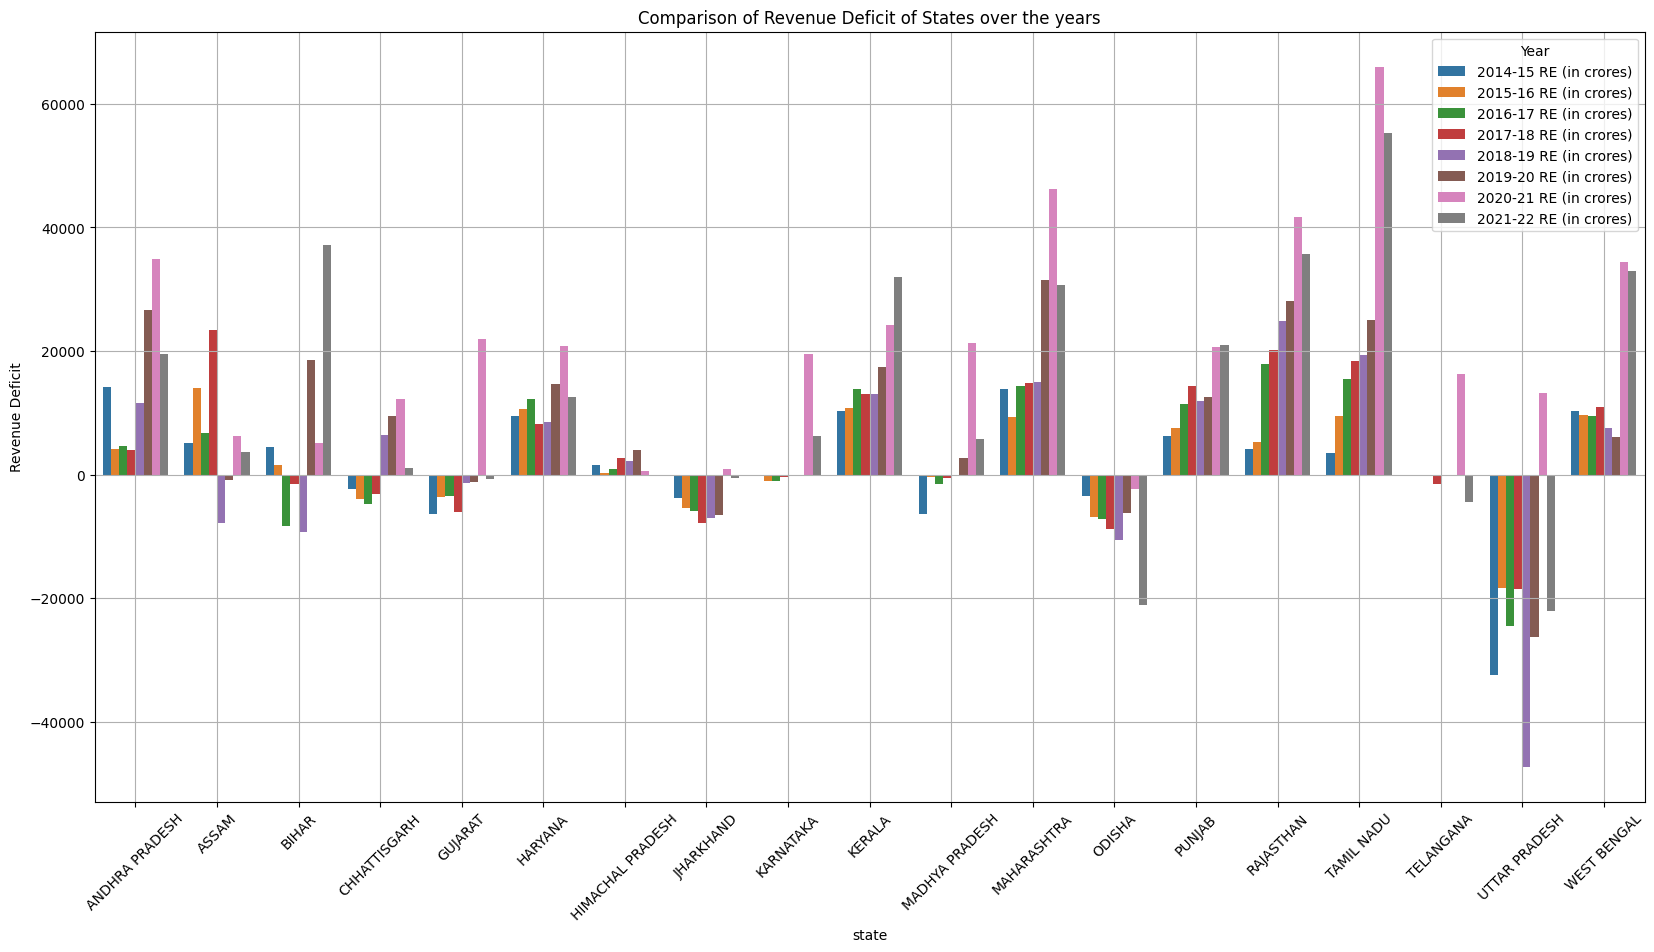

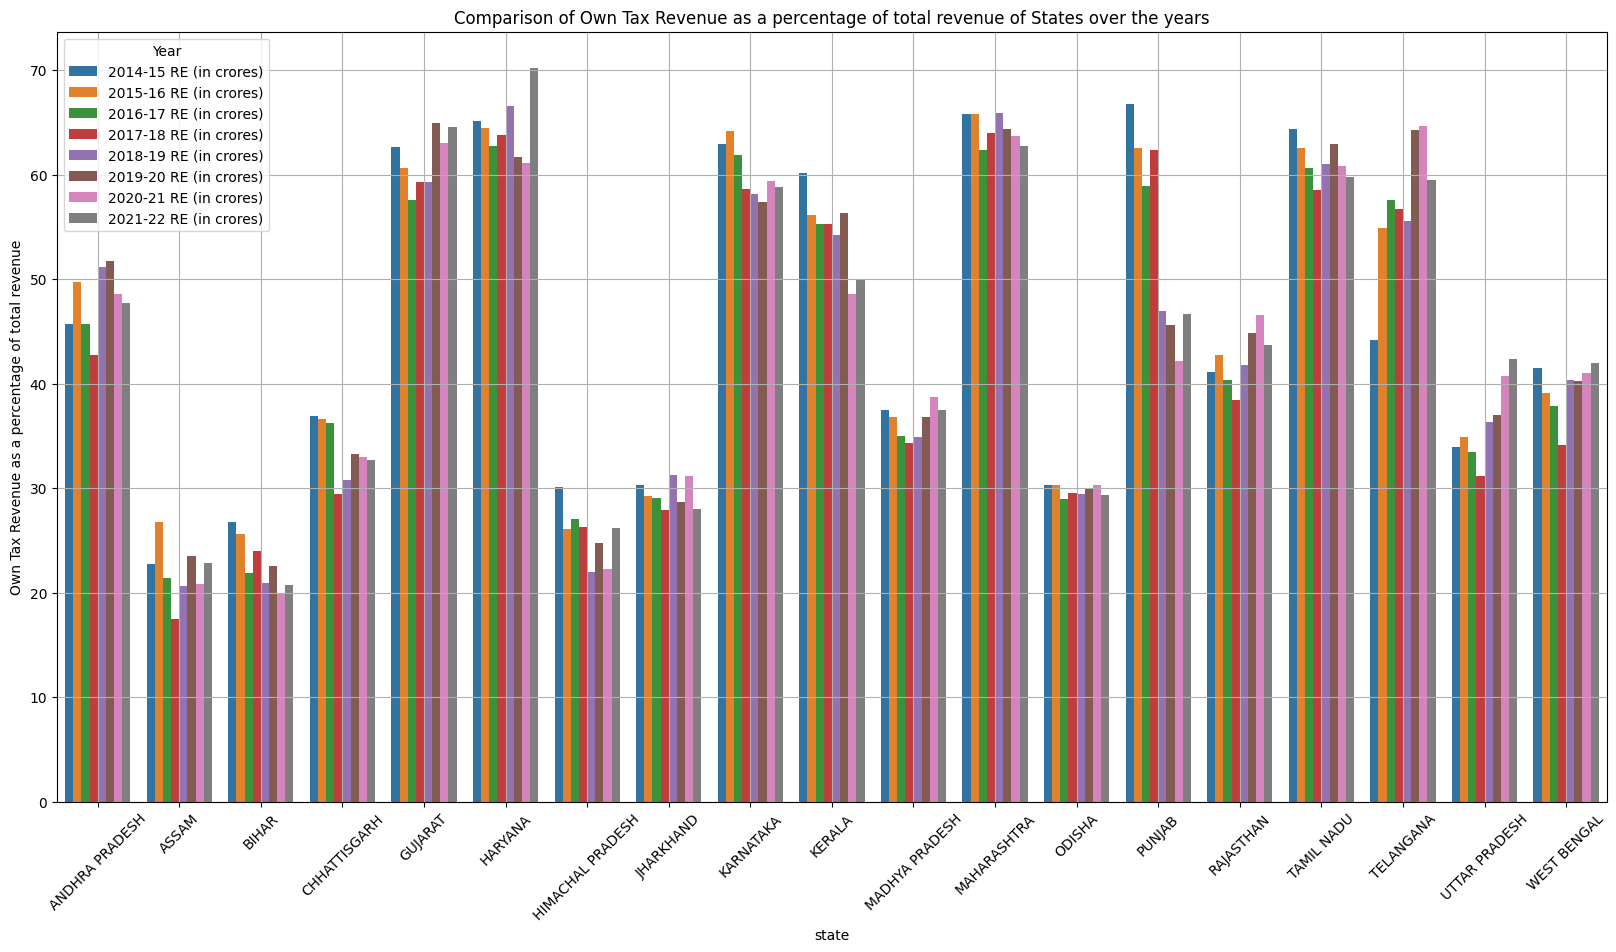

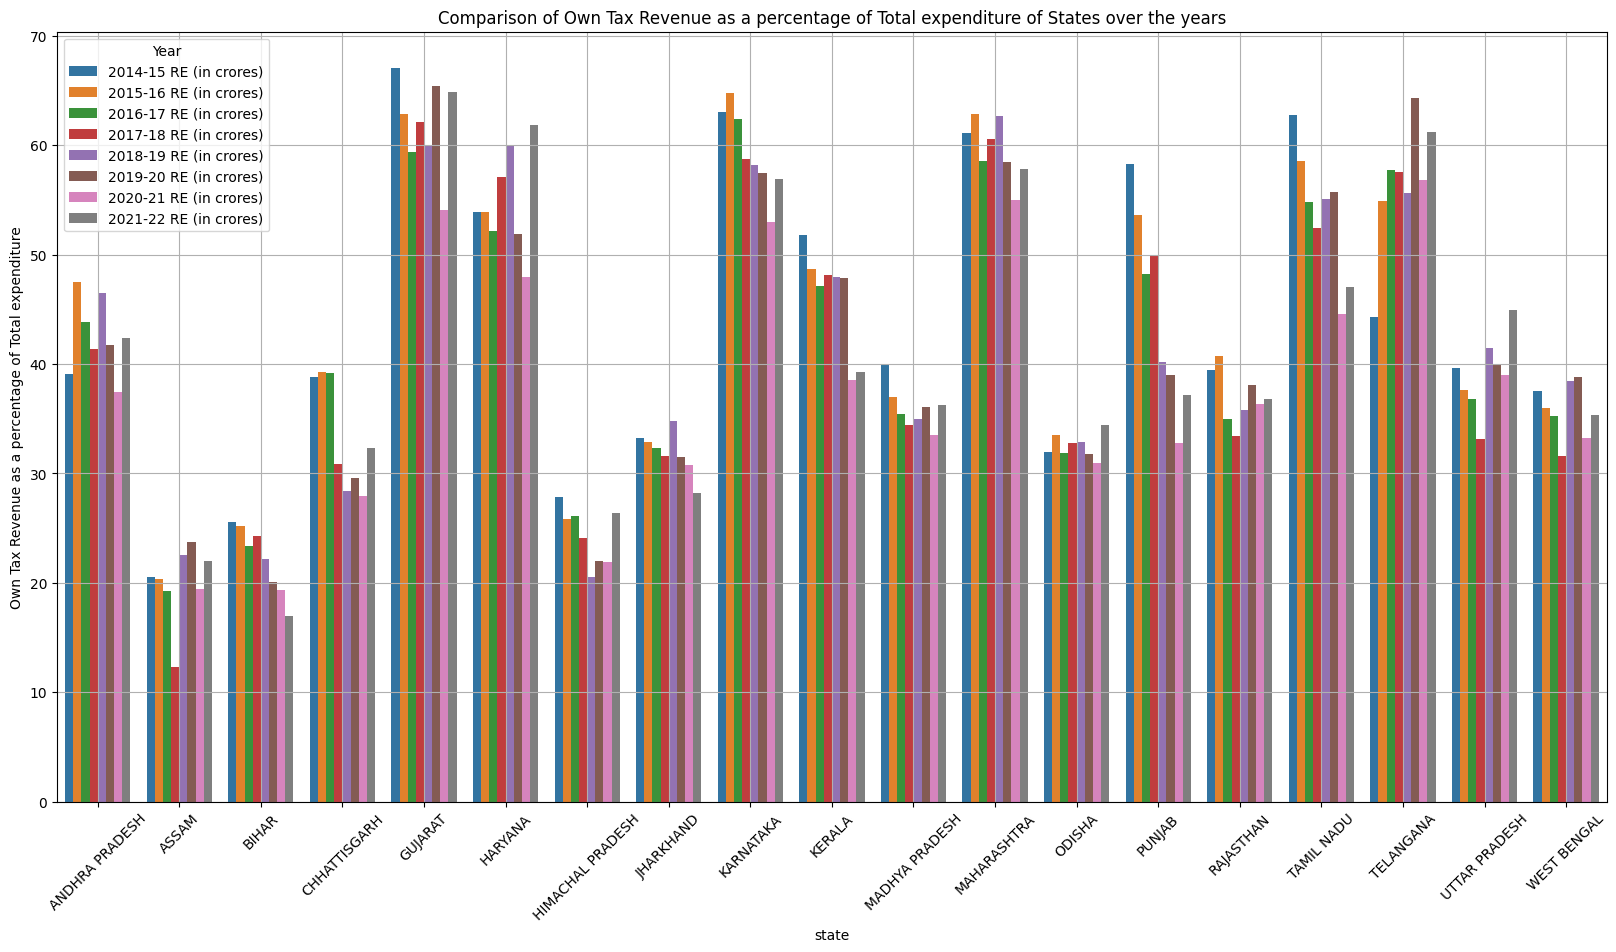

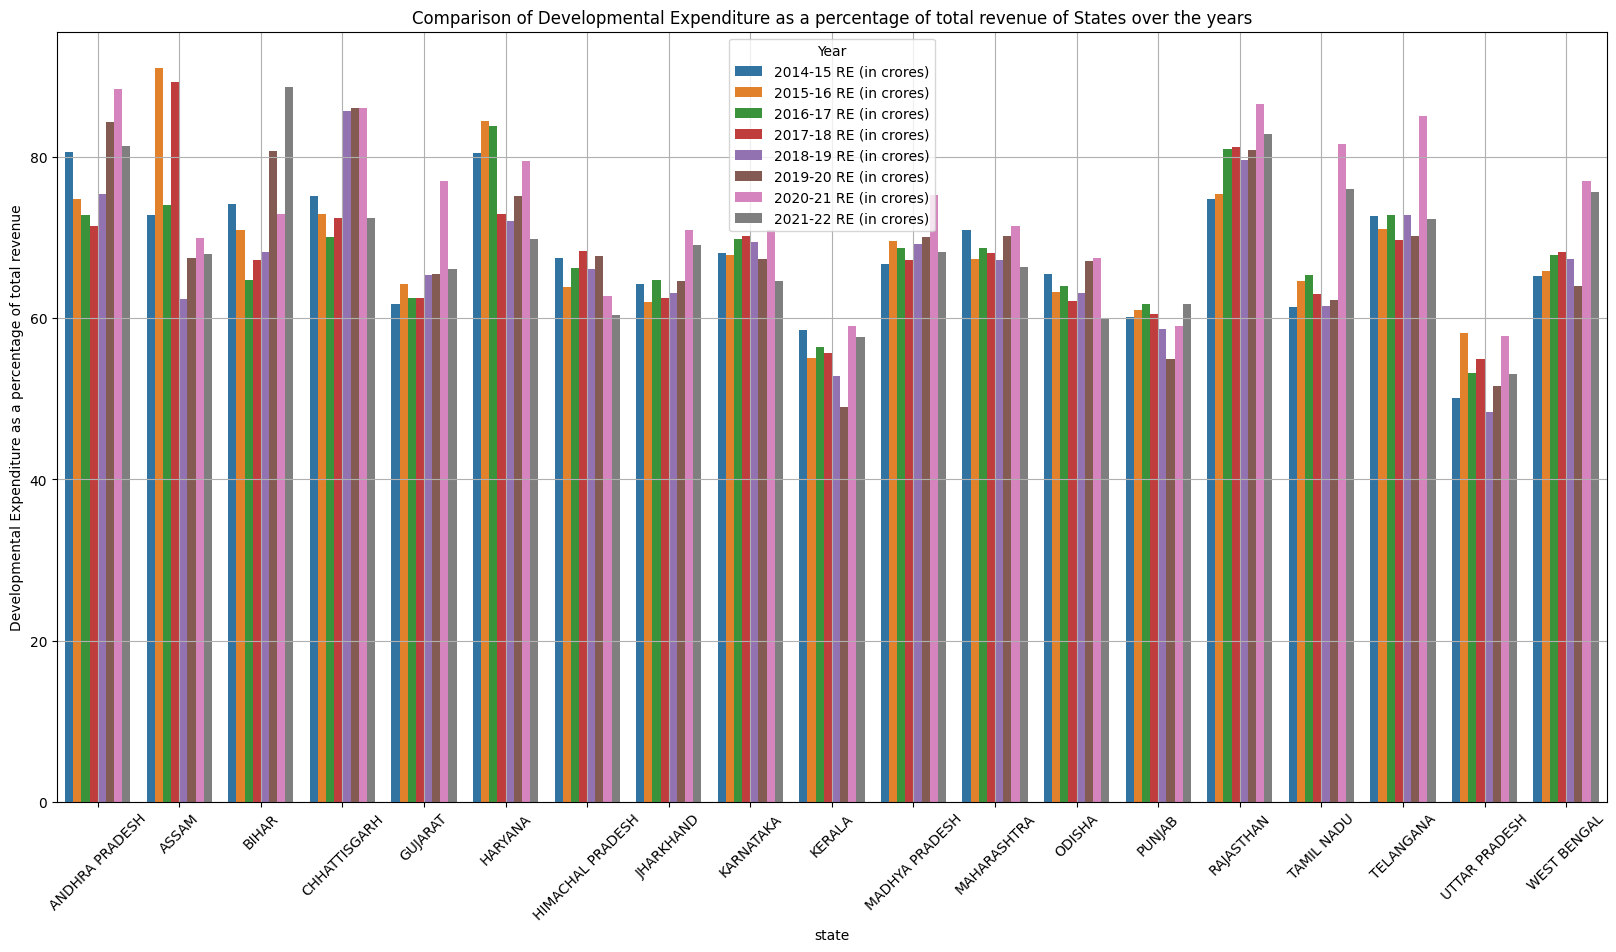

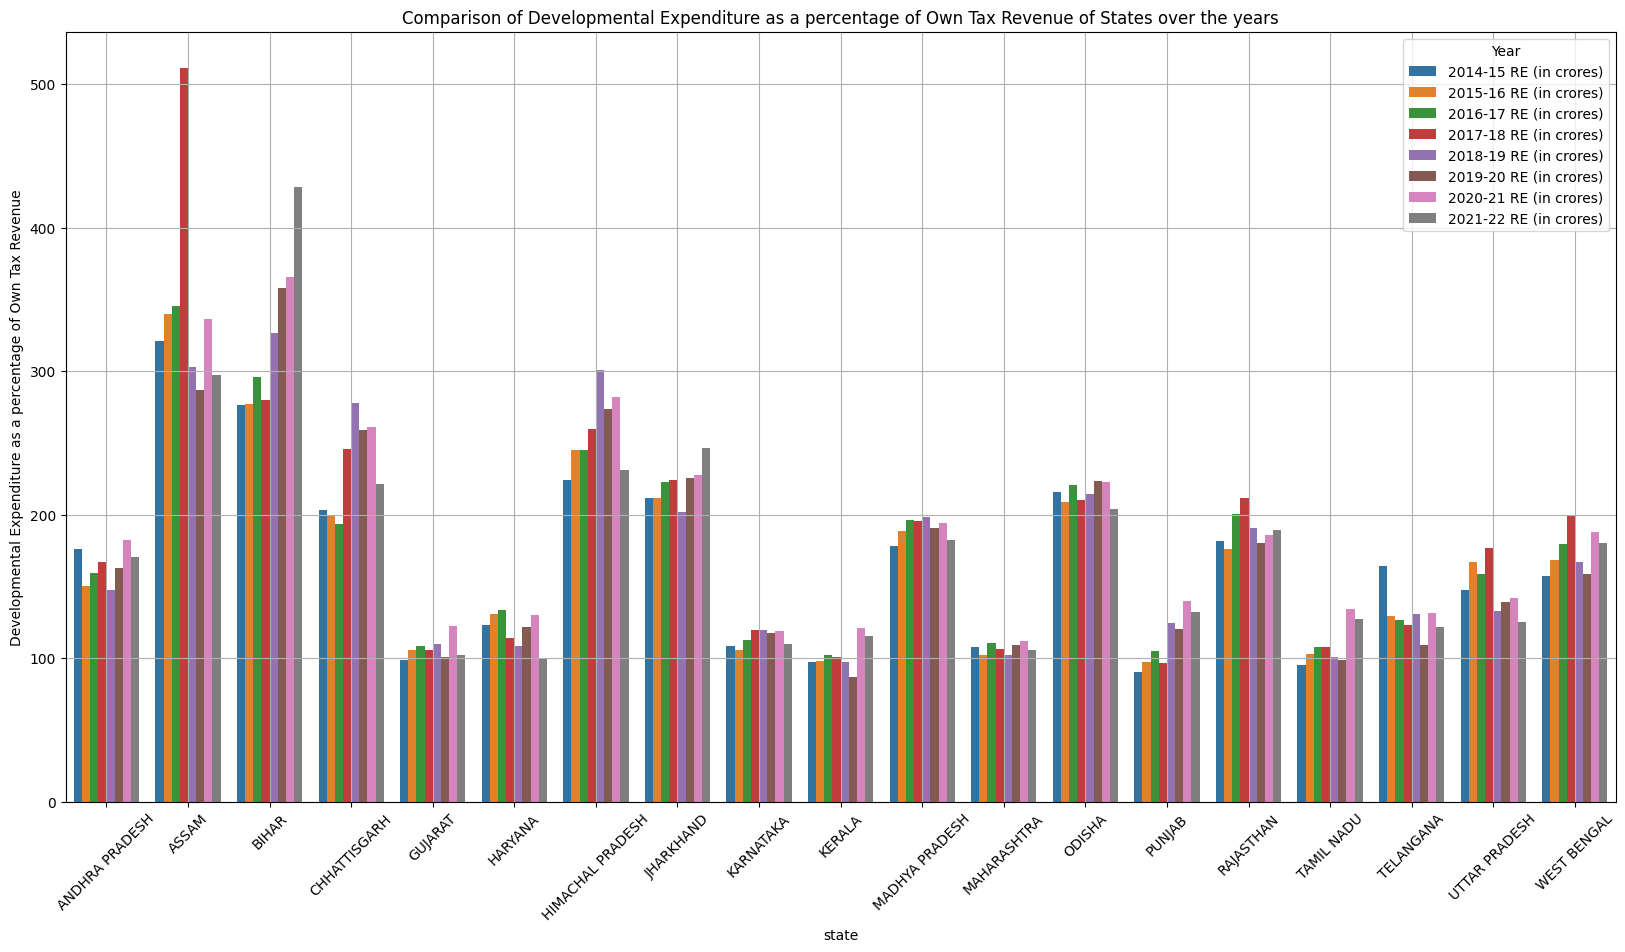

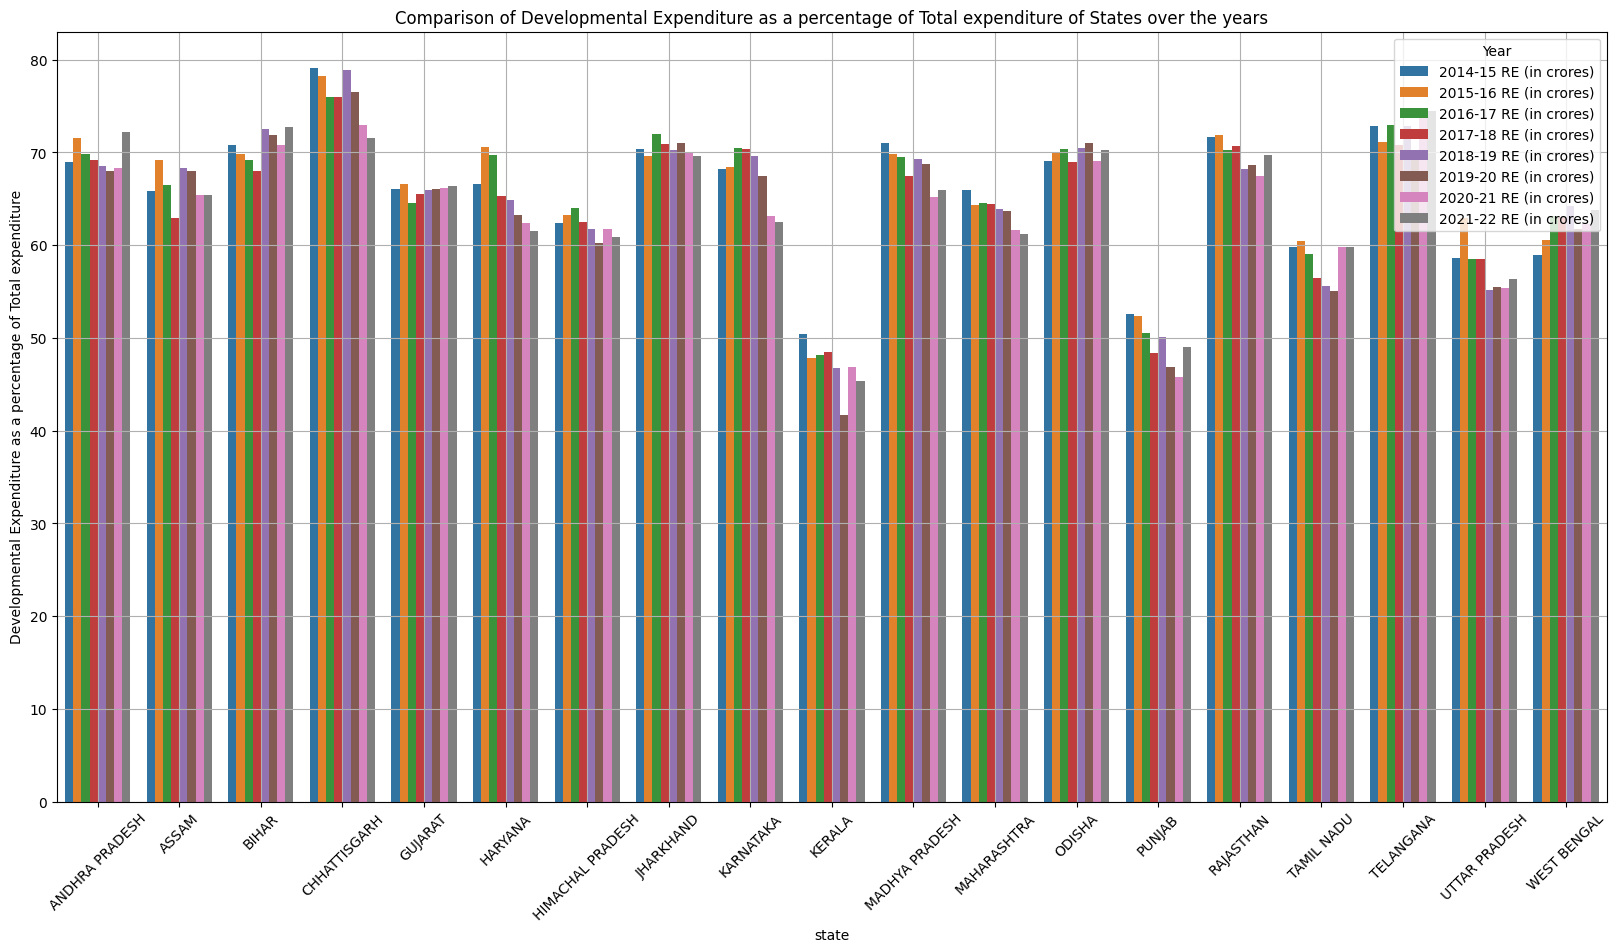

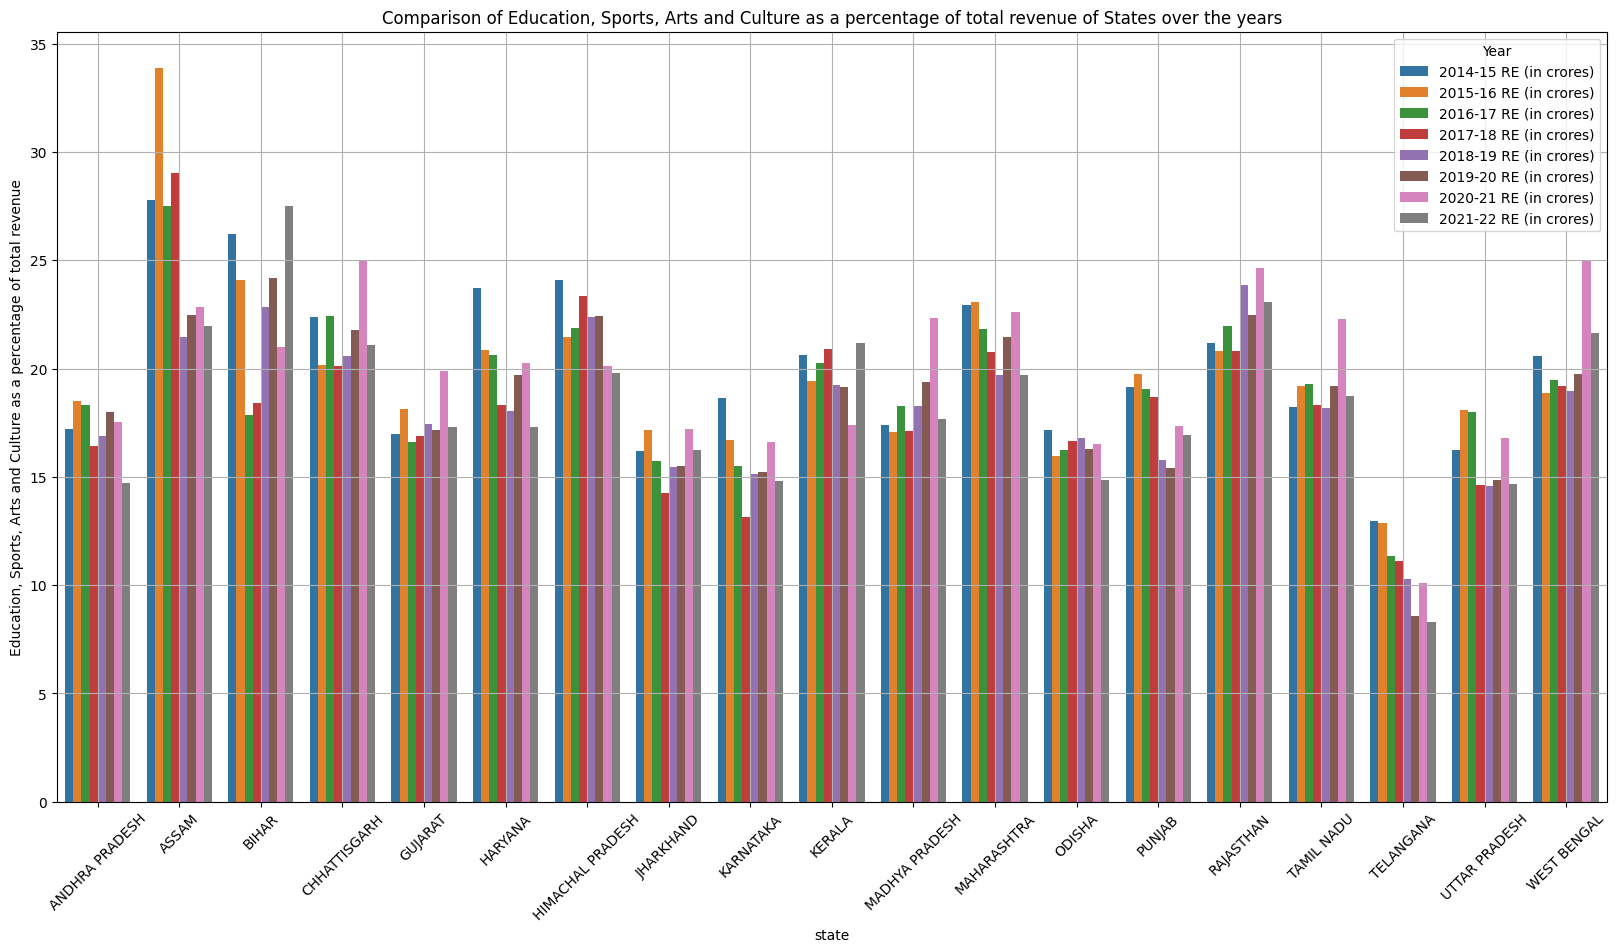

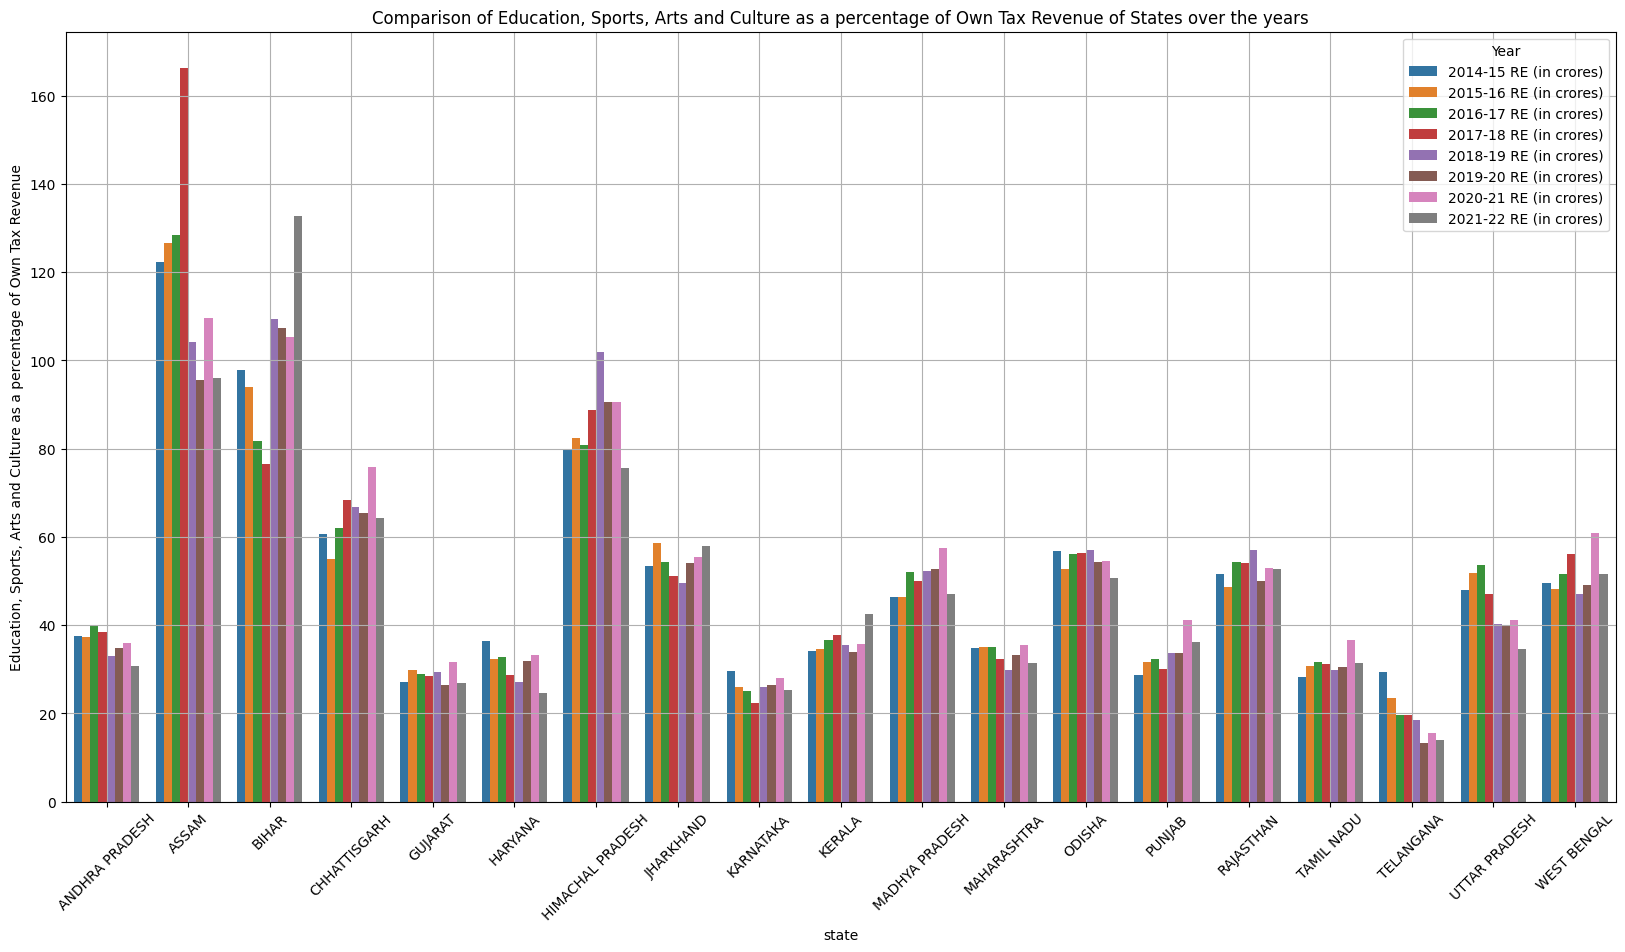

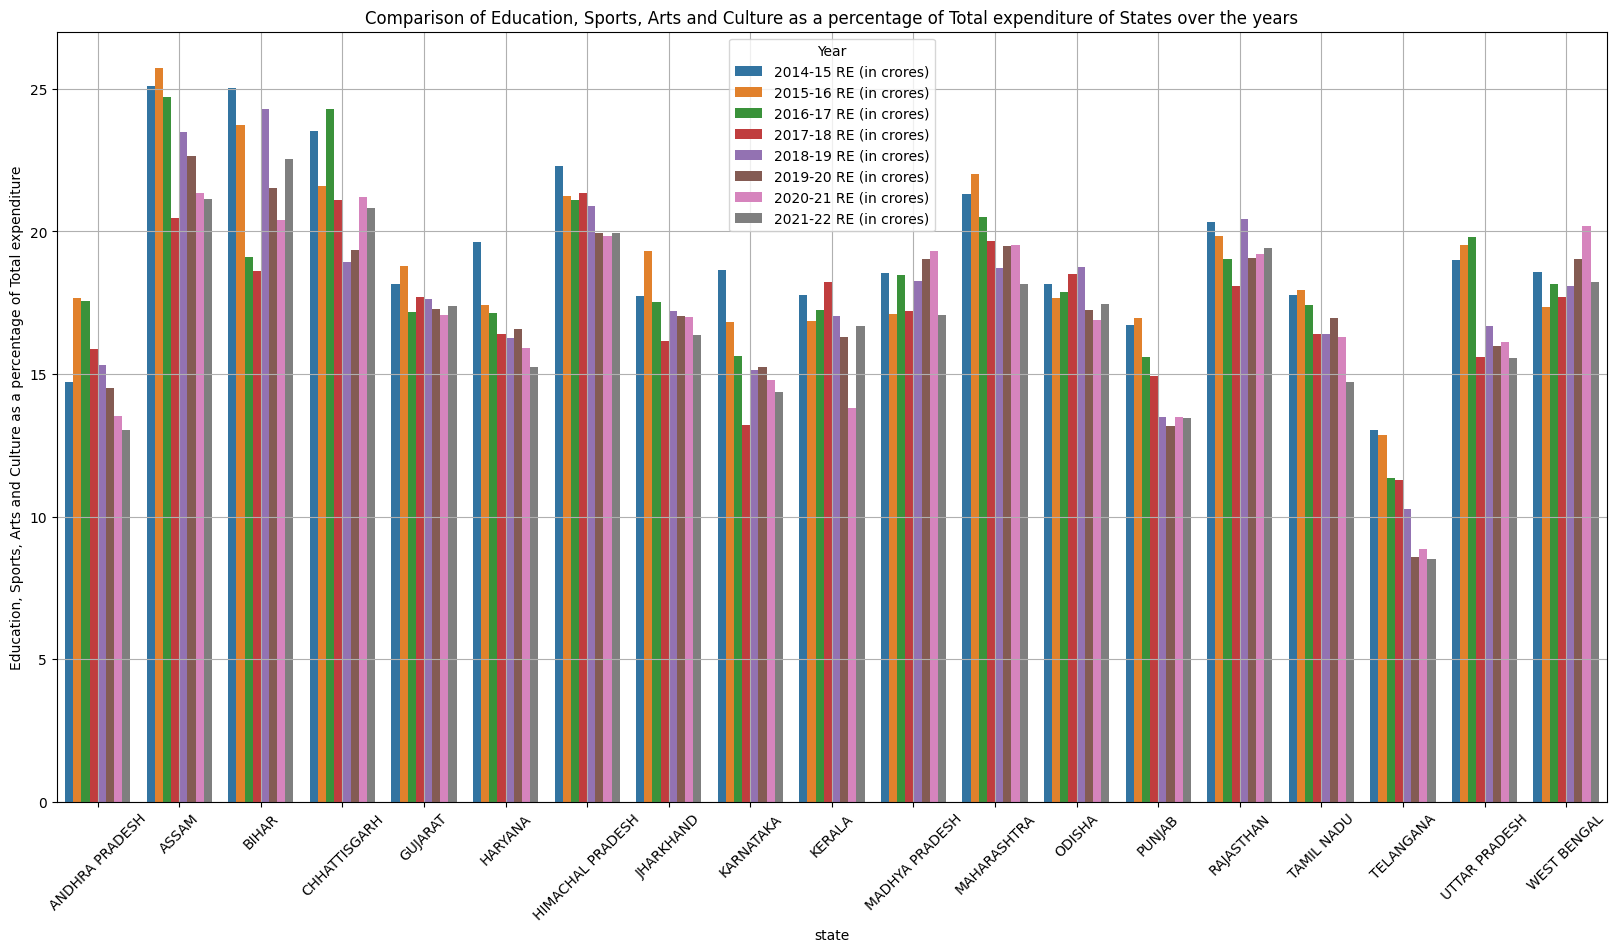

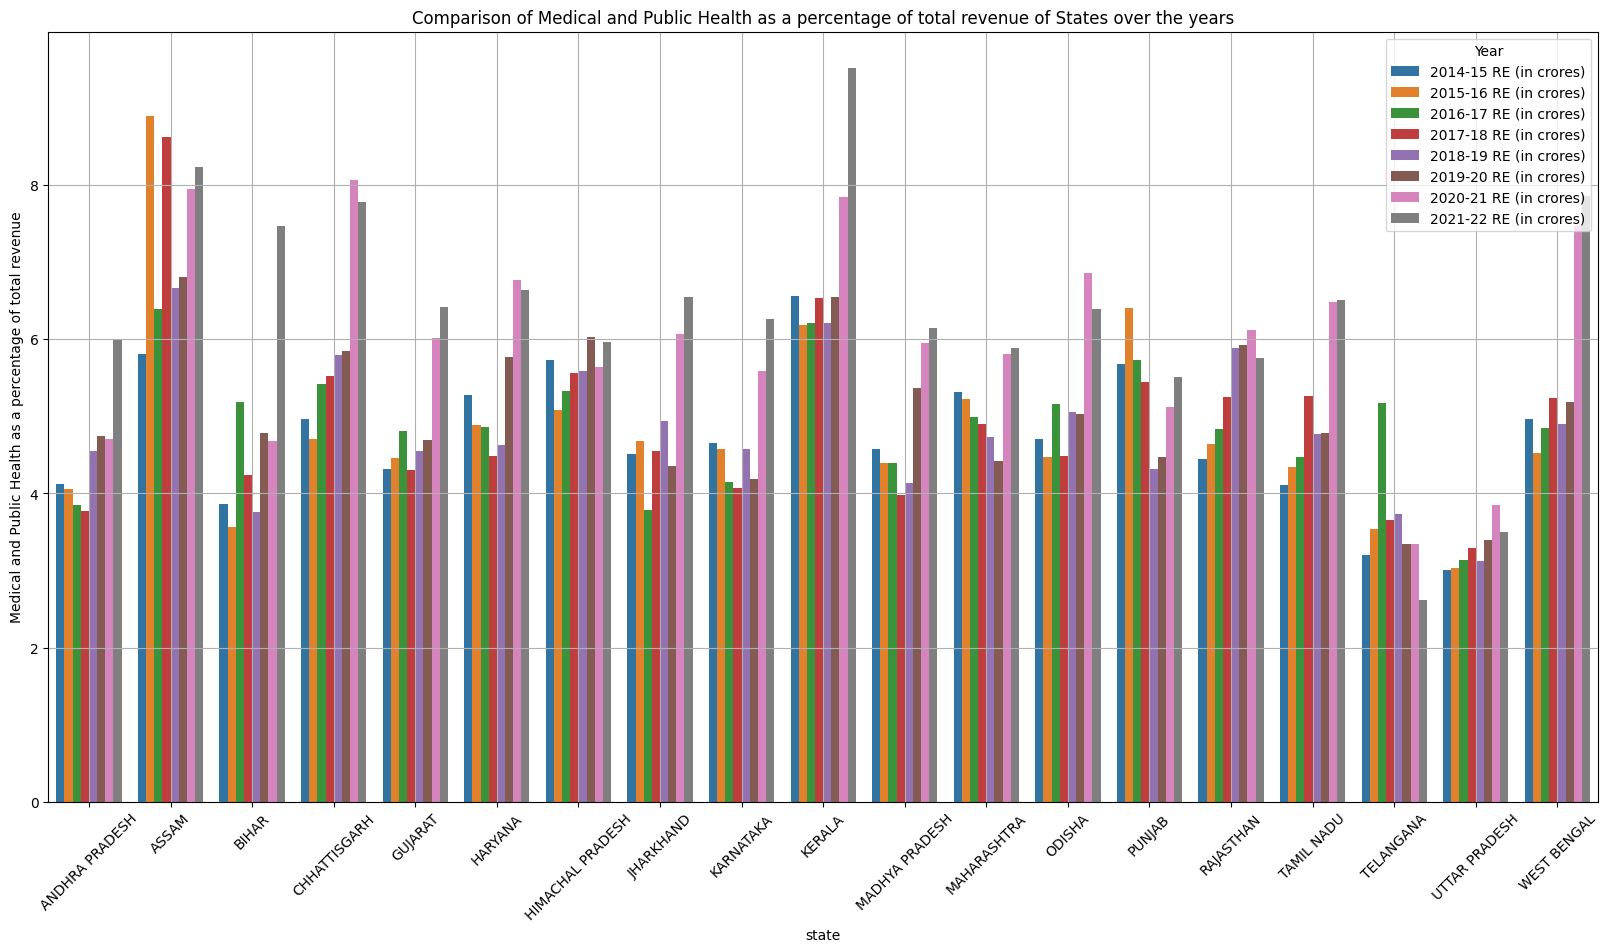

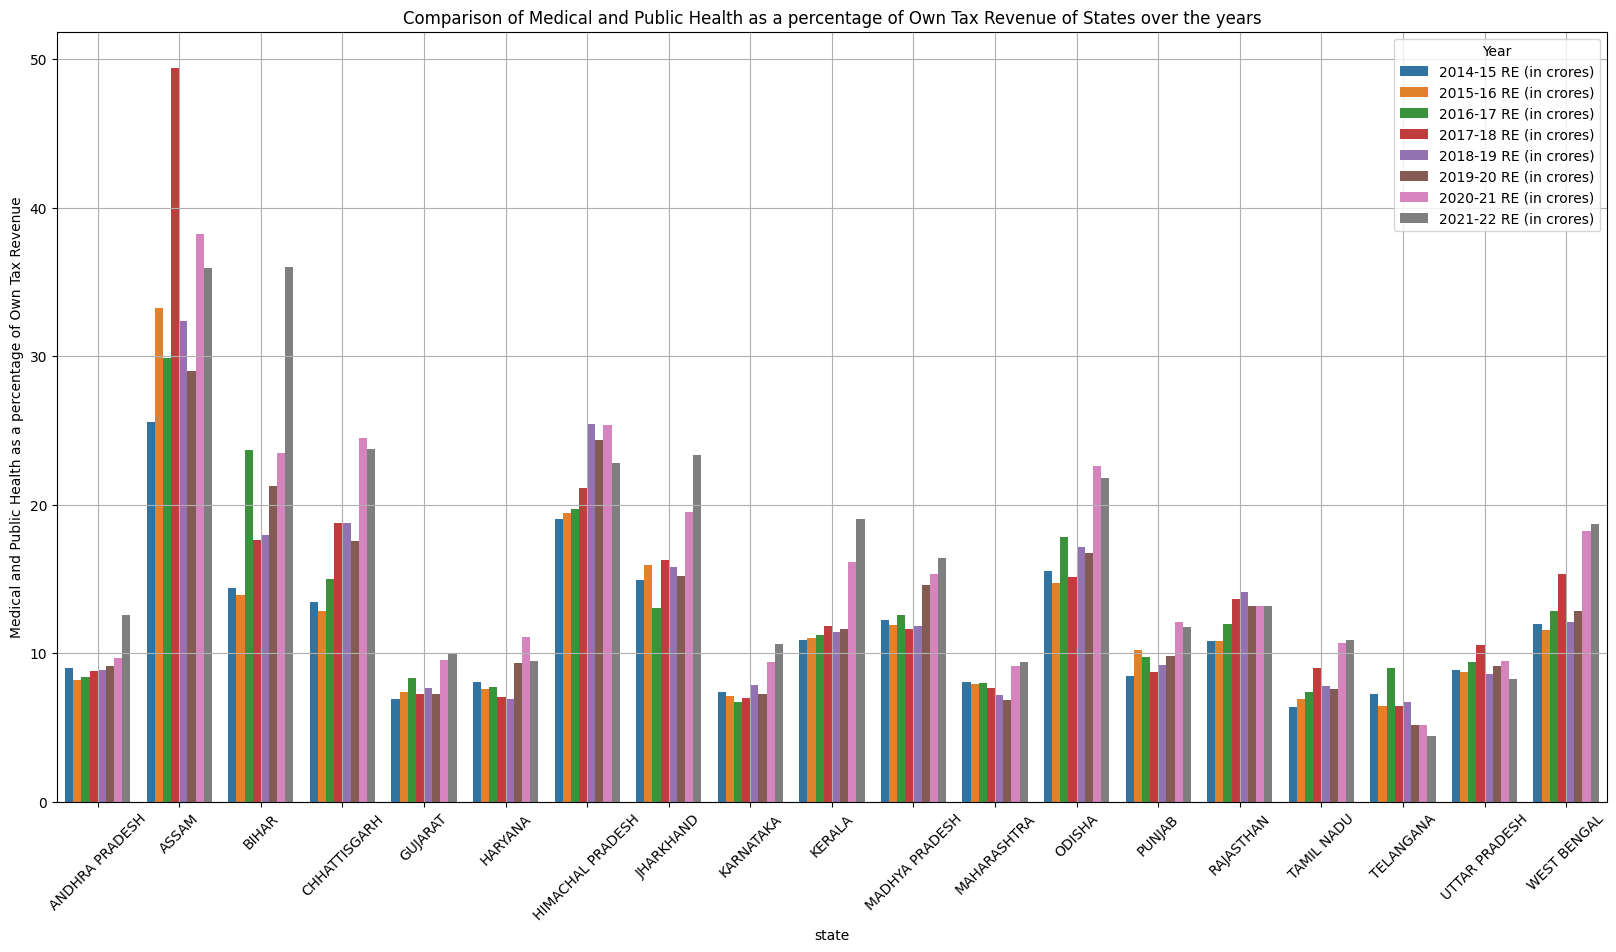

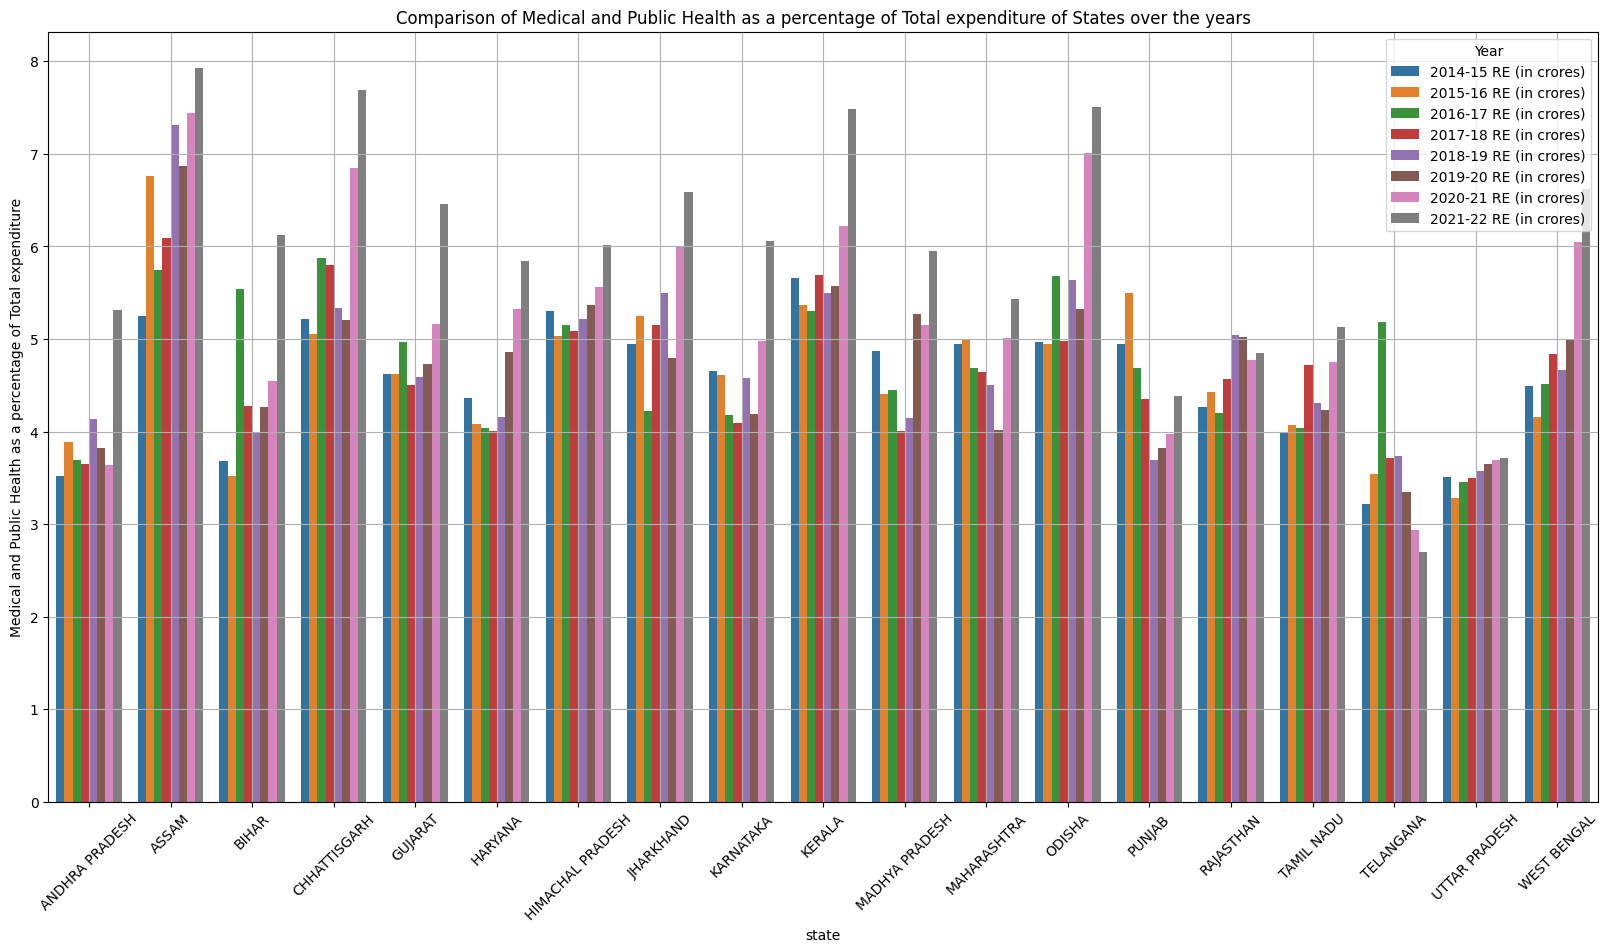

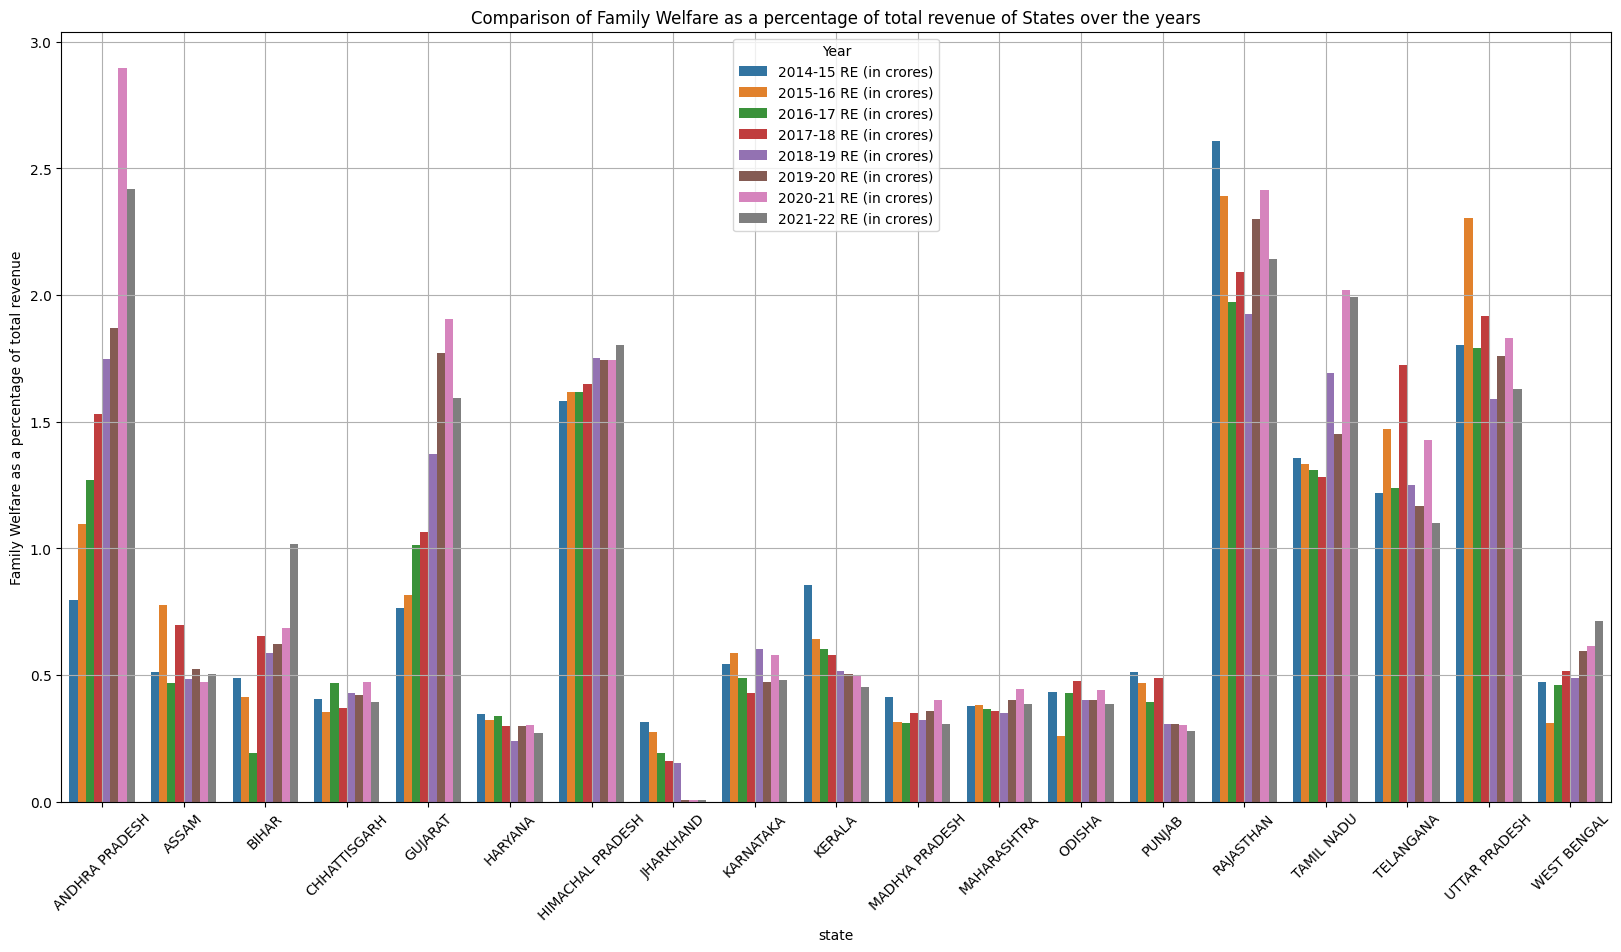

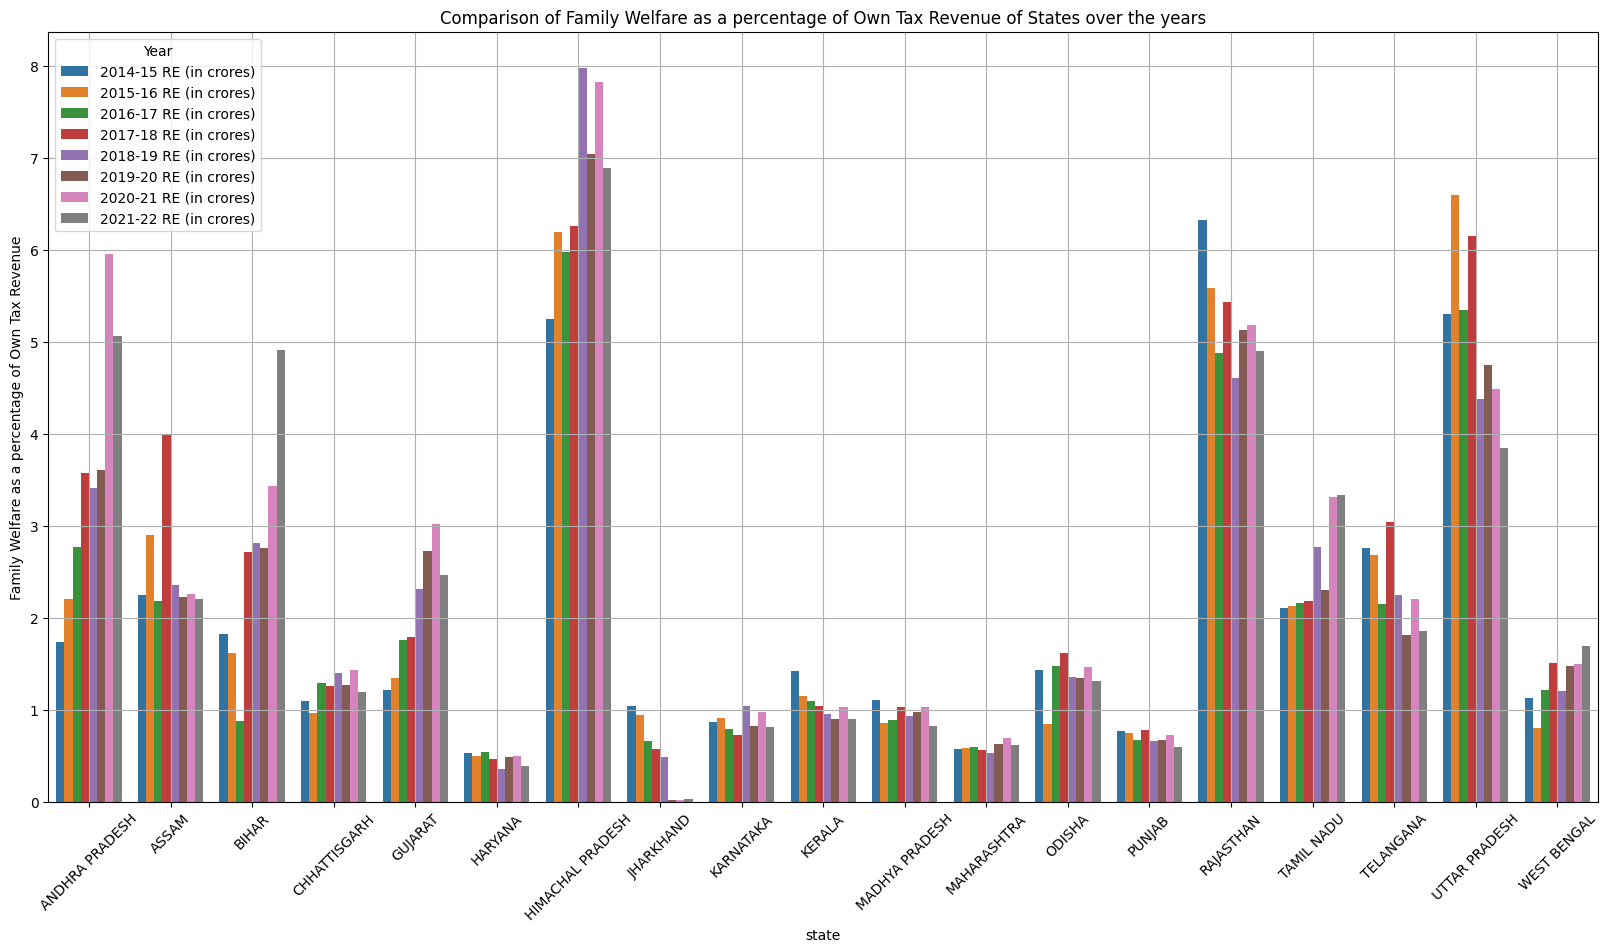

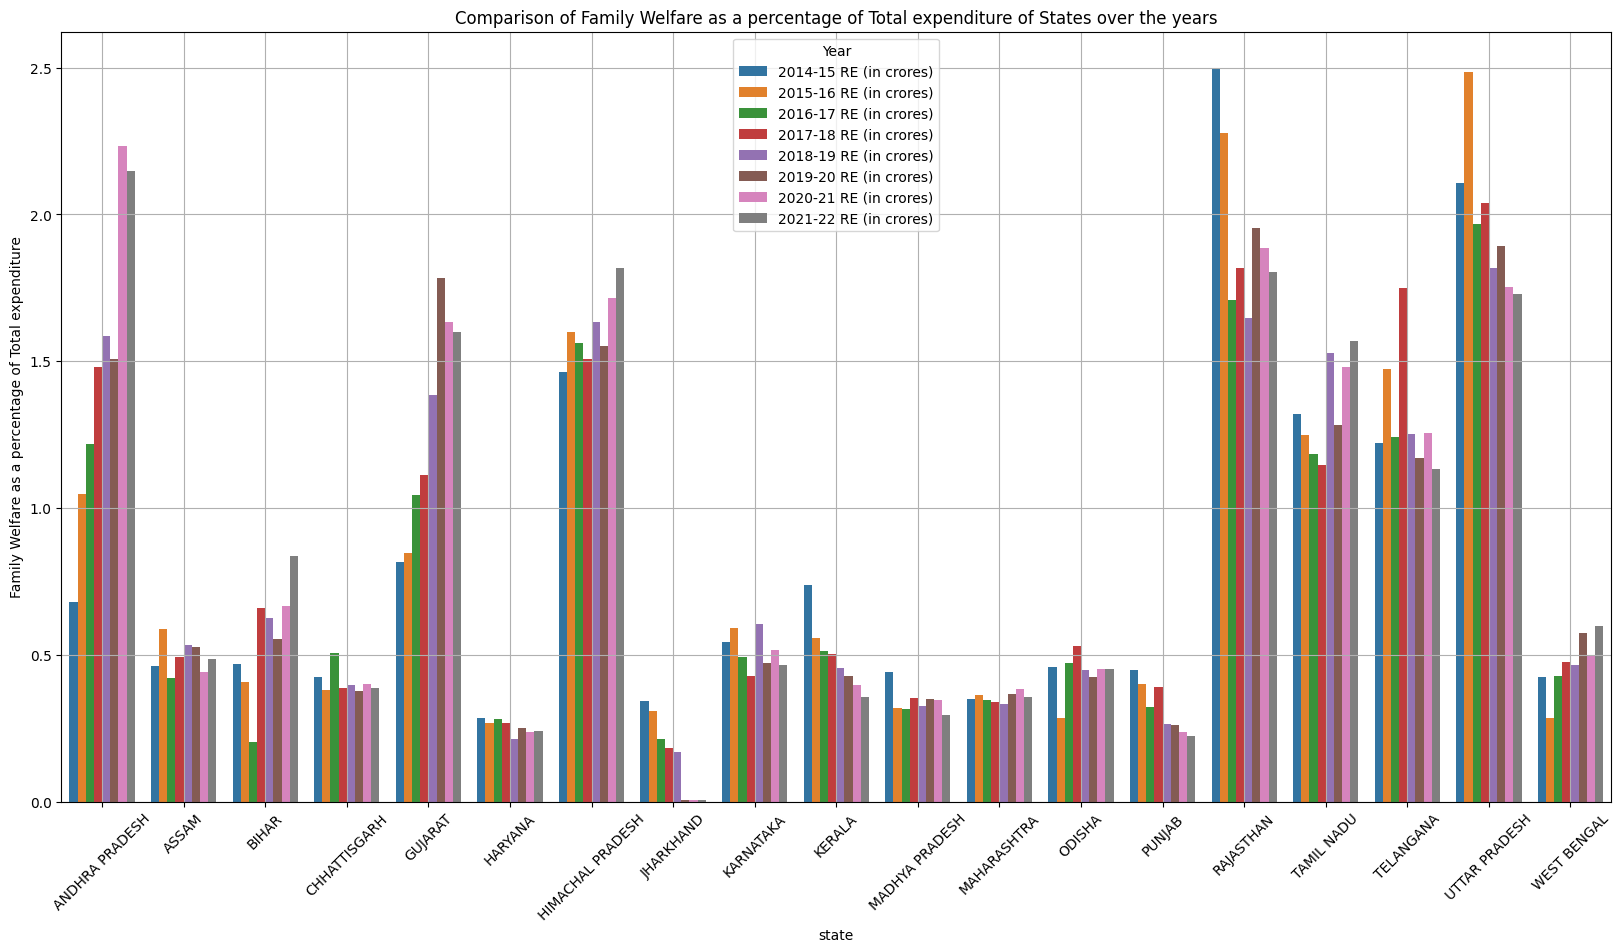

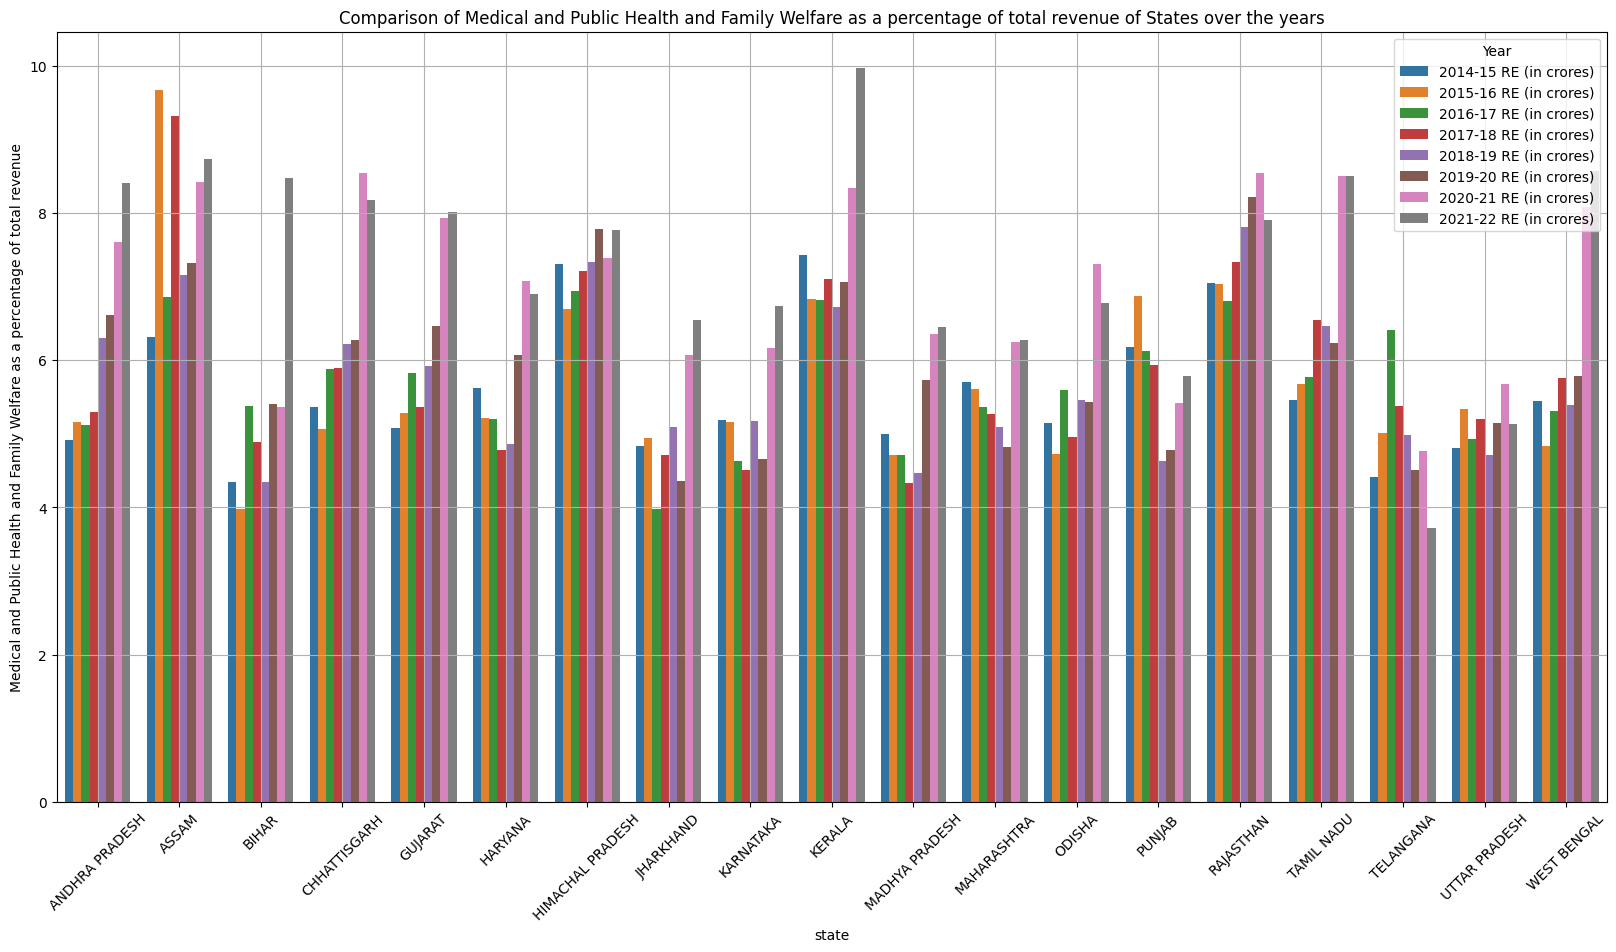

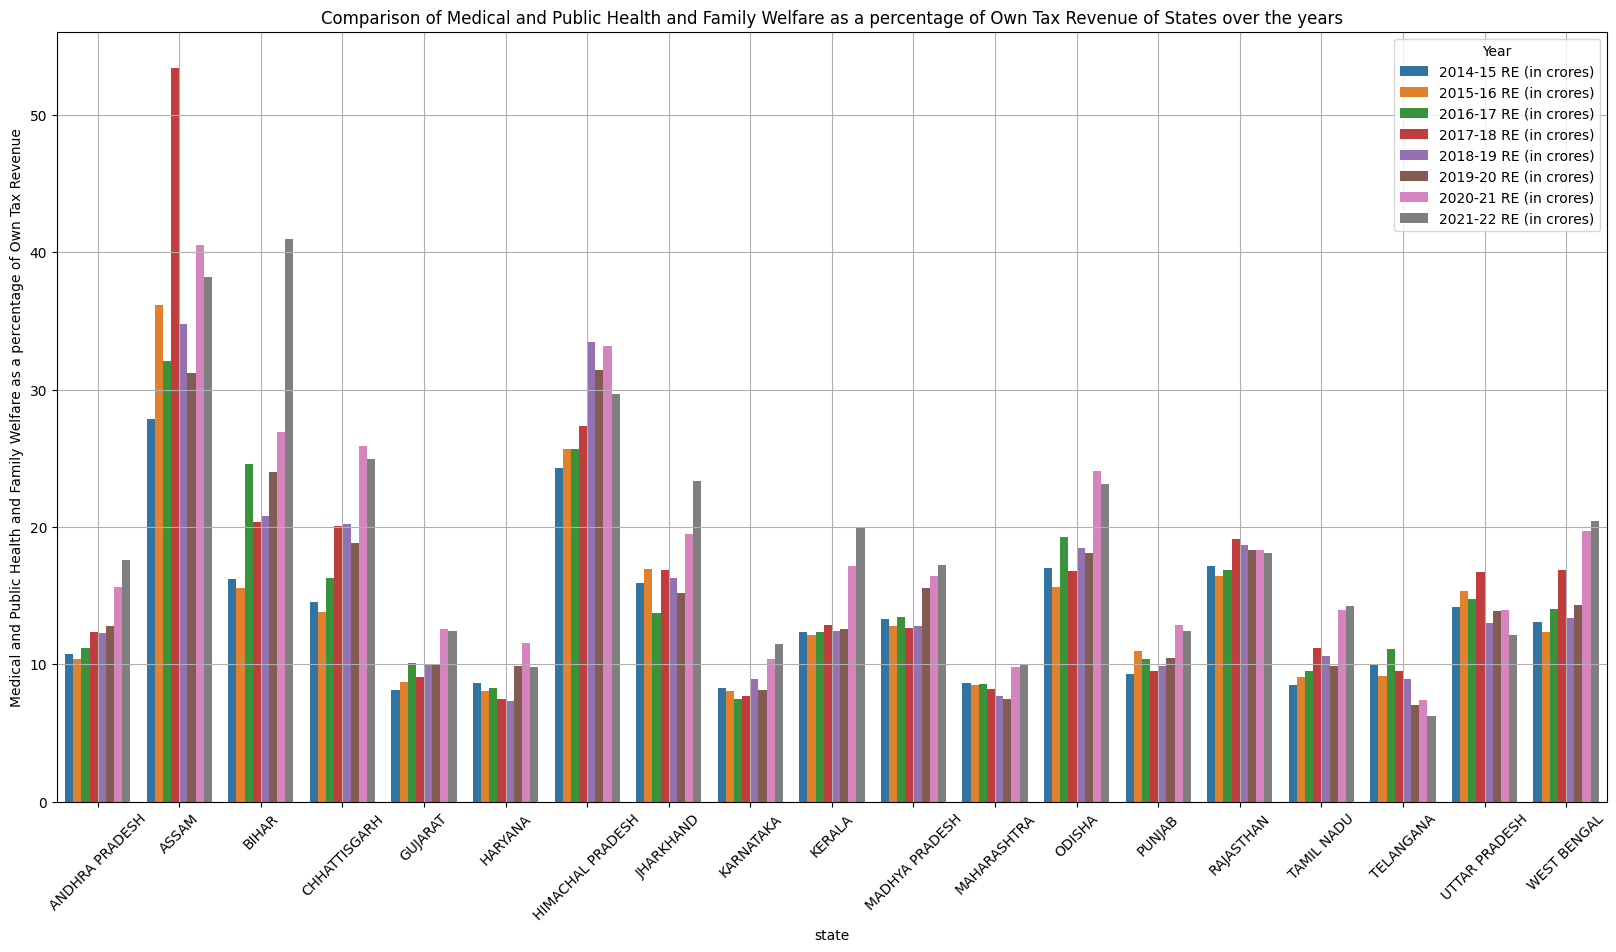

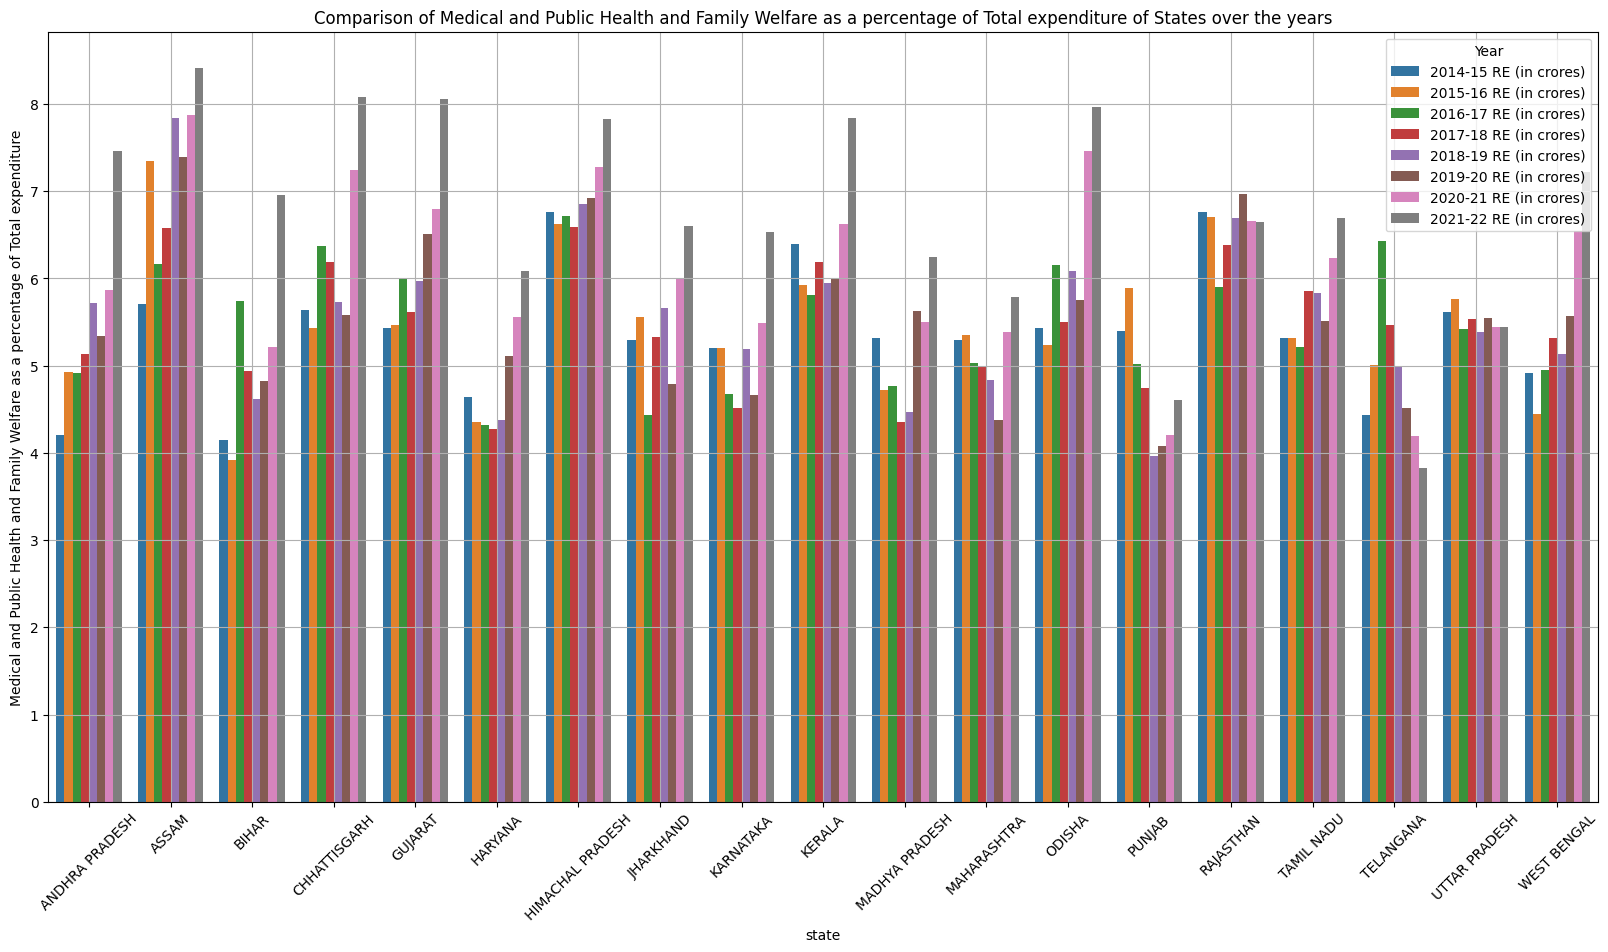

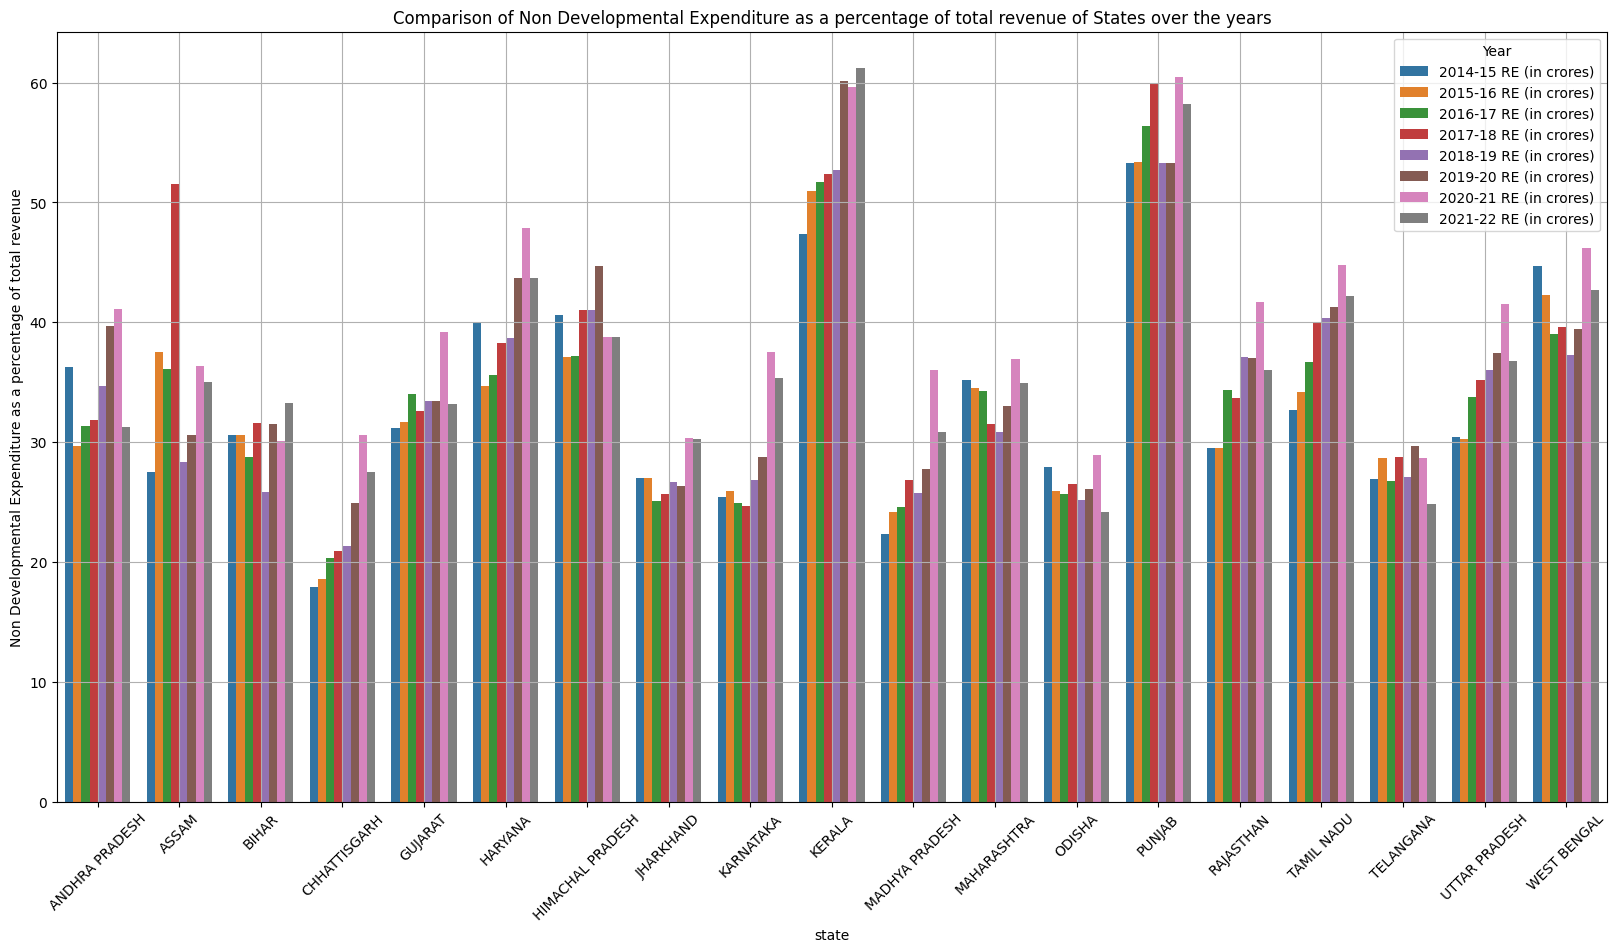

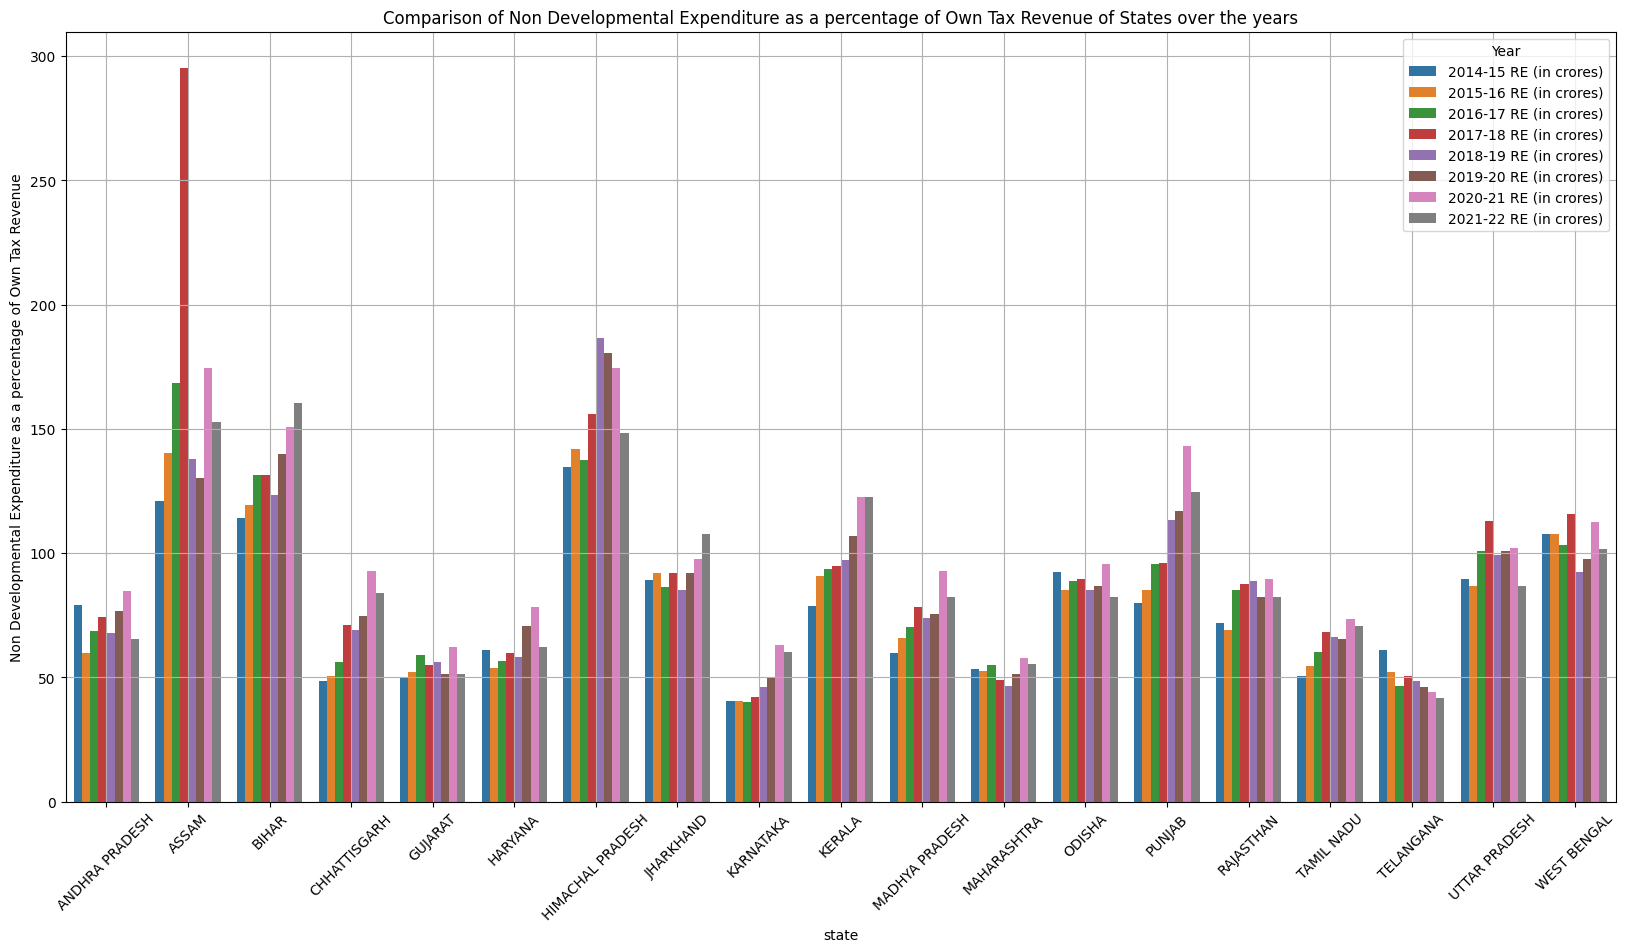

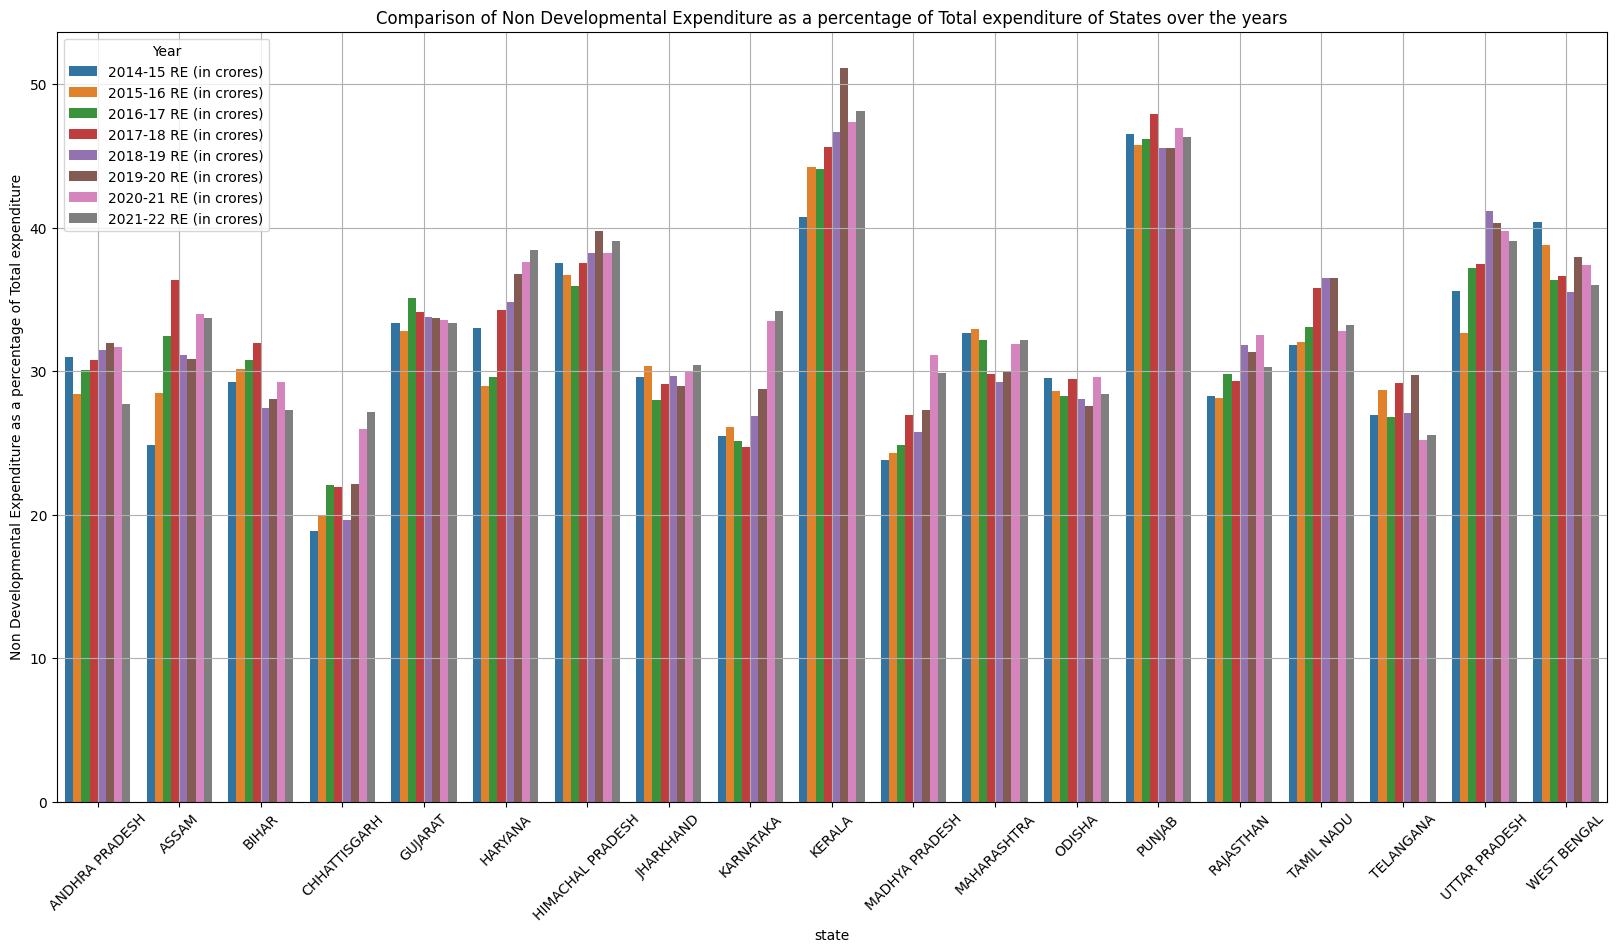

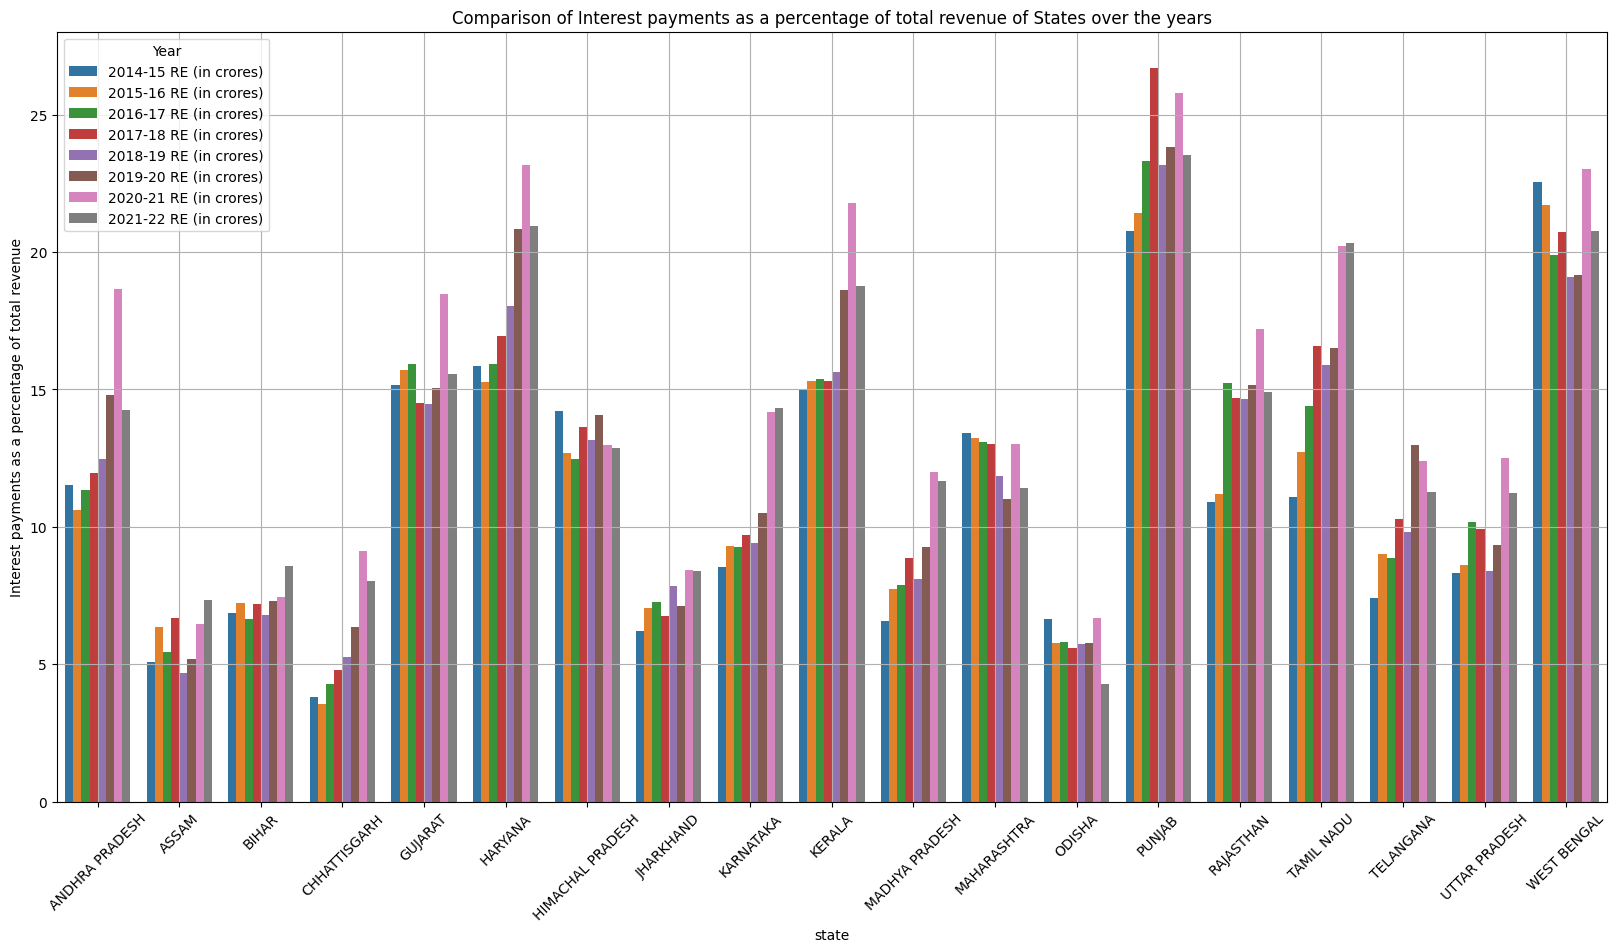

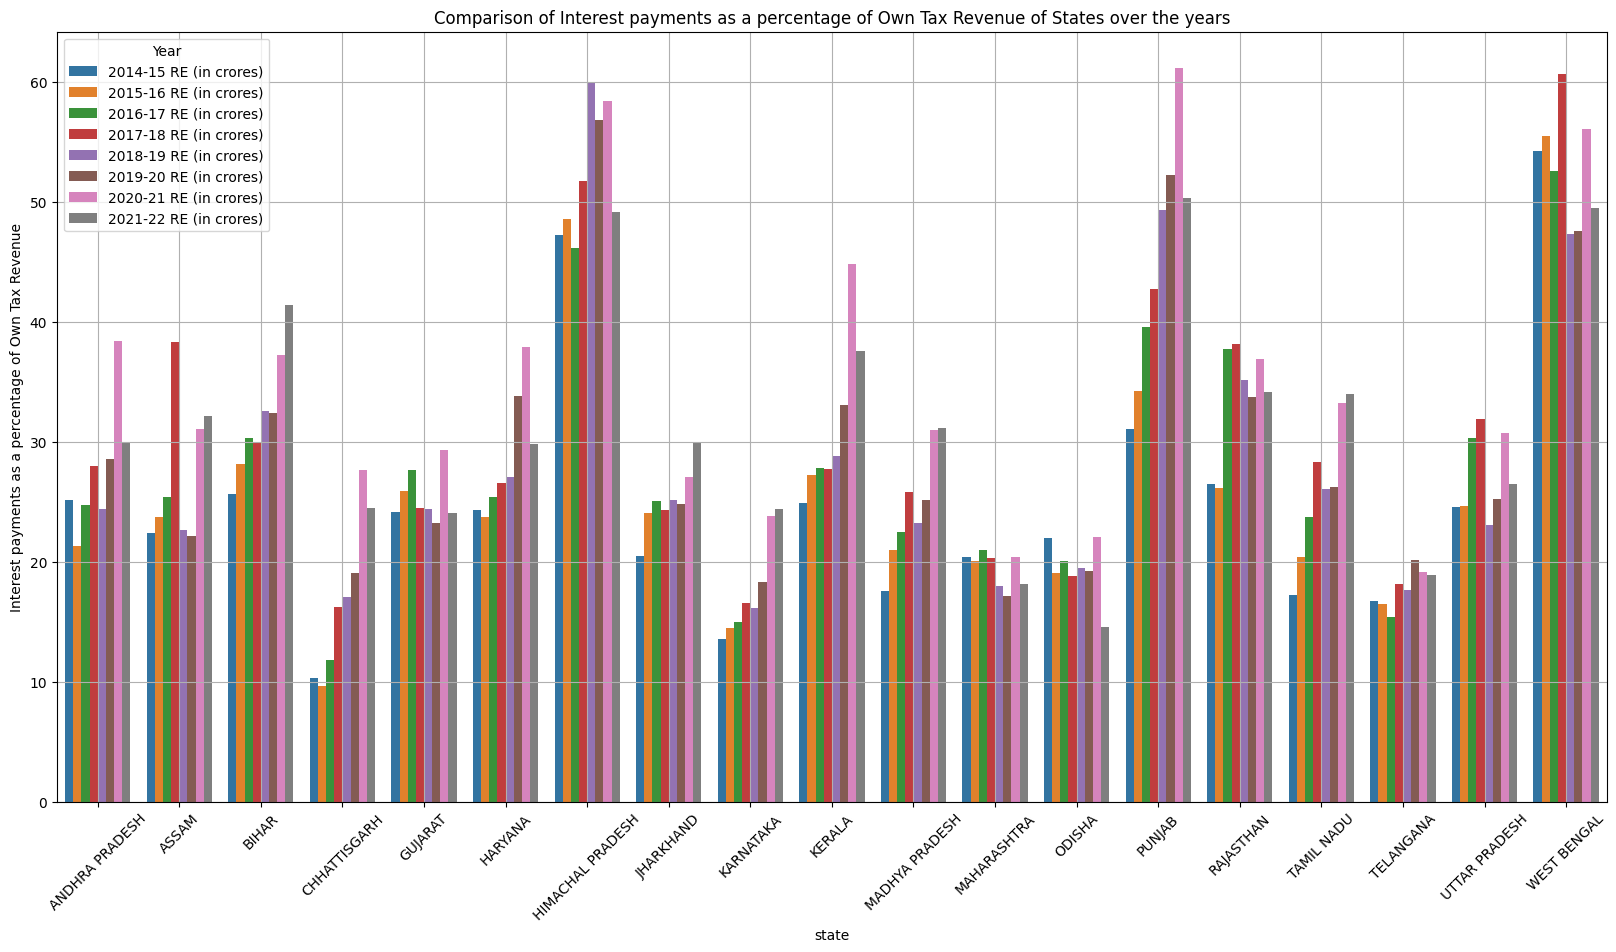

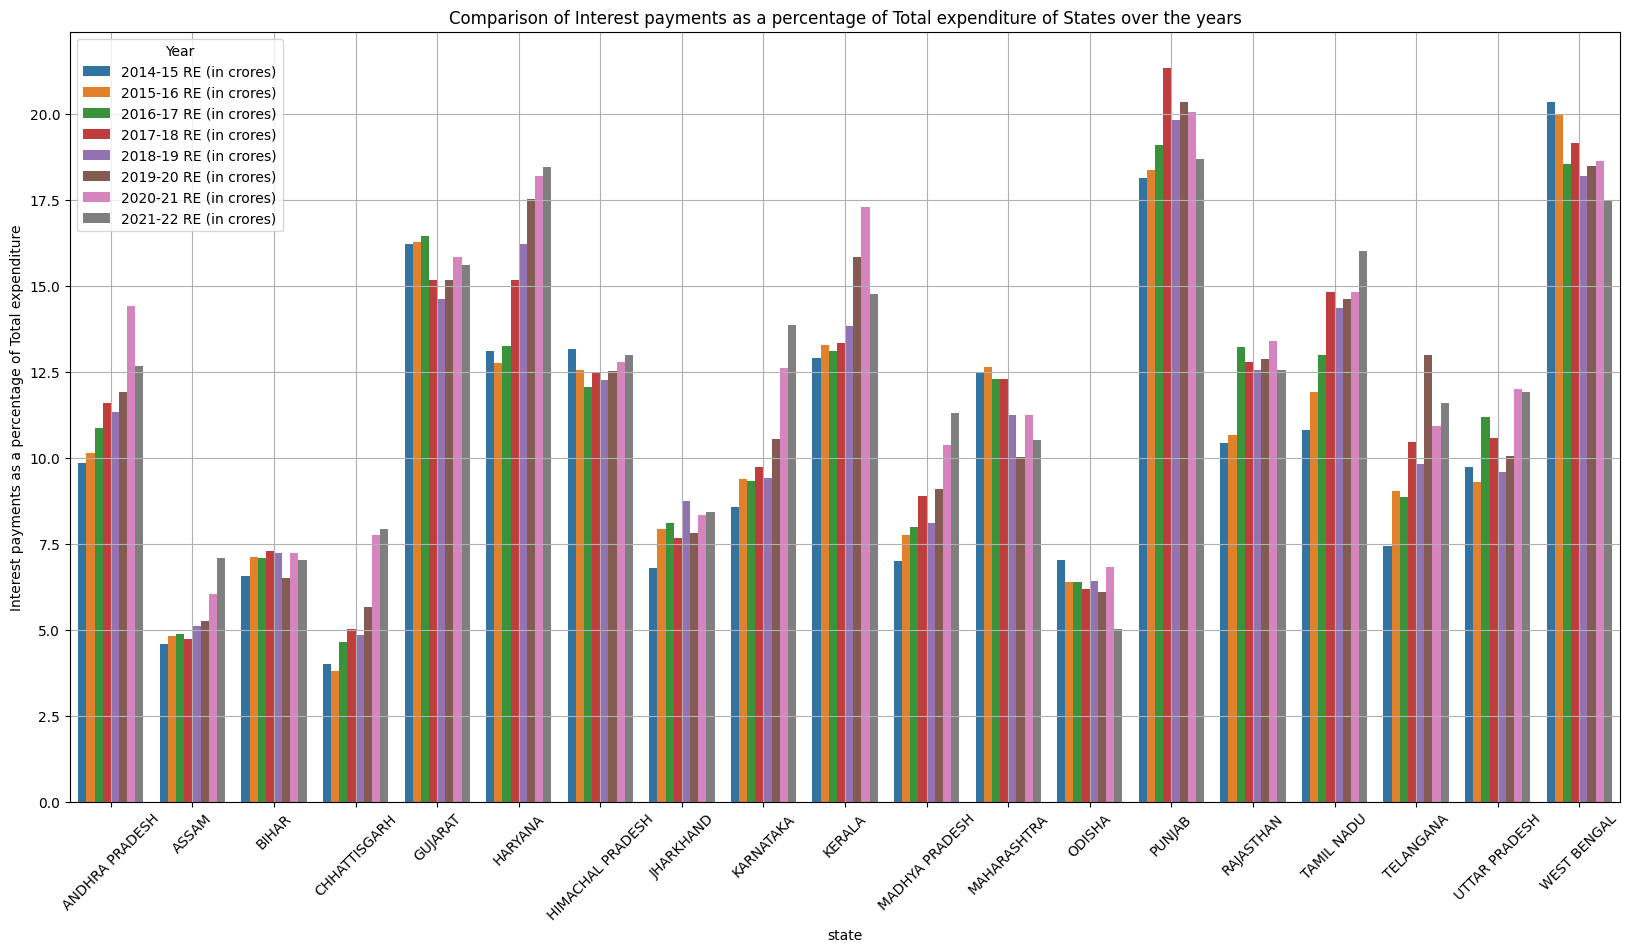

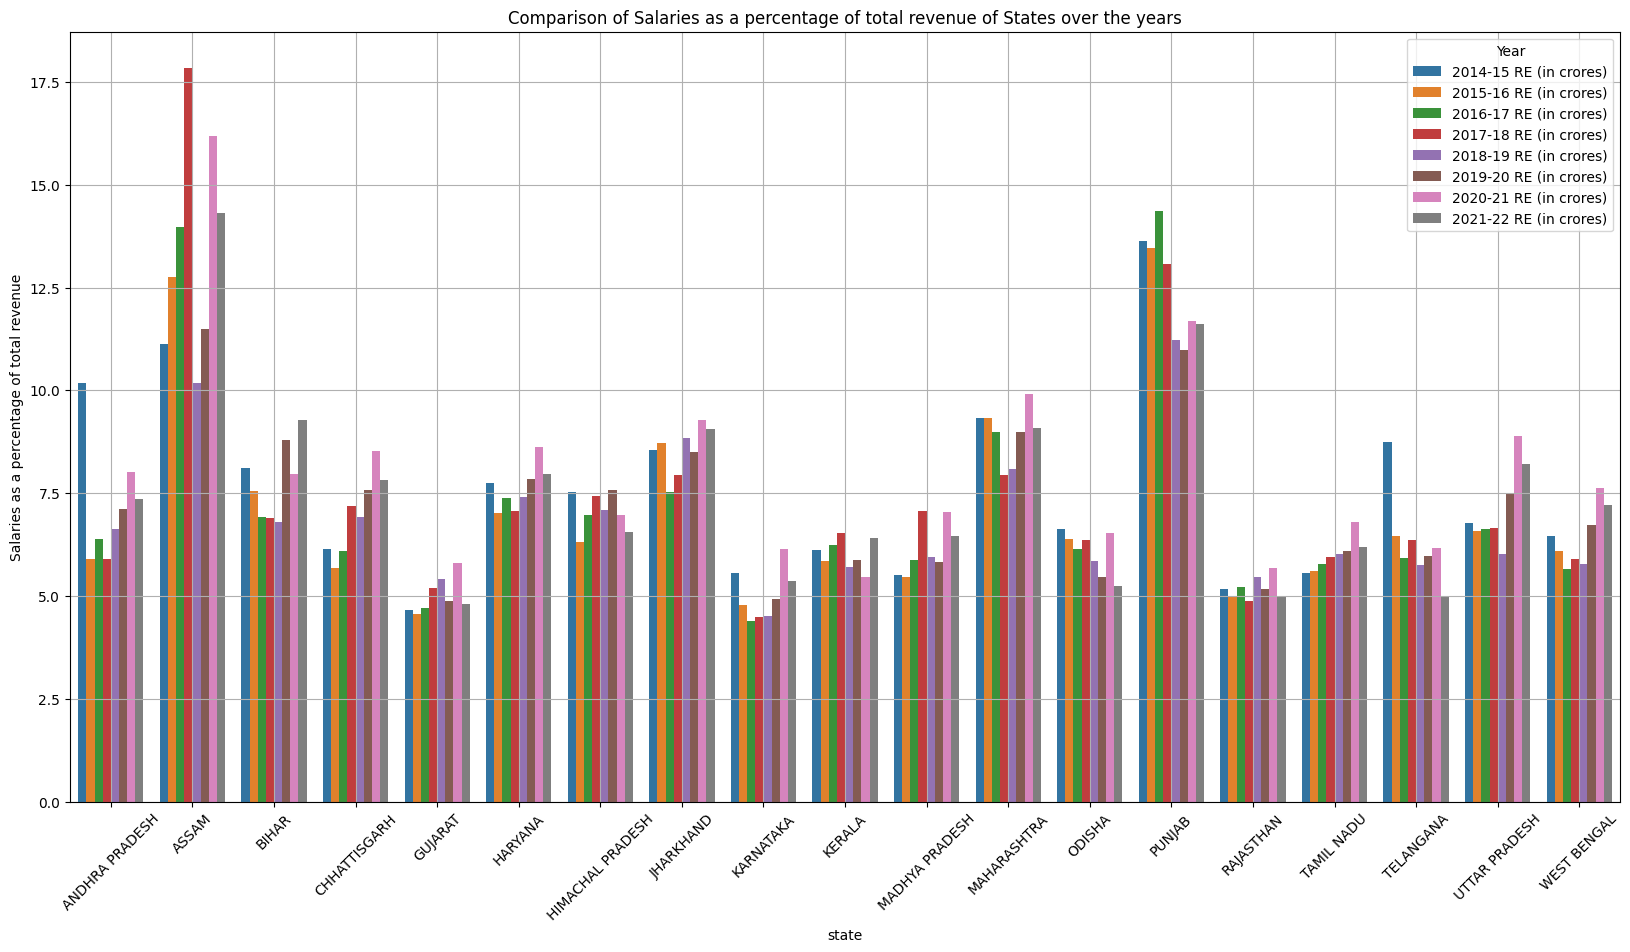

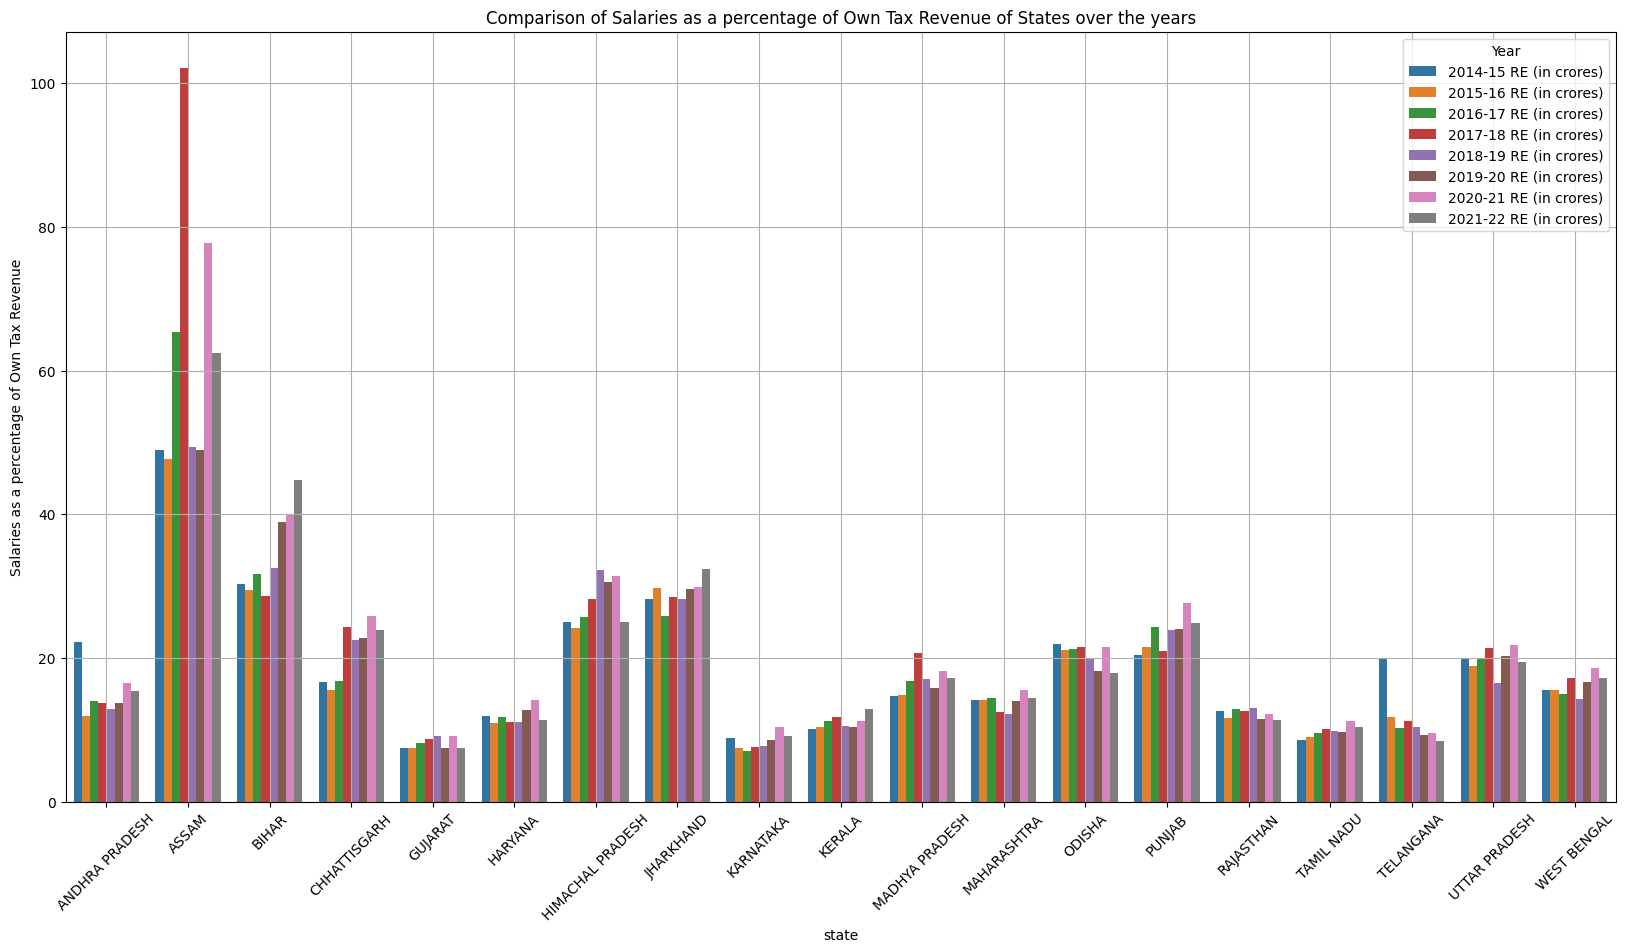

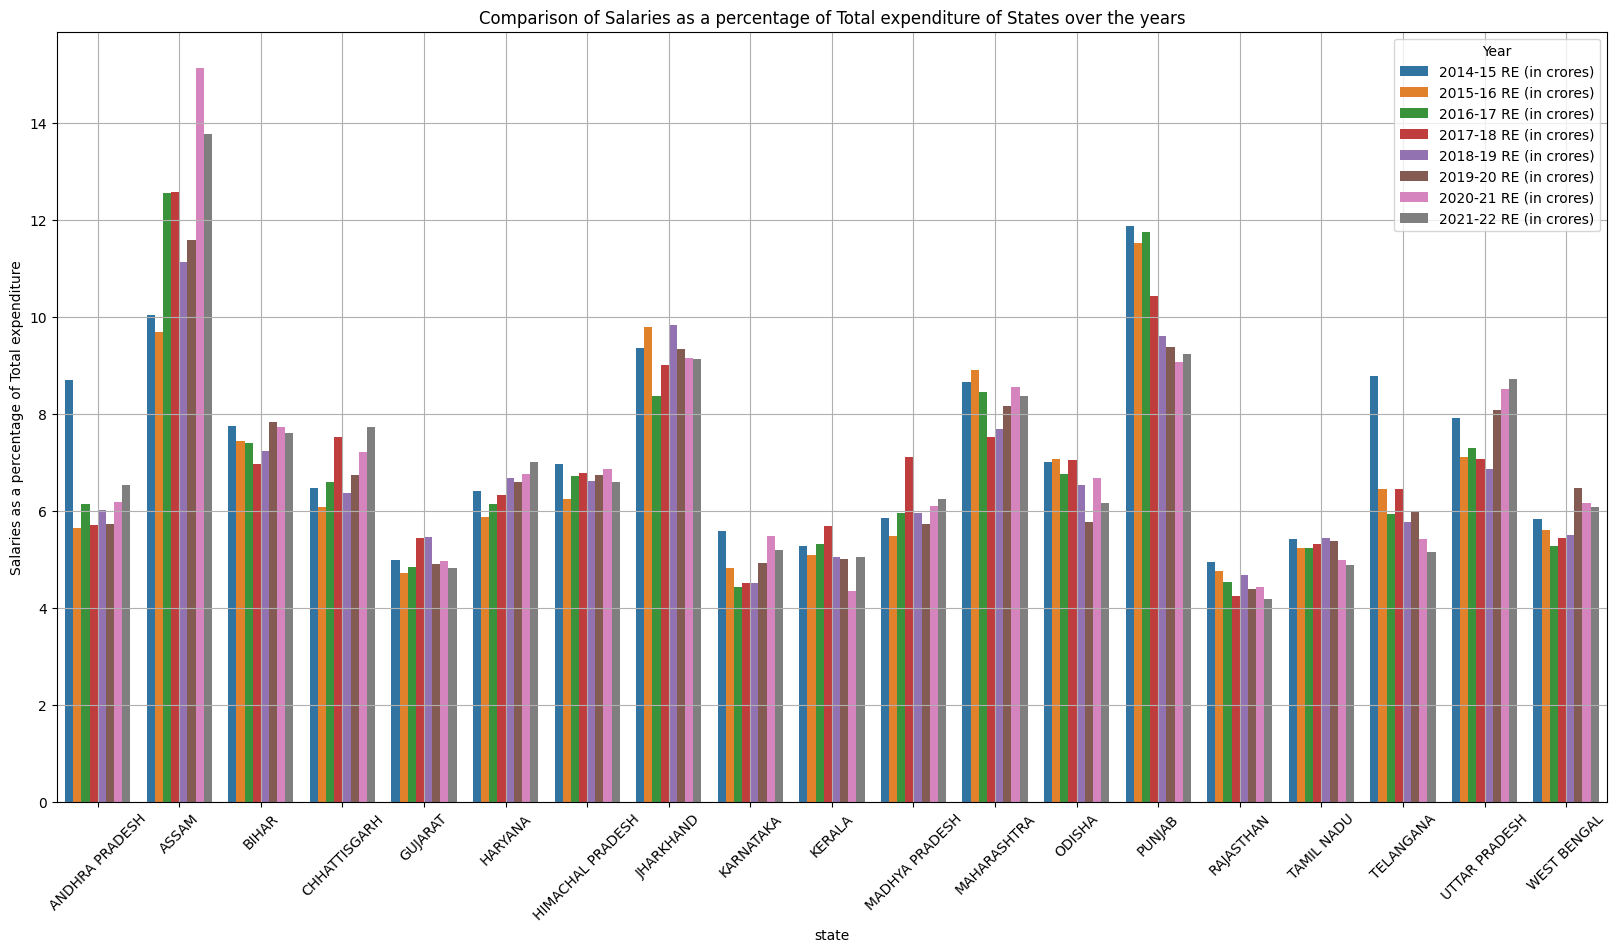

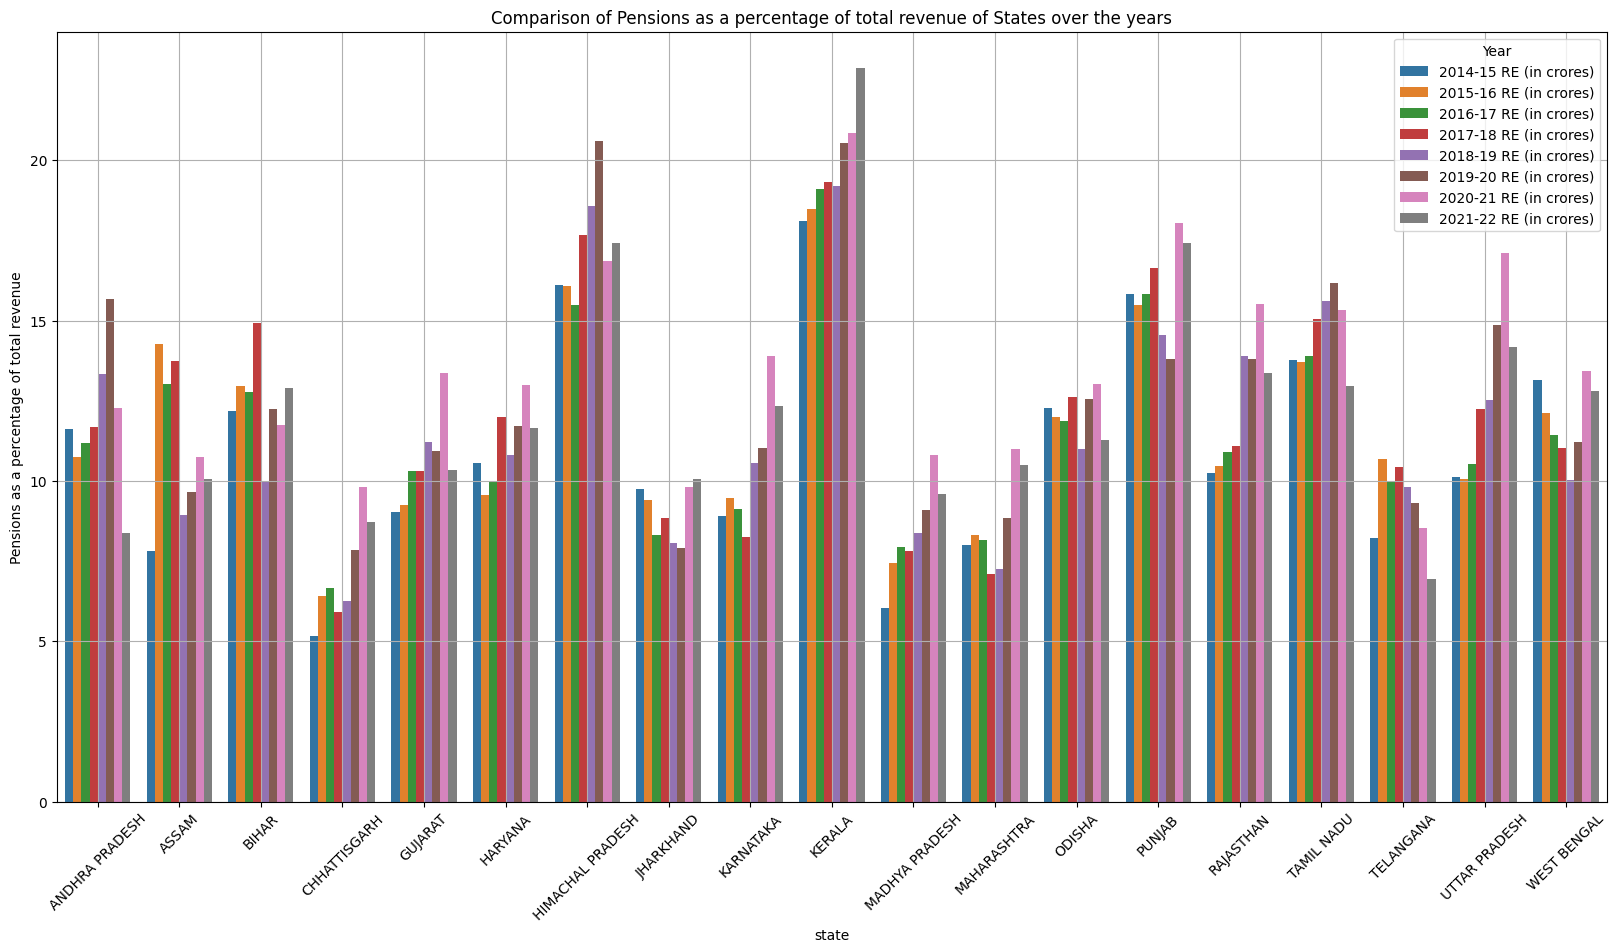

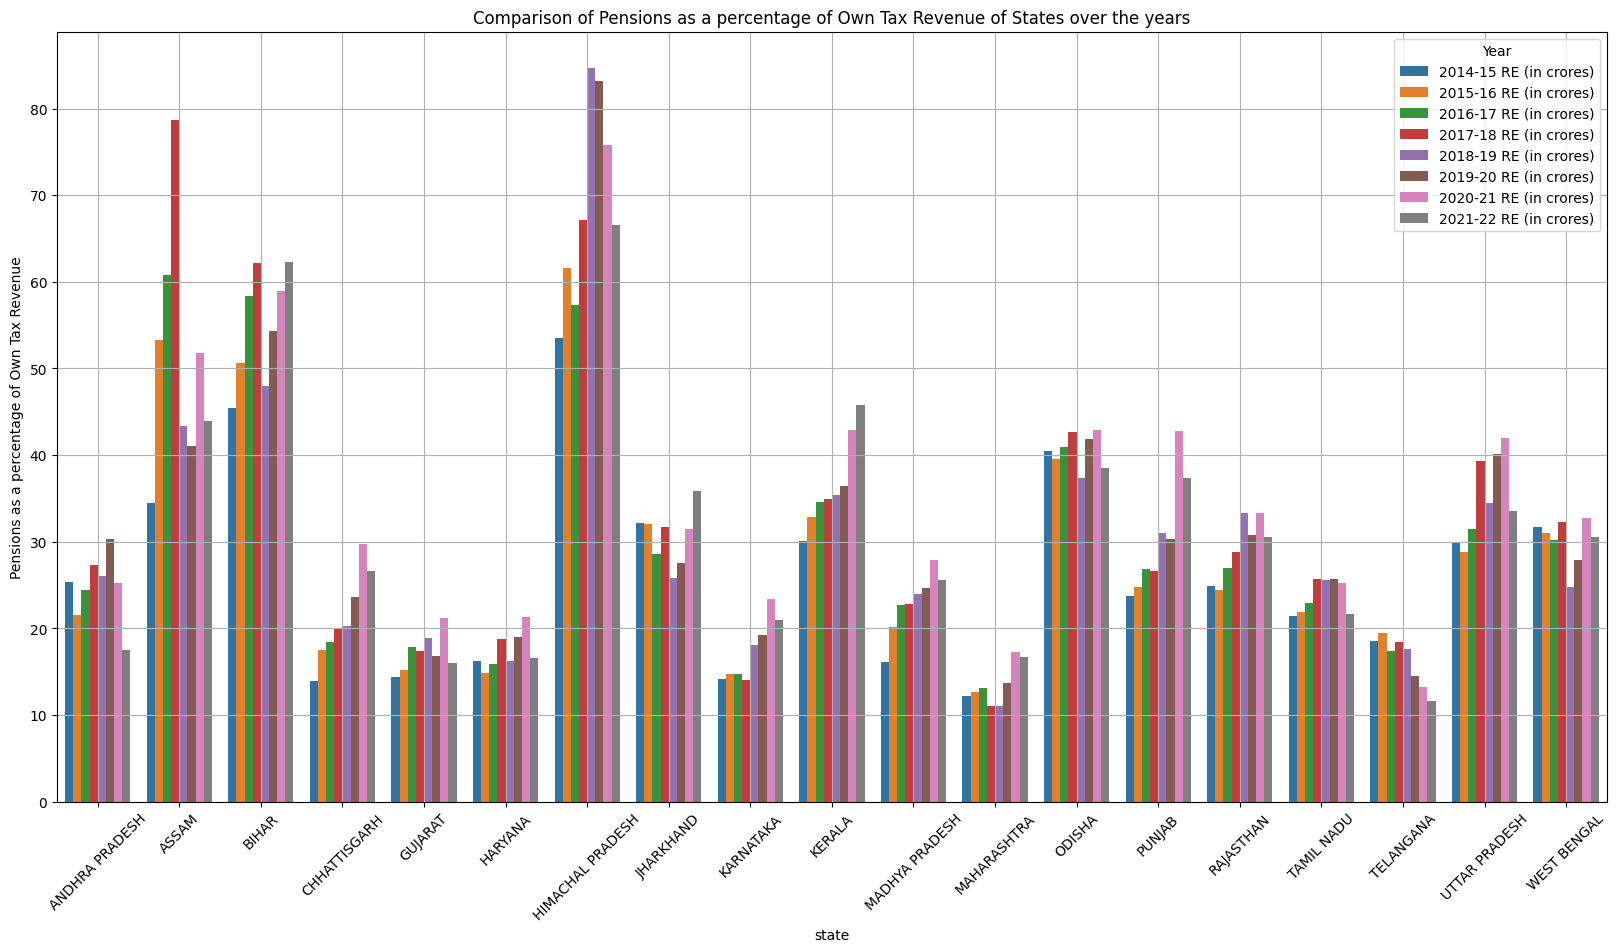

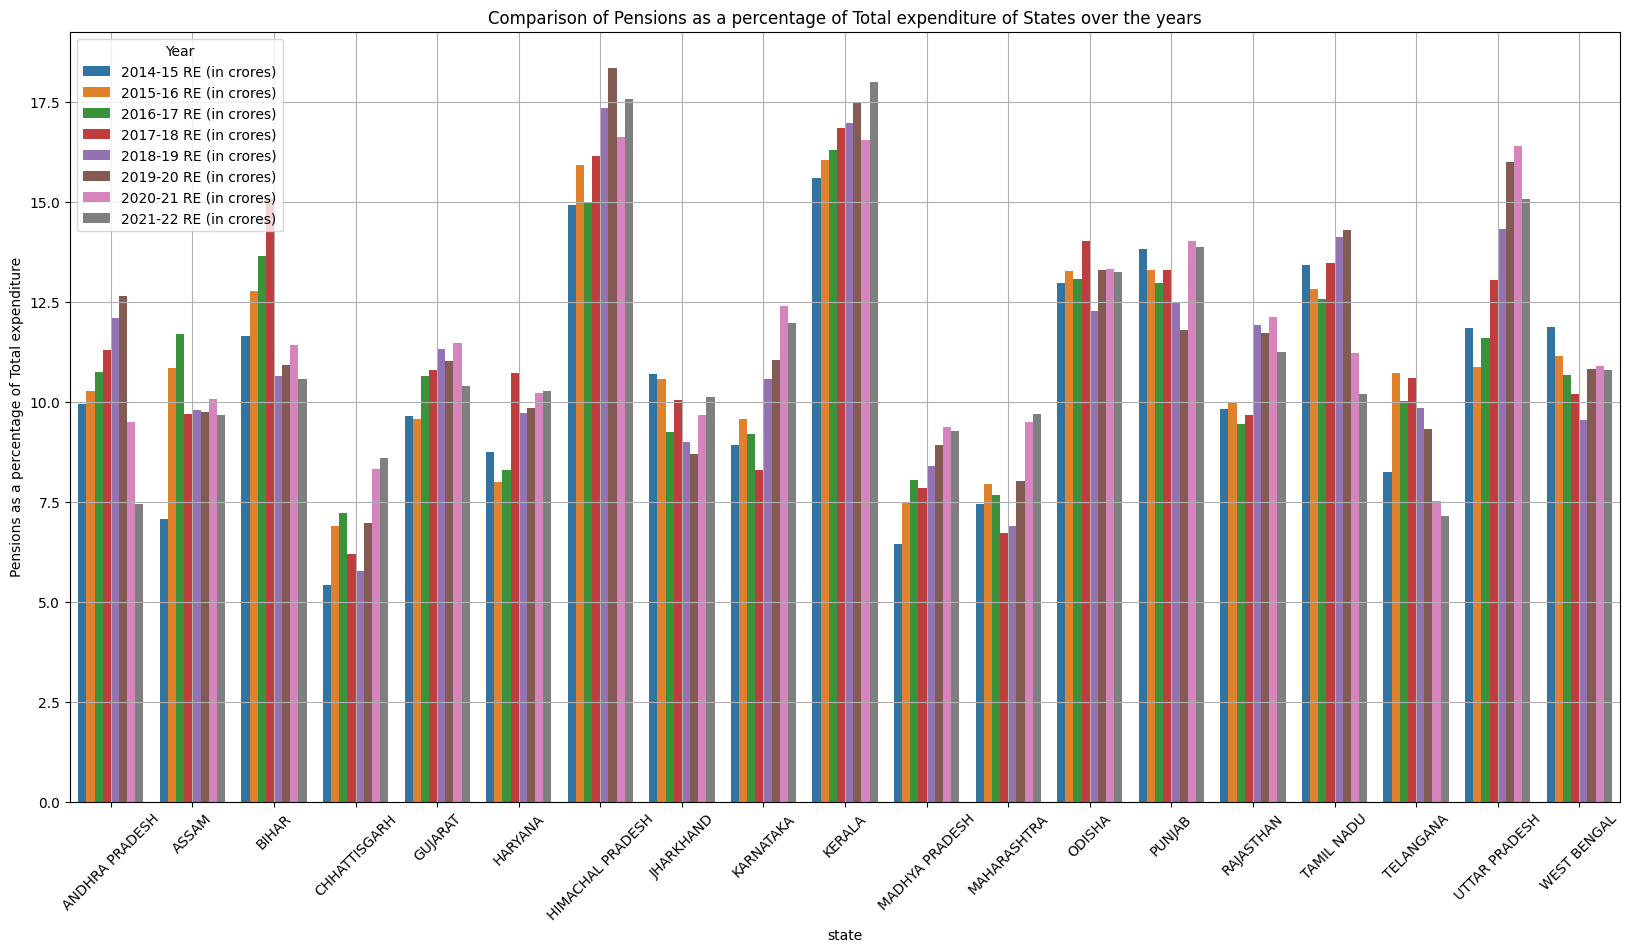

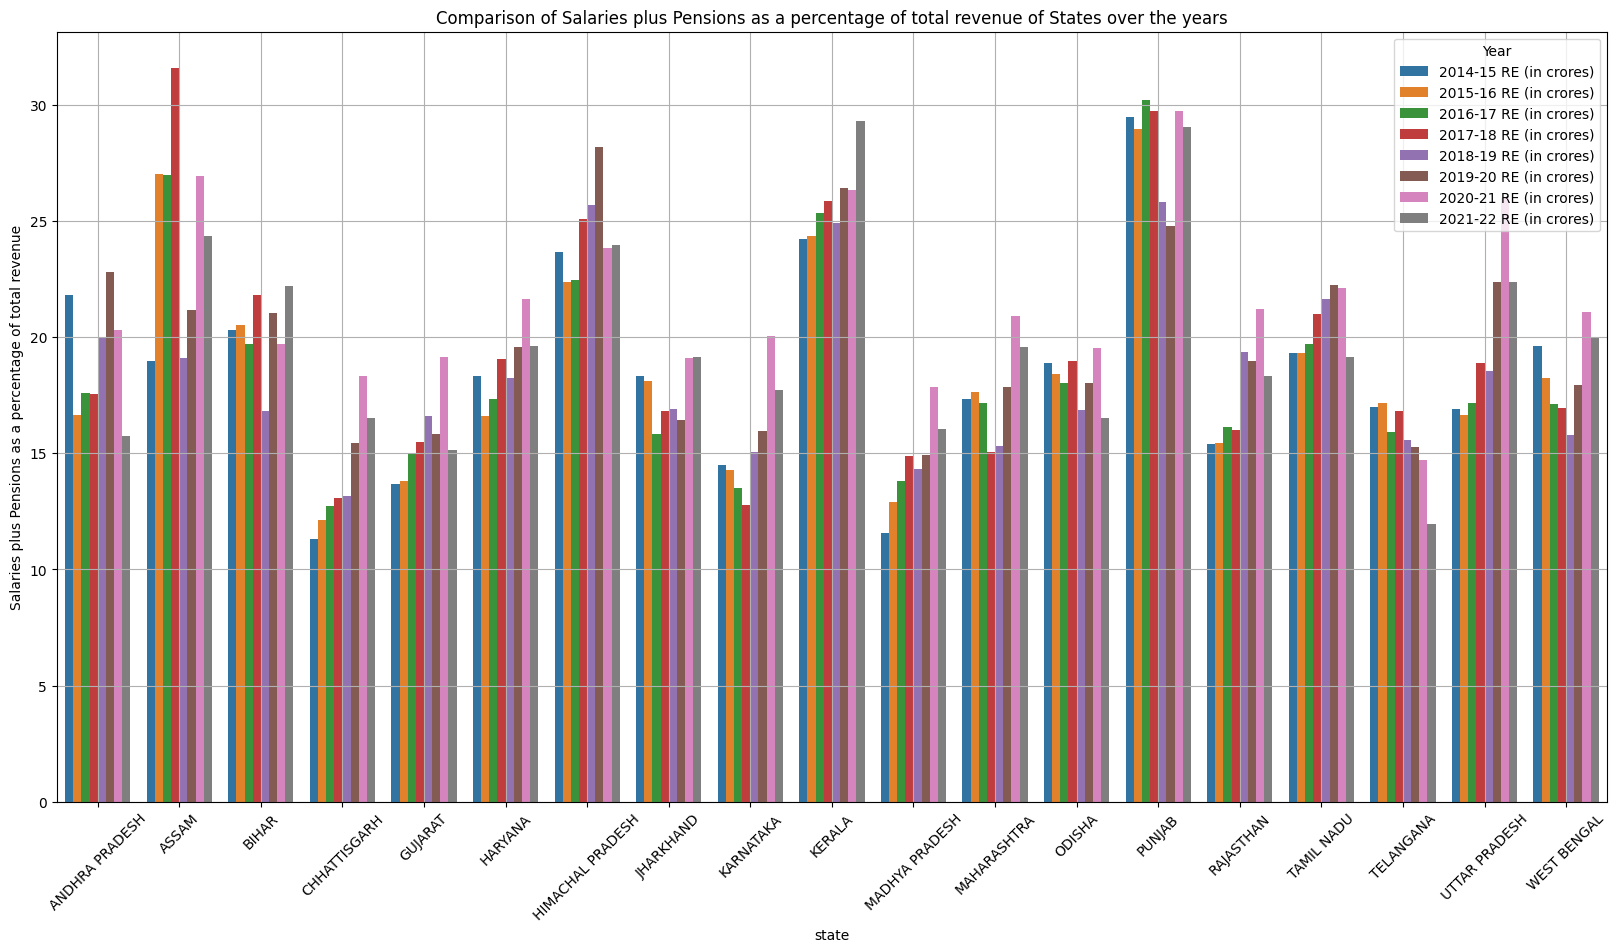

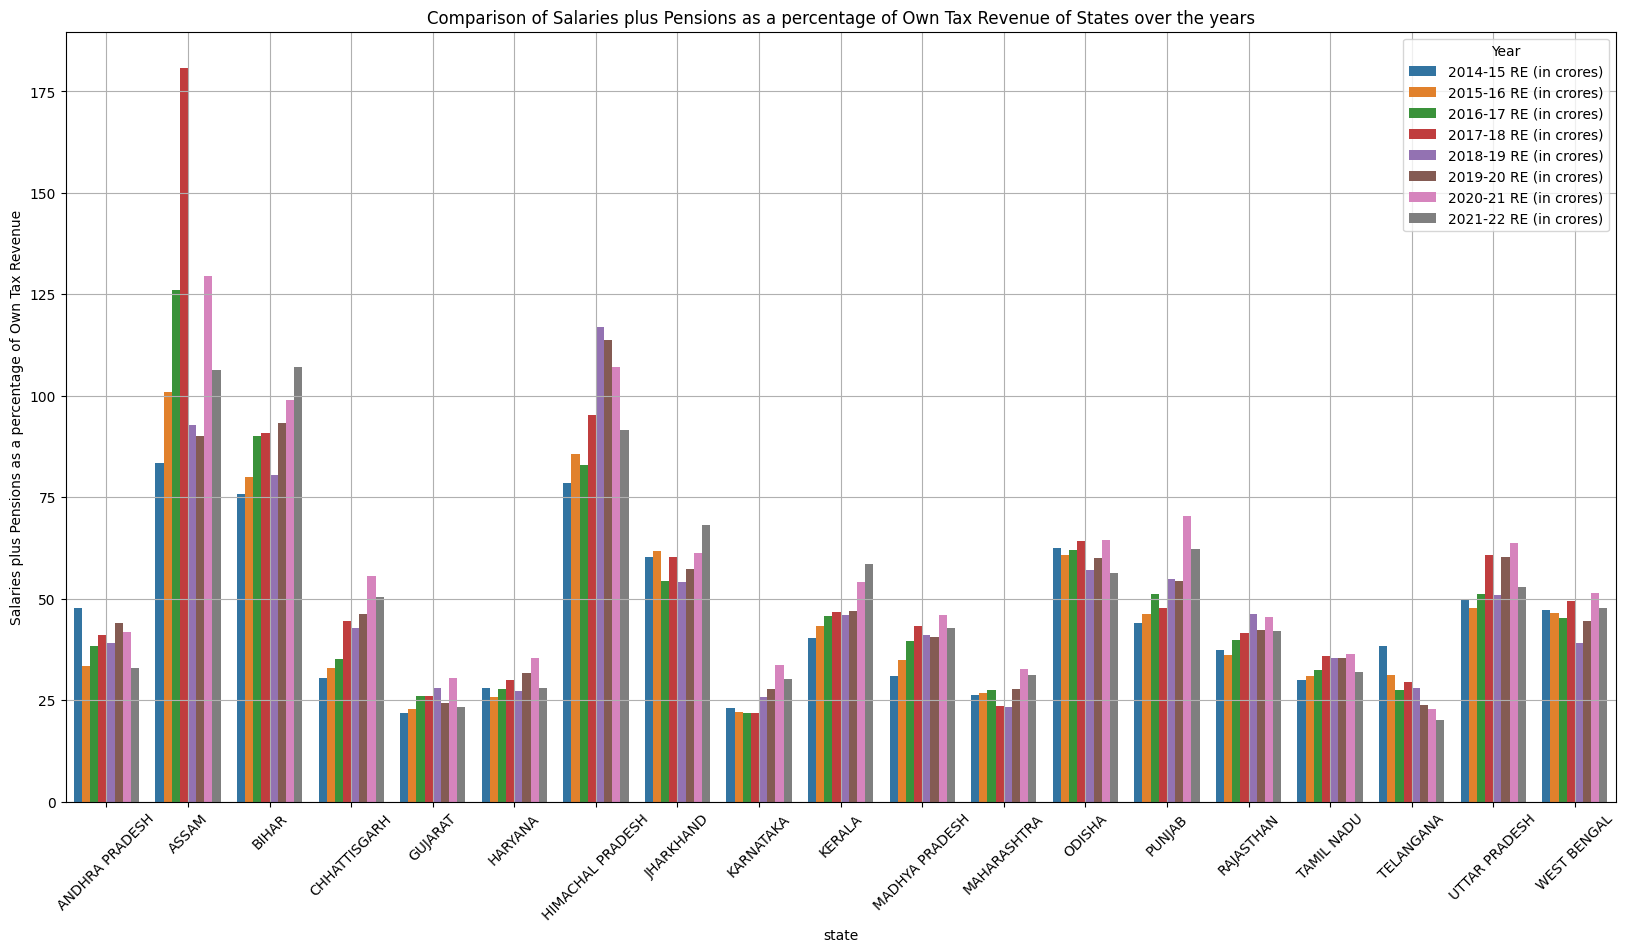

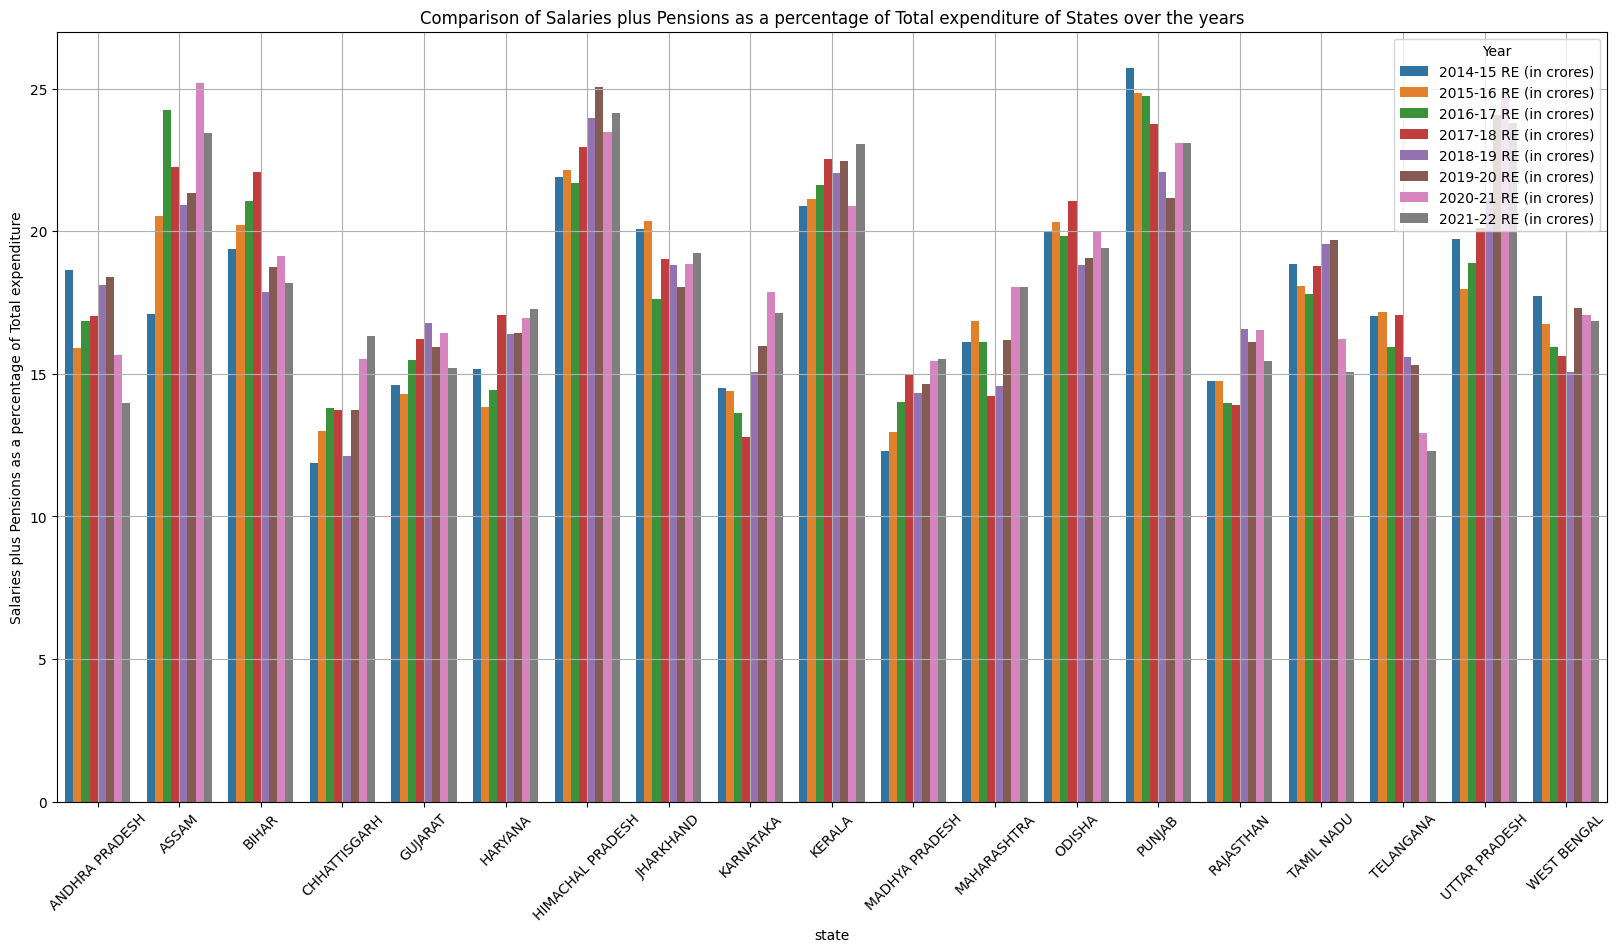

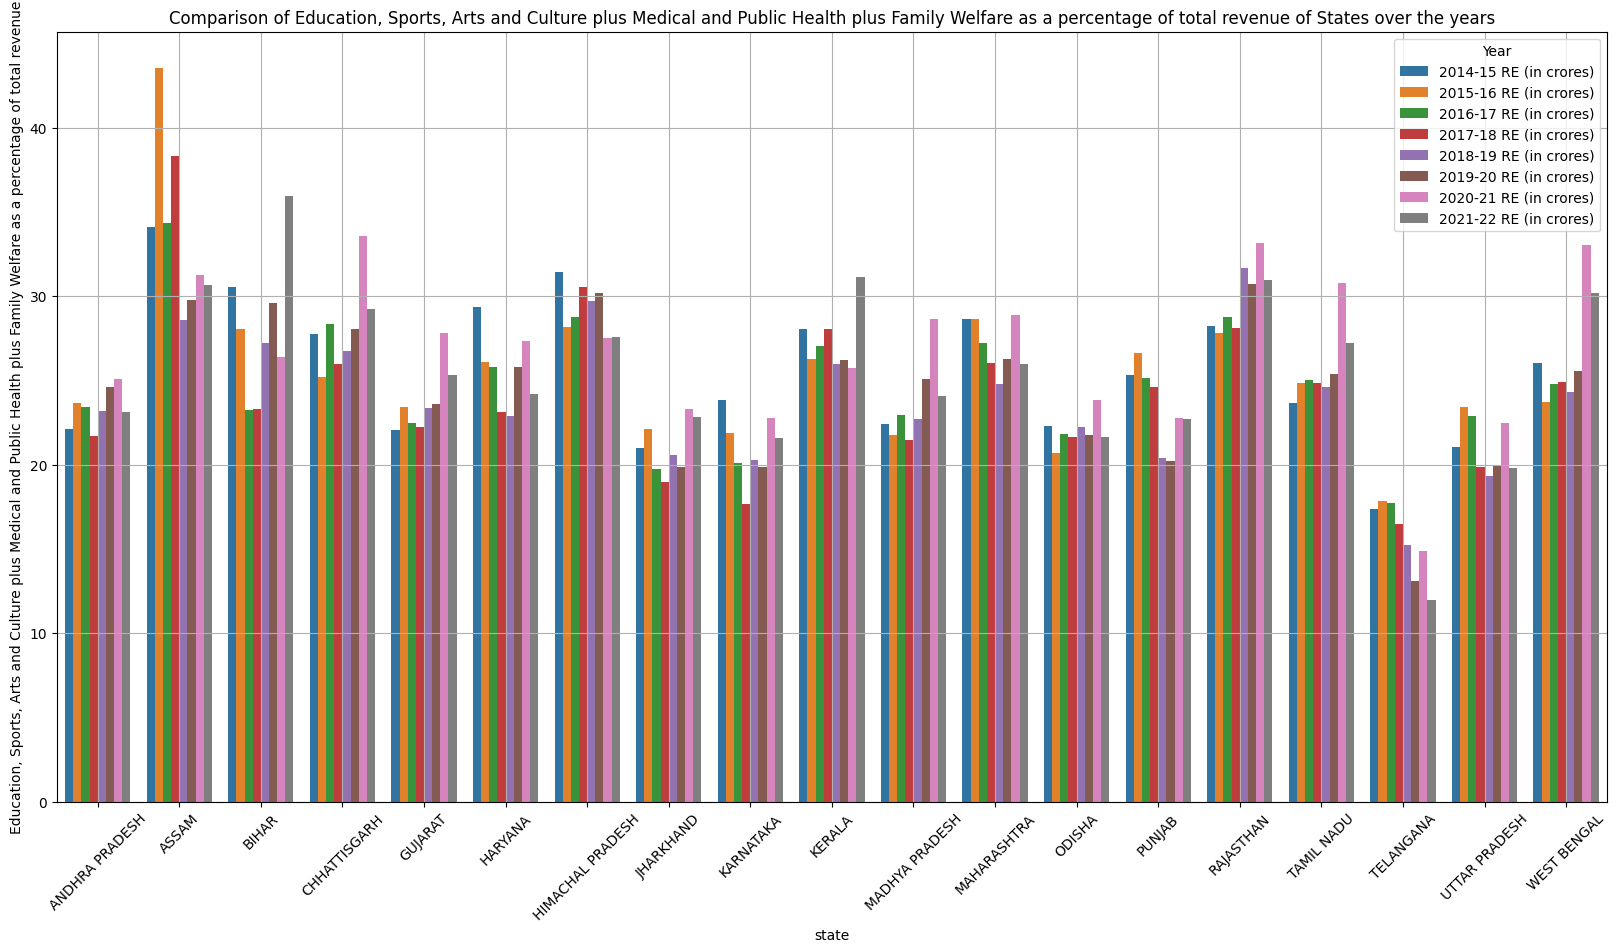

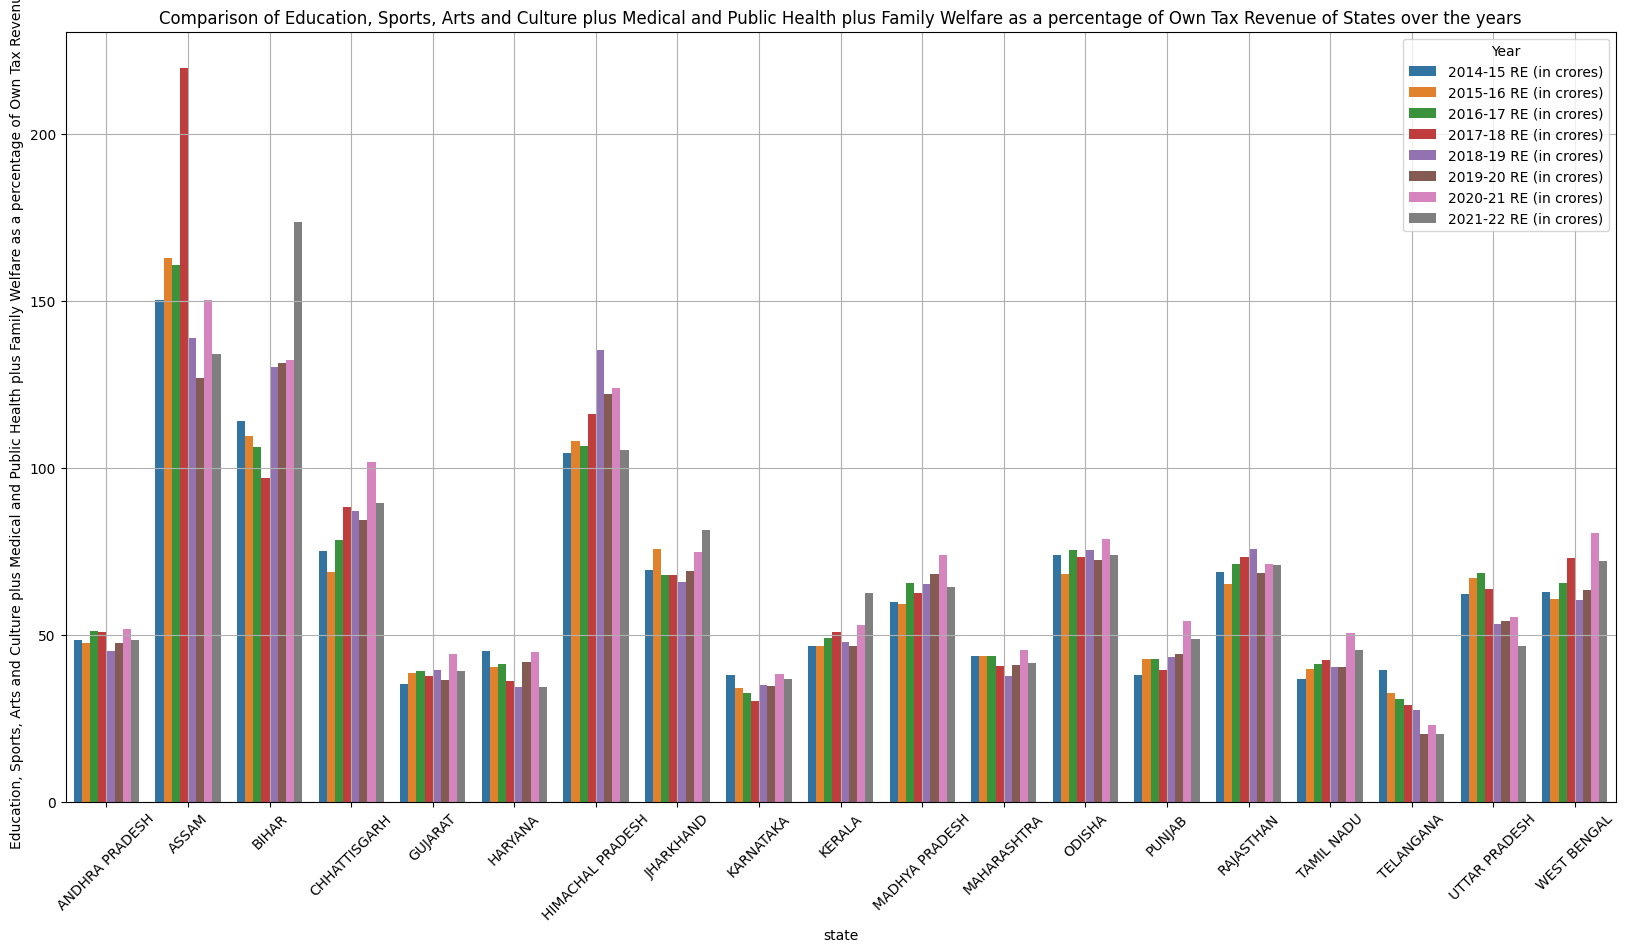

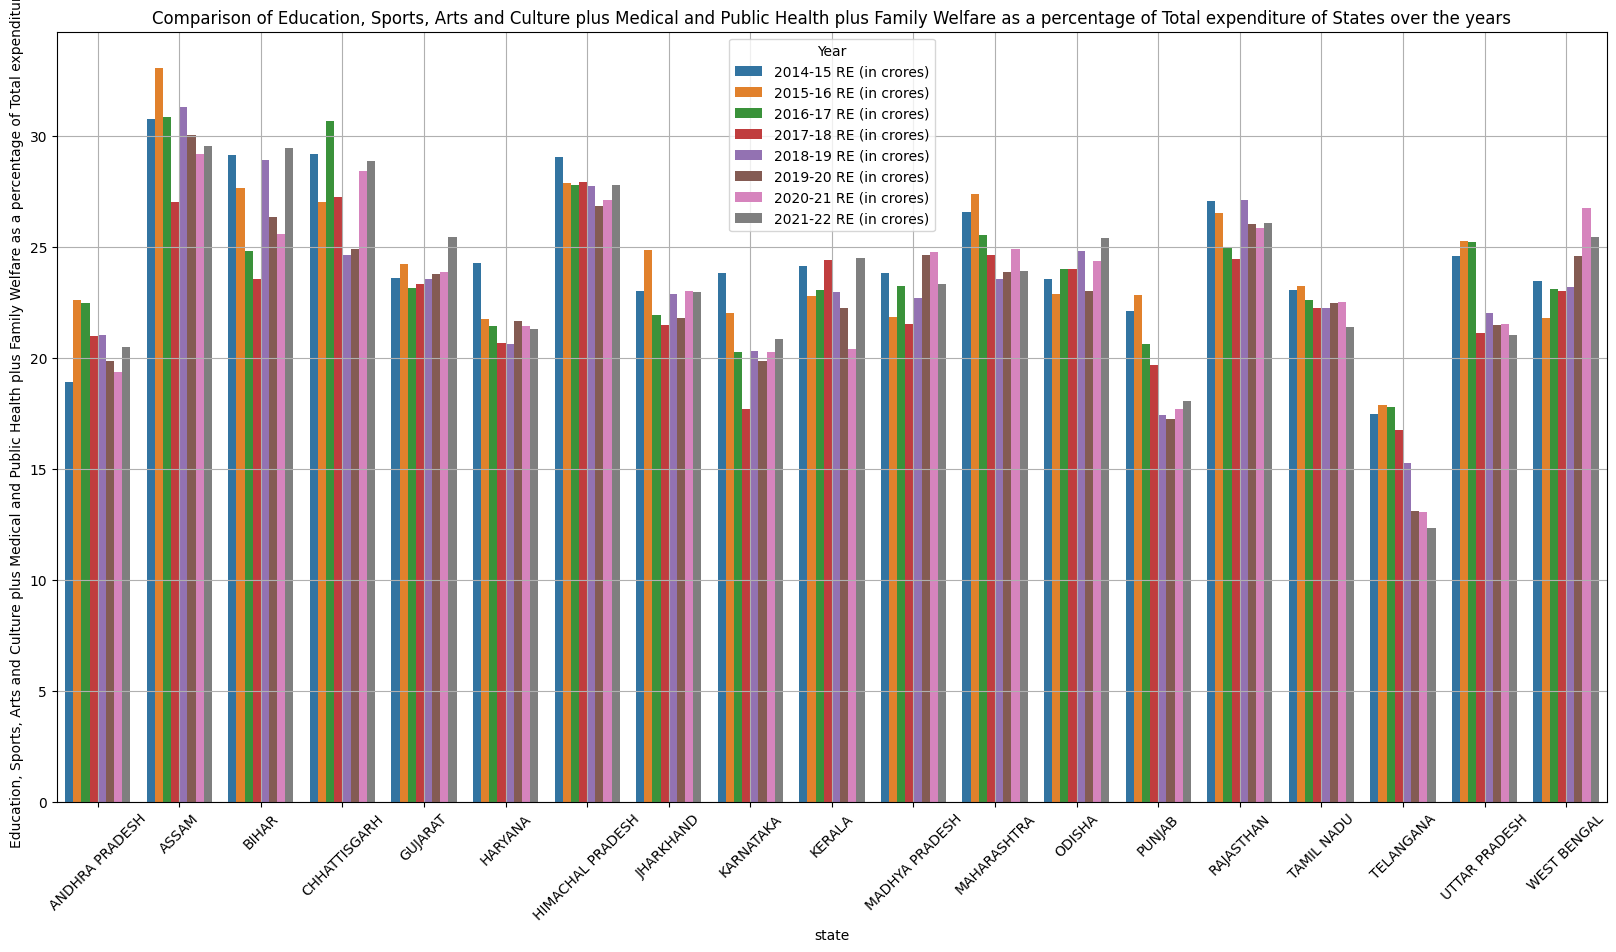

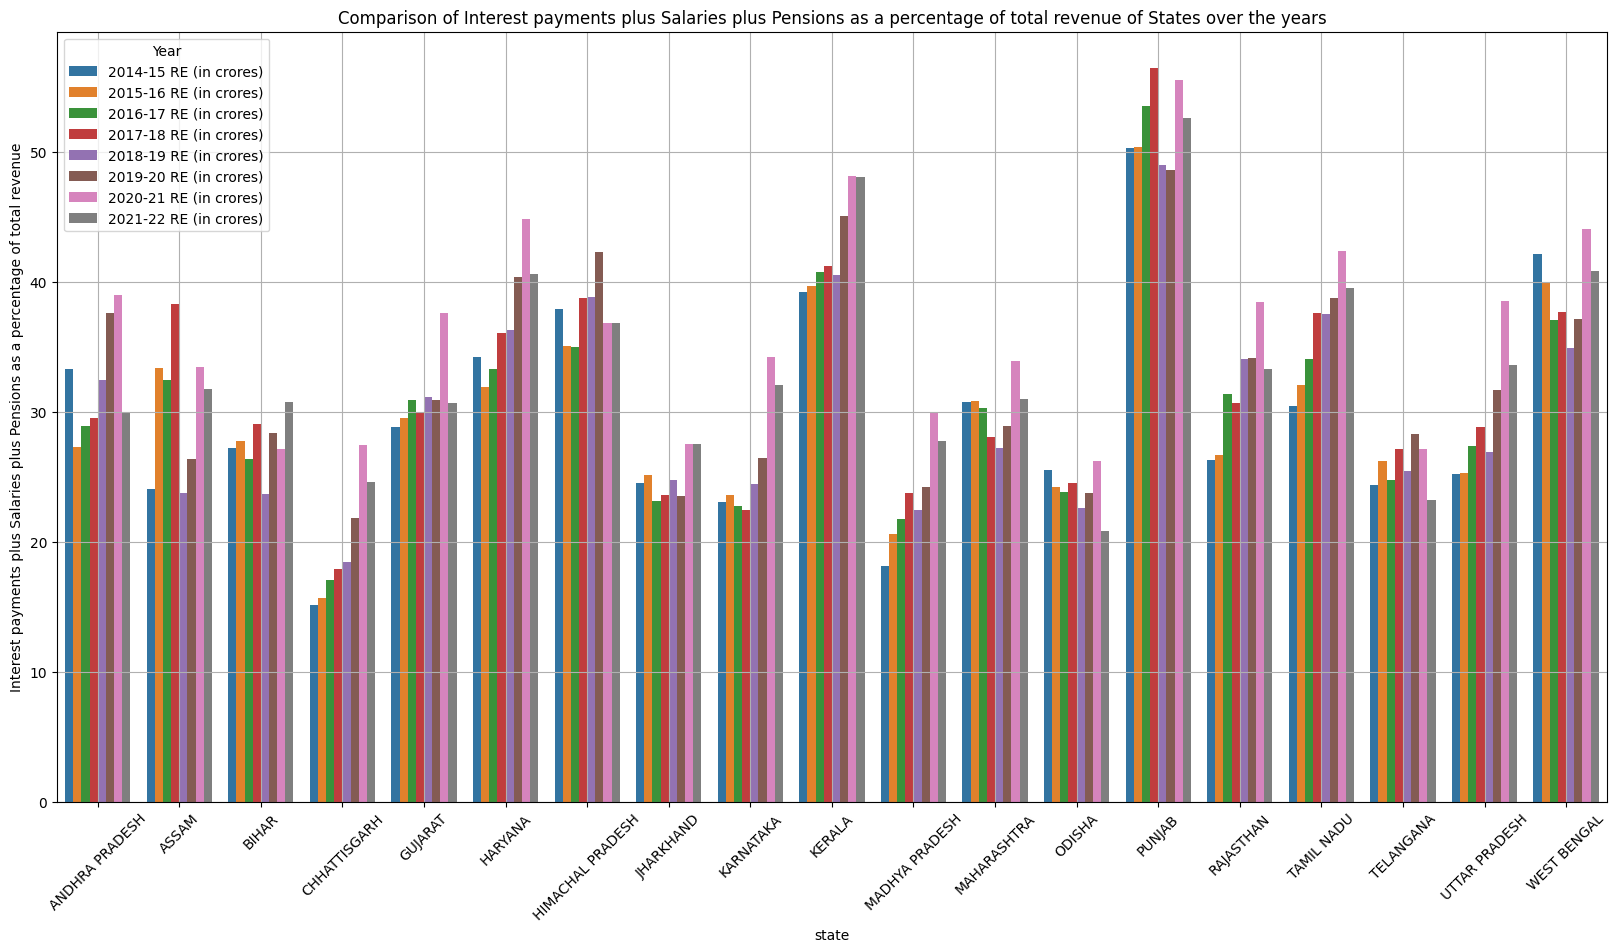

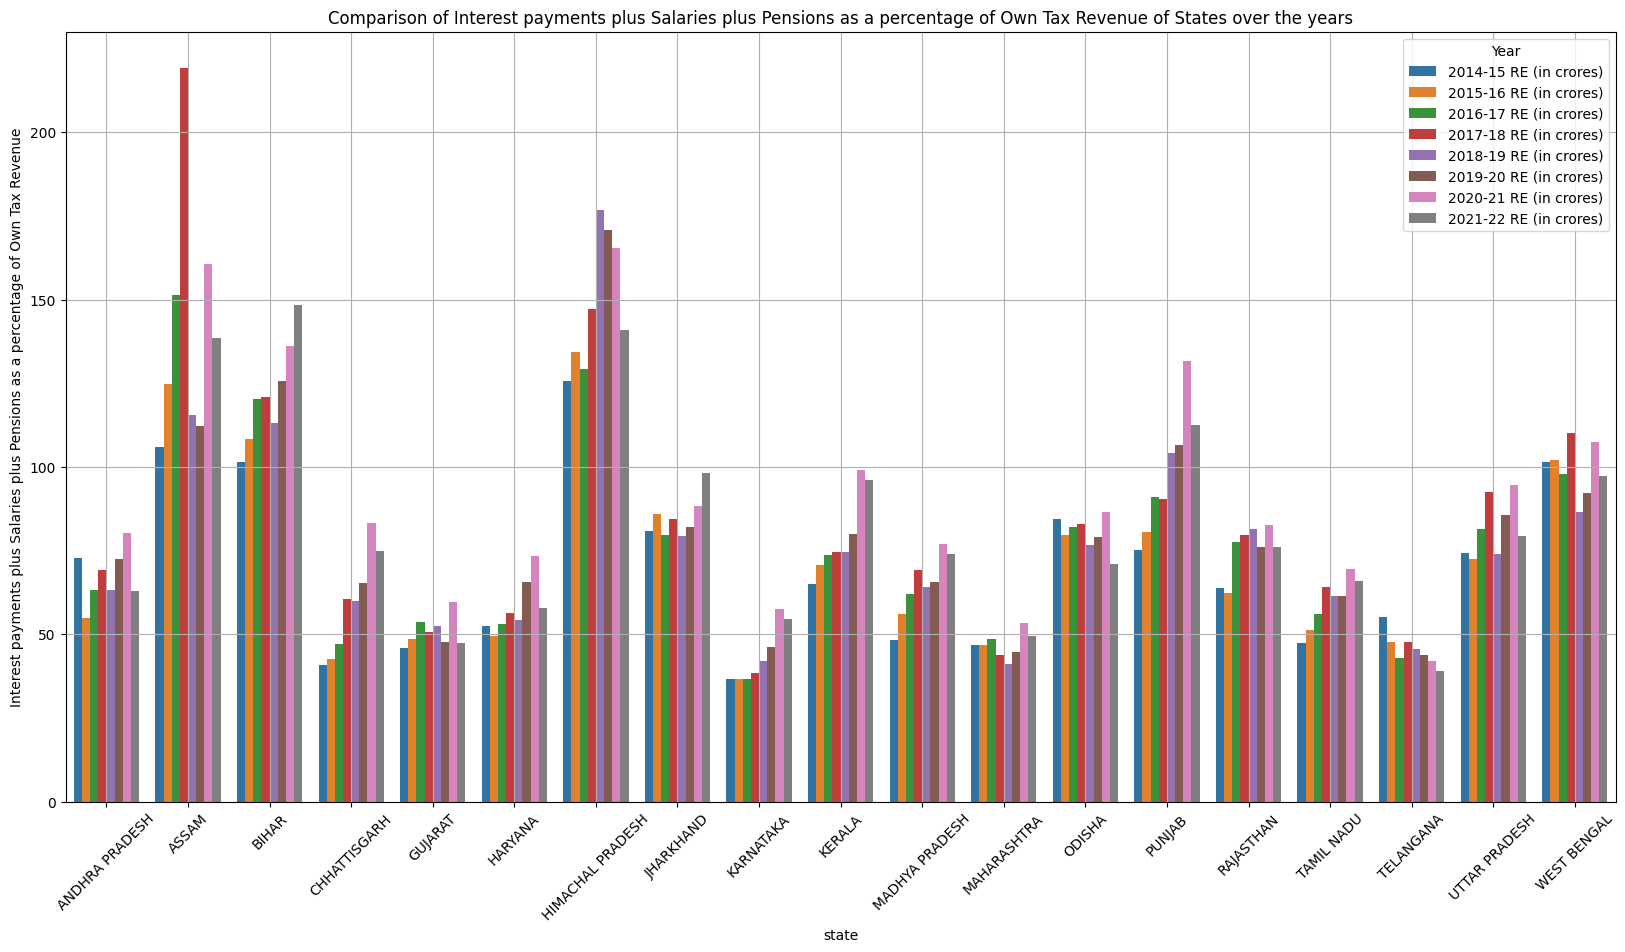

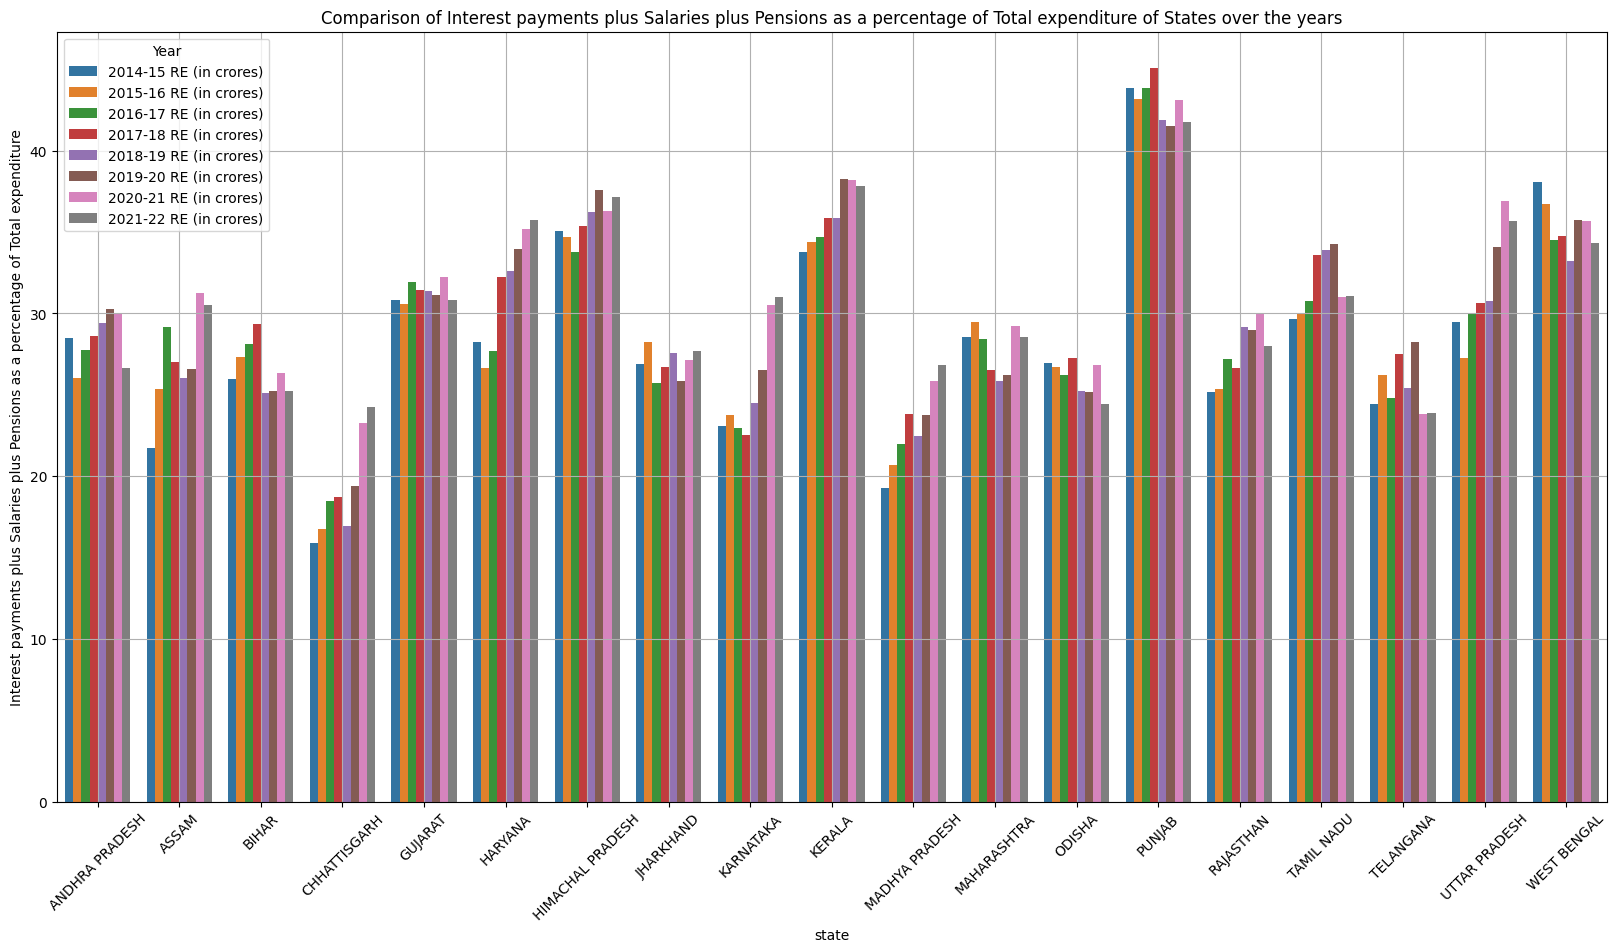

In [34]:
for plt_column in plt_columns:
    plt.figure(figsize = (20, 10))
    sns.barplot(data = final_df, y = plt_column, x = 'state', hue = 'Year')
    title = f'Comparison of {plt_column} of States over the years'
    plt.title(title)
    plt.xticks(rotation = 45)
    plt.grid(True)
    plt.savefig(f'./images/{title}.png', bbox_inches='tight')
    plt.show()

In [35]:
final_df['Year'].unique()

array(['2014-15 RE (in crores)', '2015-16 RE (in crores)',
       '2016-17 RE (in crores)', '2017-18 RE (in crores)',
       '2018-19 RE (in crores)', '2019-20 RE (in crores)',
       '2020-21 RE (in crores)', '2021-22 RE (in crores)'], dtype=object)

In [36]:
year1 = '2014-15 RE (in crores)'
year2 = '2021-22 RE (in crores)'

filtered = final_df[(final_df['Year'] == year1) | (final_df['Year'] == year2)]

filtered.head()

0                    Year total revenue Own Tax Revenue Total expenditure  \
7  2014-15 RE (in crores)      84066.05        38475.11          98308.63   
0  2021-22 RE (in crores)    154272.703       73631.848        173817.837   
7  2014-15 RE (in crores)      47340.28        10751.79          52429.18   
0  2021-22 RE (in crores)     96042.364       21985.183         99752.916   
7  2014-15 RE (in crores)      95744.93        25662.95         100254.89   

0 Developmental Expenditure Education, Sports, Arts and Culture  \
7                  67755.81                            14476.43   
0                125589.937                           22675.442   
7                  34493.47                             13157.4   
0                 65297.785                           21092.629   
7                  70967.34                             25081.2   

0 Medical and Public Health Family Welfare Non Developmental Expenditure  \
7                   3464.66          670.1                      30456.69   
0                   9240.67       3732.187                     48200.427   
7                   2749.14         241.94                      13027.22   
0                  7904.315        484.416                     33608.197   
7                   3693.59         469.44                      29283.43   

0 Interest payments   Salaries   Pensions           state Revenue Deficit  \
7           9676.23    8548.45    9778.01  ANDHRA PRADESH        14242.58   
0         21996.715  11349.538  12931.783  ANDHRA PRADESH       19545.134   
7            2408.8     5268.6     3704.1           ASSAM          5088.9   
0          7063.727  13736.302   9653.431           ASSAM        3710.552   
7           6585.51    7766.95   11666.45           BIHAR         4509.96   

0 Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare  \
7                                           18611.19                                       
0                                          35648.299                                       
7                                           16148.48                                       
0                                           29481.36                                       
7                                           29244.23                                       

0 Interest payments plus Salaries plus Pensions  \
7                                      28002.69   
0                                     46278.036   
7                                       11381.5   
0                                      30453.46   
7                                      26018.91   

0 Medical and Public Health and Family Welfare Salaries plus Pensions  \
7                                      4134.76               18326.46   
0                                    12972.857              24281.321   
7                                      2991.08                 8972.7   
0                                     8388.731              23389.733   
7                                      4163.03                19433.4   

0 Own Tax Revenue as a percentage of total revenue  \
7                                        45.767715   
0                                        47.728371   
7                                        22.711716   
0                                        22.891131   
7                                        26.803456   

0 Own Tax Revenue as a percentage of Total expenditure  \
7                                          39.137063     
0                                          42.361503     
7                                          20.507263     
0                                          22.039639     
7                                          25.597704     

0 Developmental Expenditure as a percentage of total revenue  \
7                                          80.598303           
0                                           81.40775           
7                                          72.862

In [37]:
pivot_table = filtered.pivot(index='state', columns='Year')
pivot_table.head()

0                       total revenue                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH               84066.05             154272.703   
ASSAM                        47340.28              96042.364   
BIHAR                        95744.93             169110.846   
CHHATTISGARH                 49041.44               83981.44   
GUJARAT                      98984.96              163020.19   

0                     Own Tax Revenue                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH               38475.11              73631.848   
ASSAM                        10751.79              21985.183   
BIHAR                        25662.95                35050.0   
CHHATTISGARH                 18126.75                27500.0   
GUJARAT                      62067.01              105299.74   

0                   Total expenditure                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH               98308.63             173817.837   
ASSAM                        52429.18              99752.916   
BIHAR                       100254.89             206318.072   
CHHATTISGARH                 46665.43               85016.07   
GUJARAT                      92597.89              162306.08   

0              Developmental Expenditure                         \
Year              2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                             
ANDHRA PRADESH                  67755.81             125589.937   
ASSAM                           34493.47              65297.785   
BIHAR                           70967.34             150046.447   
CHHATTISGARH                    36893.83              60810.715   
GUJARAT                         61173.18              107702.77   

0              Education, Sports, Arts and Culture                         \
Year                        2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                                       
ANDHRA PRADESH                            14476.43              22675.442   
ASSAM                                      13157.4              21092.629   
BIHAR                                      25081.2              46487.732   
CHHATTISGARH                              10985.12              17704.821   
GUJARAT                                   16823.83               28229.85   

0              Medical and Public Health                         \
Year              2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                             
ANDHRA PRADESH                   3464.66                9240.67   
ASSAM                            2749.14               7904.315   
BIHAR                            3693.59               12624.71   
CHHATTISGARH                      2434.3               6537.859   
GUJARAT                          4275.15               10475.62   

0                      Family Welfare                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH                  670.1               3732.187   
ASSAM                          241.94                484.416   
BIHAR                          469.44               1723.049   
CHHATTISGARH                   198.86                329.468   
GUJARAT                        756.86                2599.19   

0              Non Developmental Expenditure                         \
Year                  2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                                 
ANDHRA PRADESH                      30456.69

In [38]:
pivot_table.columns.levels[0]

Index(['total revenue', 'Own Tax Revenue', 'Total expenditure',
       'Developmental Expenditure', 'Education, Sports, Arts and Culture',
       'Medical and Public Health', 'Family Welfare',
       'Non Developmental Expenditure', 'Interest payments', 'Salaries',
       'Pensions', 'Revenue Deficit',
       'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare',
       'Interest payments plus Salaries plus Pensions',
       'Medical and Public Health and Family Welfare',
       'Salaries plus Pensions',
       'Own Tax Revenue as a percentage of total revenue',
       'Own Tax Revenue as a percentage of Total expenditure',
       'Developmental Expenditure as a percentage of total revenue',
       'Developmental Expenditure as a percentage of Own Tax Revenue',
       'Developmental Expenditure as a percentage of Total expenditure',
       'Education, Sports, Arts and Culture as a percentage of total revenue',
       'Education, Sports, Arts and Cultu

In [39]:
for column in pivot_table.columns.levels[0]:
    pivot_table[(column, 'percentage change')] = 100 * ( pivot_table[(column, year2)] - pivot_table[(column, year1)] ) / pivot_table[(column, year1)]
    pivot_table[(column, 'percentage change')] = pivot_table[(column, 'percentage change')].apply(lambda x : np.round(x, 1))
pivot_table.head()

/var/folders/tg/4v5w5yh11vjckr48ltpscrdc0000gp/T/ipykernel_51446/256941486.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pivot_table[(column, 'percentage change')] = 100 * ( pivot_table[(column, year2)] - pivot_table[(column, year1)] ) / pivot_table[(column, year1)]
/var/folders/tg/4v5w5yh11vjckr48ltpscrdc0000gp/T/ipykernel_51446/256941486.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pivot_table[(column, 'percentage change')] = 100 * ( pivot_table[(column, year2)] - pivot_table[(column, year1)] ) / pivot_table[(colu

0                       total revenue                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH               84066.05             154272.703   
ASSAM                        47340.28              96042.364   
BIHAR                        95744.93             169110.846   
CHHATTISGARH                 49041.44               83981.44   
GUJARAT                      98984.96              163020.19   

0                     Own Tax Revenue                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH               38475.11              73631.848   
ASSAM                        10751.79              21985.183   
BIHAR                        25662.95                35050.0   
CHHATTISGARH                 18126.75                27500.0   
GUJARAT                      62067.01              105299.74   

0                   Total expenditure                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH               98308.63             173817.837   
ASSAM                        52429.18              99752.916   
BIHAR                       100254.89             206318.072   
CHHATTISGARH                 46665.43               85016.07   
GUJARAT                      92597.89              162306.08   

0              Developmental Expenditure                         \
Year              2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                             
ANDHRA PRADESH                  67755.81             125589.937   
ASSAM                           34493.47              65297.785   
BIHAR                           70967.34             150046.447   
CHHATTISGARH                    36893.83              60810.715   
GUJARAT                         61173.18              107702.77   

0              Education, Sports, Arts and Culture                         \
Year                        2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                                       
ANDHRA PRADESH                            14476.43              22675.442   
ASSAM                                      13157.4              21092.629   
BIHAR                                      25081.2              46487.732   
CHHATTISGARH                              10985.12              17704.821   
GUJARAT                                   16823.83               28229.85   

0              Medical and Public Health                         \
Year              2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                             
ANDHRA PRADESH                   3464.66                9240.67   
ASSAM                            2749.14               7904.315   
BIHAR                            3693.59               12624.71   
CHHATTISGARH                      2434.3               6537.859   
GUJARAT                          4275.15               10475.62   

0                      Family Welfare                         \
Year           2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                          
ANDHRA PRADESH                  670.1               3732.187   
ASSAM                          241.94                484.416   
BIHAR                          469.44               1723.049   
CHHATTISGARH                   198.86                329.468   
GUJARAT                        756.86                2599.19   

0              Non Developmental Expenditure                         \
Year                  2014-15 RE (in crores) 2021-22 RE (in crores)   
state                                                                 
ANDHRA PRADESH                      30456.69

In [40]:
pivot_table.columns.levels

FrozenList([['total revenue', 'Own Tax Revenue', 'Total expenditure', 'Developmental Expenditure', 'Education, Sports, Arts and Culture', 'Medical and Public Health', 'Family Welfare', 'Non Developmental Expenditure', 'Interest payments', 'Salaries', 'Pensions', 'Revenue Deficit', 'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare', 'Interest payments plus Salaries plus Pensions', 'Medical and Public Health and Family Welfare', 'Salaries plus Pensions', 'Own Tax Revenue as a percentage of total revenue', 'Own Tax Revenue as a percentage of Total expenditure', 'Developmental Expenditure as a percentage of total revenue', 'Developmental Expenditure as a percentage of Own Tax Revenue', 'Developmental Expenditure as a percentage of Total expenditure', 'Education, Sports, Arts and Culture as a percentage of total revenue', 'Education, Sports, Arts and Culture as a percentage of Own Tax Revenue', 'Education, Sports, Arts and Culture as a percentage of Tot

In [31]:
pivot_table.index

Index(['ANDHRA PRADESH', 'ASSAM', 'BIHAR', 'CHHATTISGARH', 'GUJARAT',
       'HARYANA', 'HIMACHAL PRADESH', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'ODISHA', 'PUNJAB', 'RAJASTHAN',
       'TAMIL NADU', 'TELANGANA', 'UTTAR PRADESH', 'WEST BENGAL'],
      dtype='object', name='state')

In [49]:
l = [1,2,3]

print(l.reverse())
l

None


[3, 2, 1]

In [50]:
d = {}

states = pivot_table.index
variables = ['total revenue', 'Own Tax Revenue', 'Total expenditure', 'Developmental Expenditure', 'Education, Sports, Arts and Culture', 'Medical and Public Health', 'Family Welfare', 'Education, Sports, Arts and Culture plus Medical and Public Health plus Family Welfare', 'Non Developmental Expenditure', 'Interest payments', 'Salaries', 'Pensions', 'Salaries plus Pensions', 'Interest payments plus Salaries plus Pensions']

variables.reverse()

for variable in variables:
    percentage_changes = pivot_table[(variable, 'percentage change')]
    
    for state, percentage_change in zip(states, percentage_changes):
        try:
            d[state]['variables'].append(variable)
            d[state]['percentage changes'].append(percentage_change)
        except Exception as e:
            d[state] = {}
            d[state]['variables'] = [variable]
            d[state]['percentage changes'] = [percentage_change]


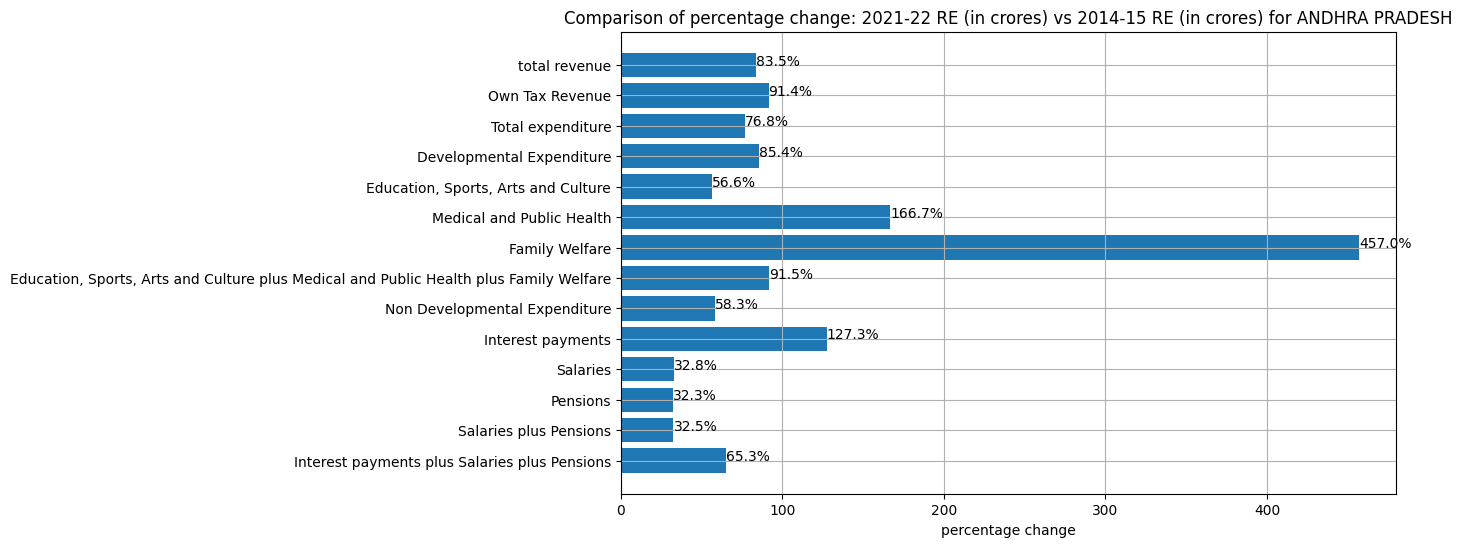

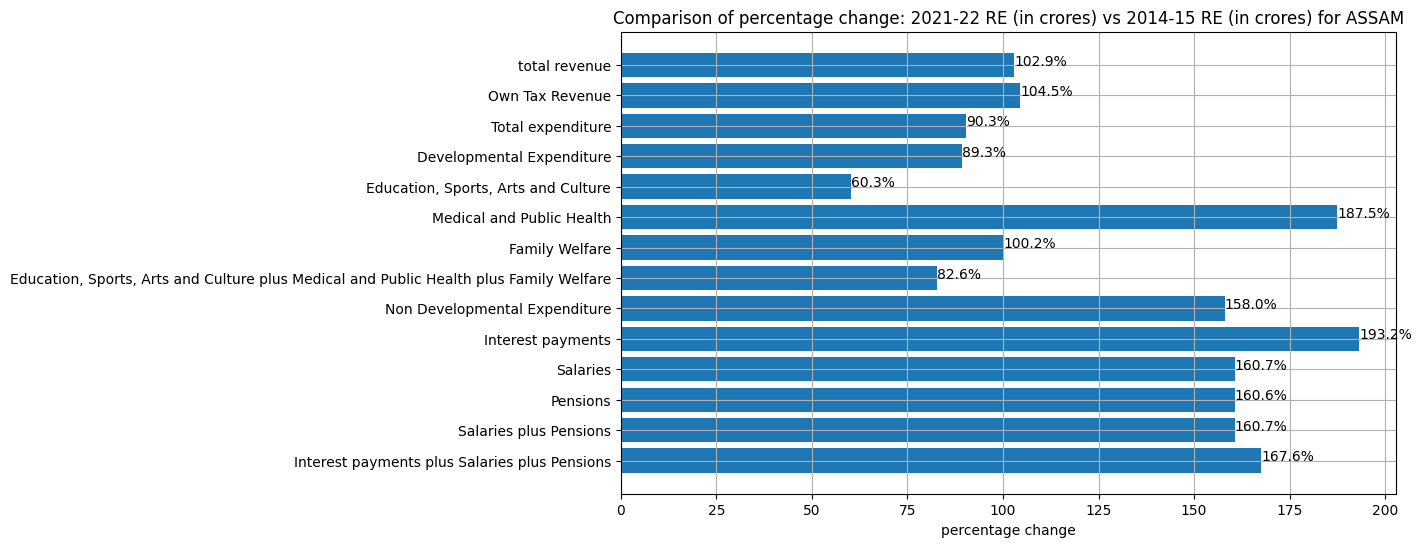

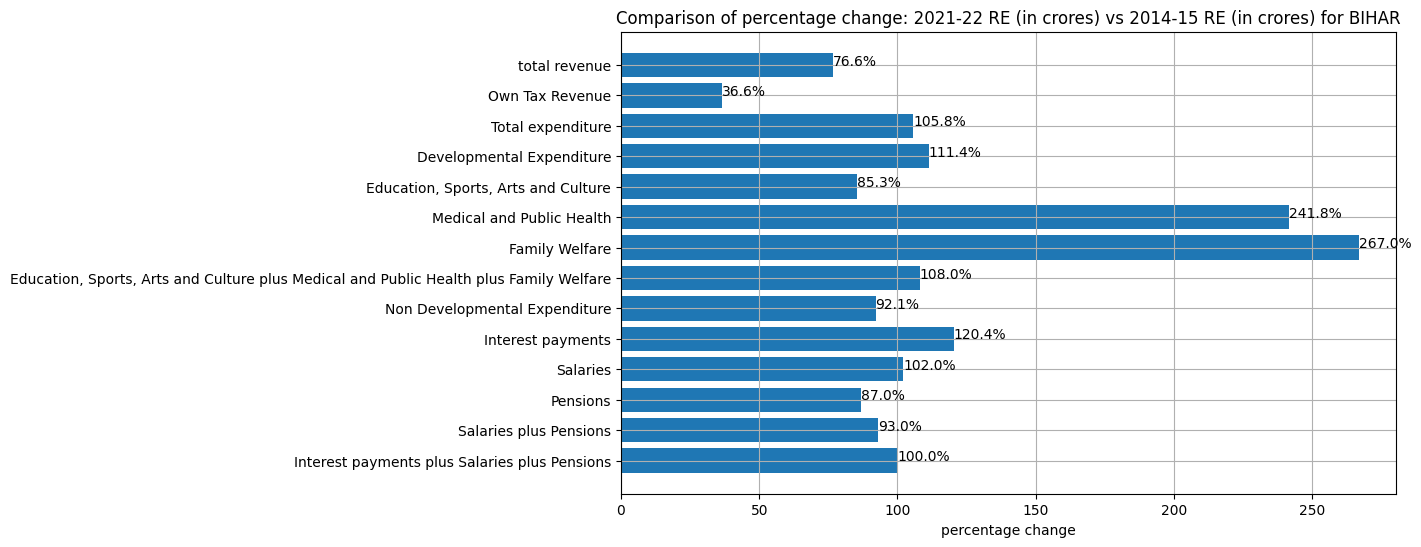

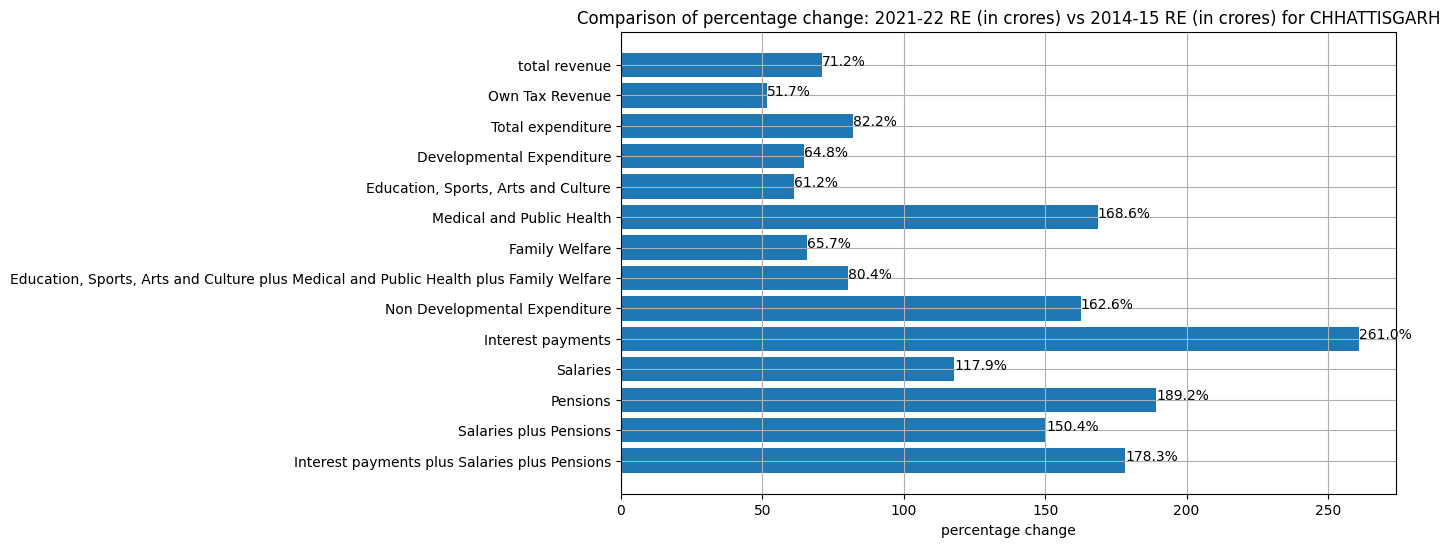

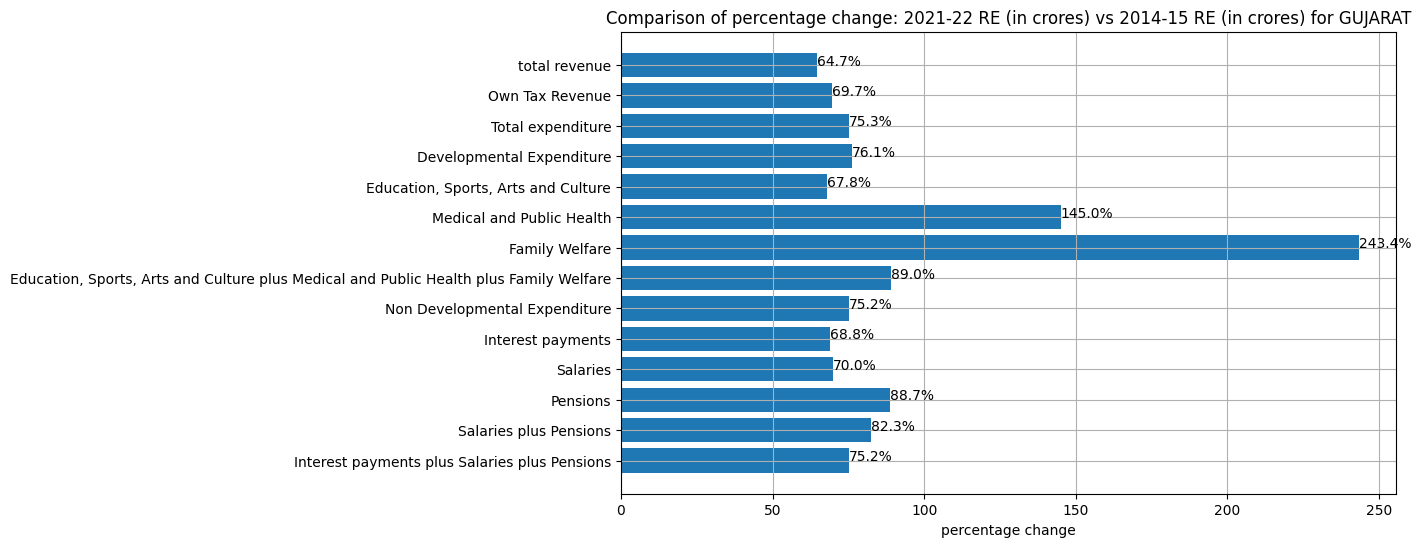

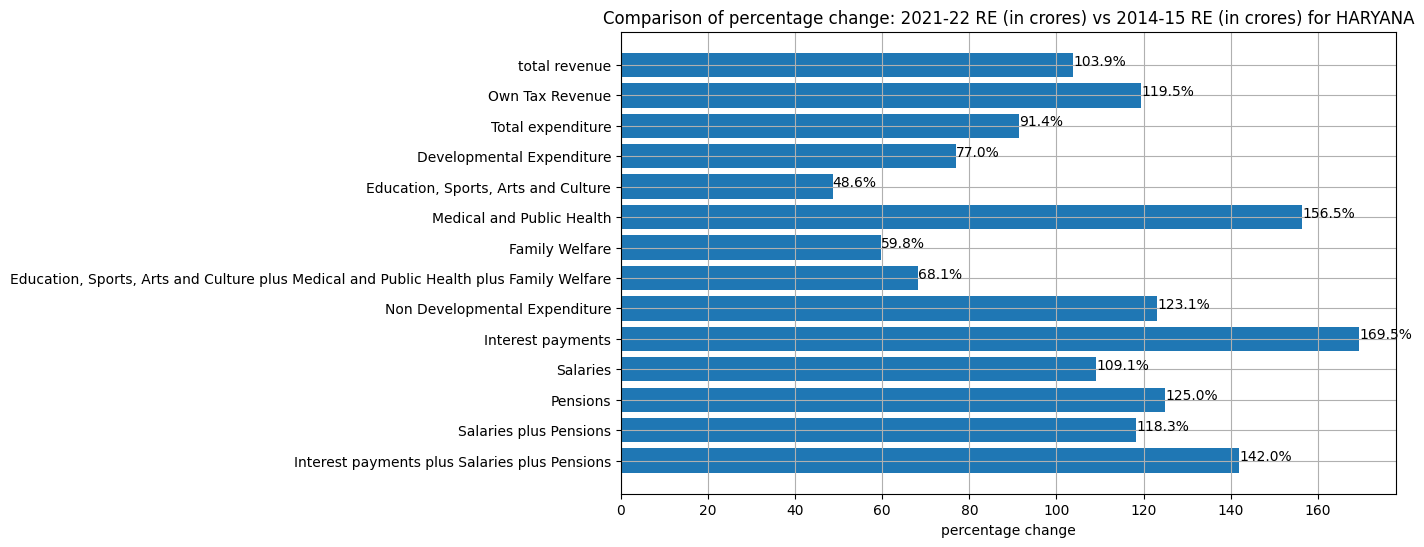

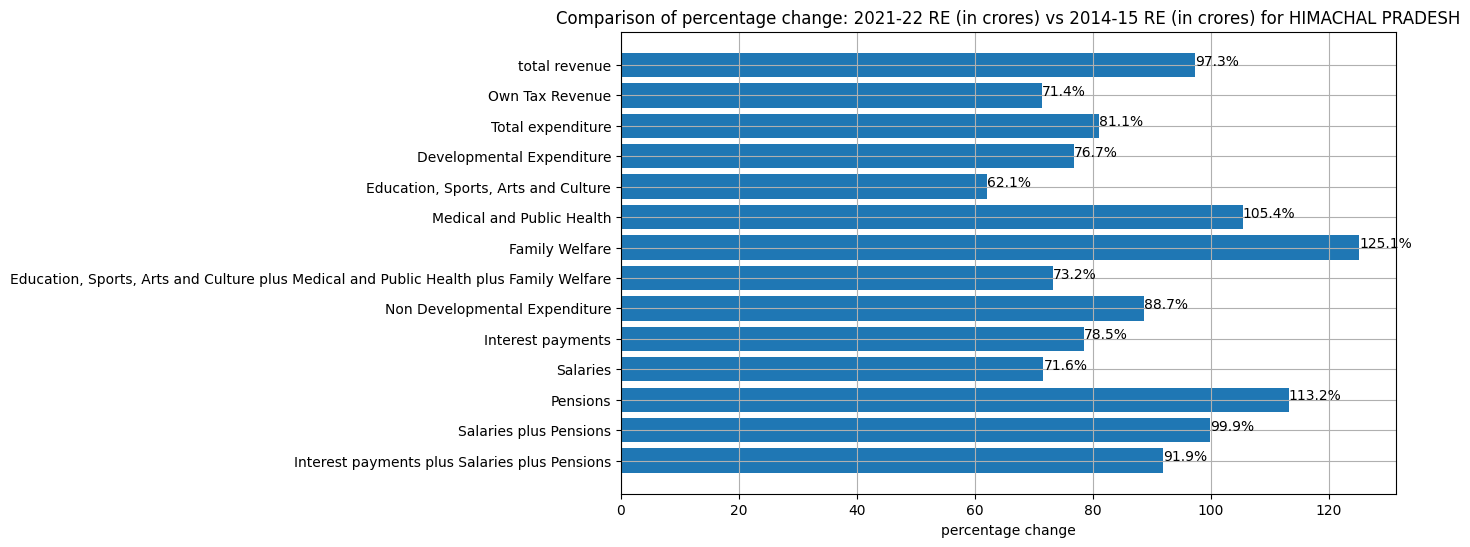

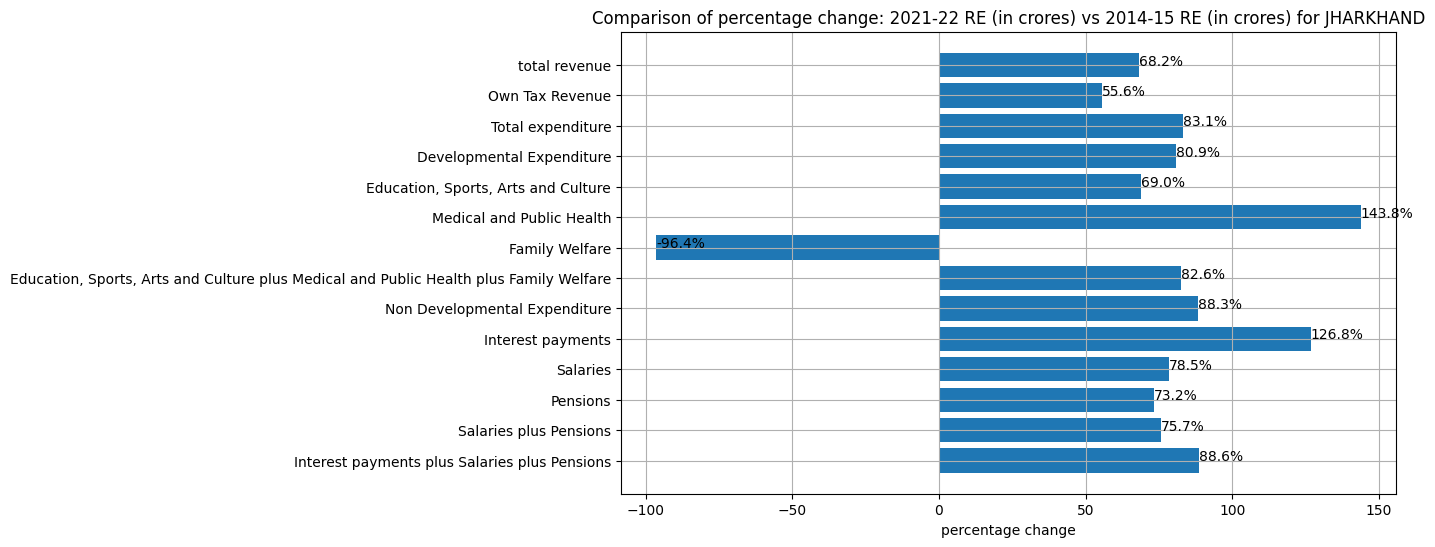

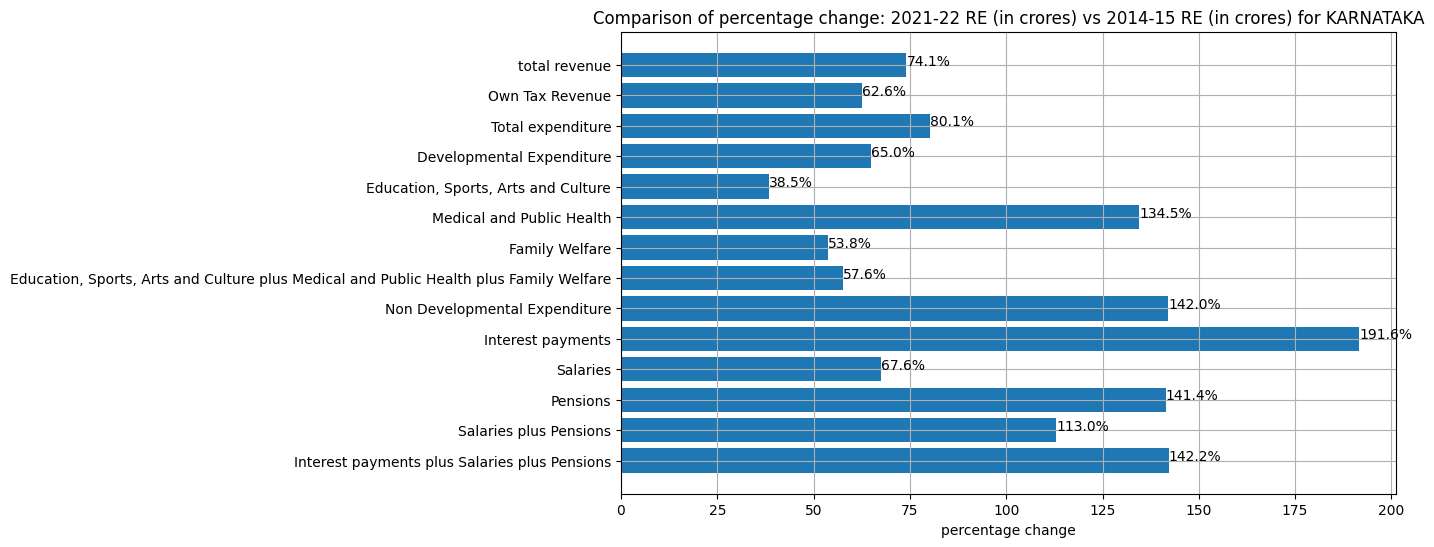

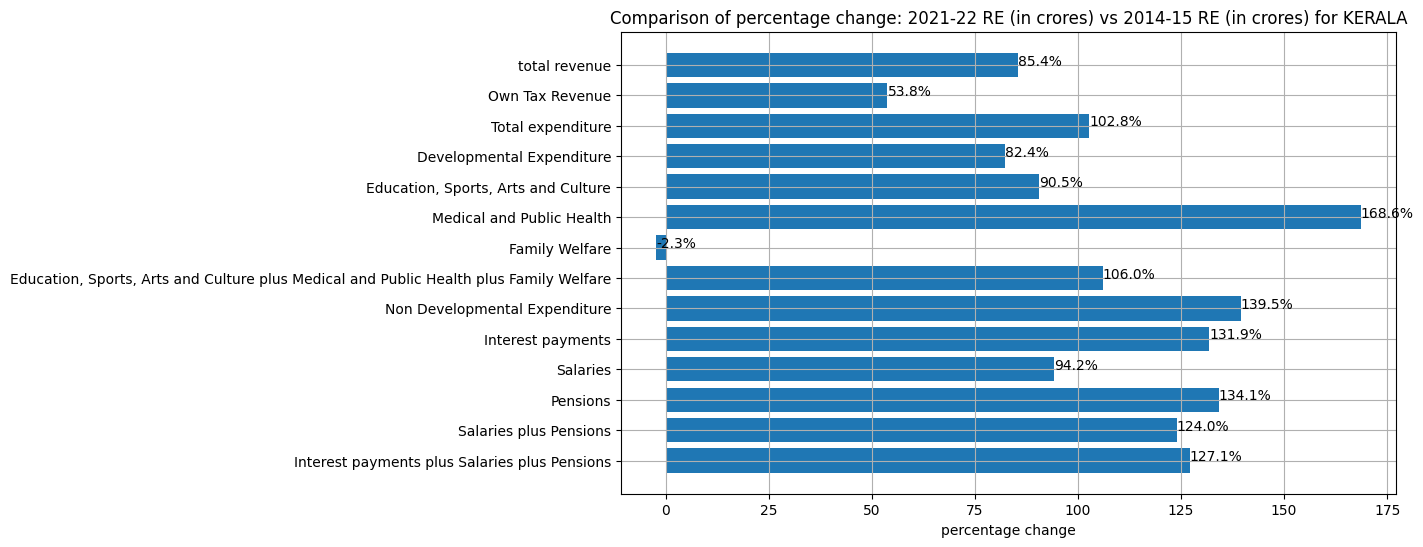

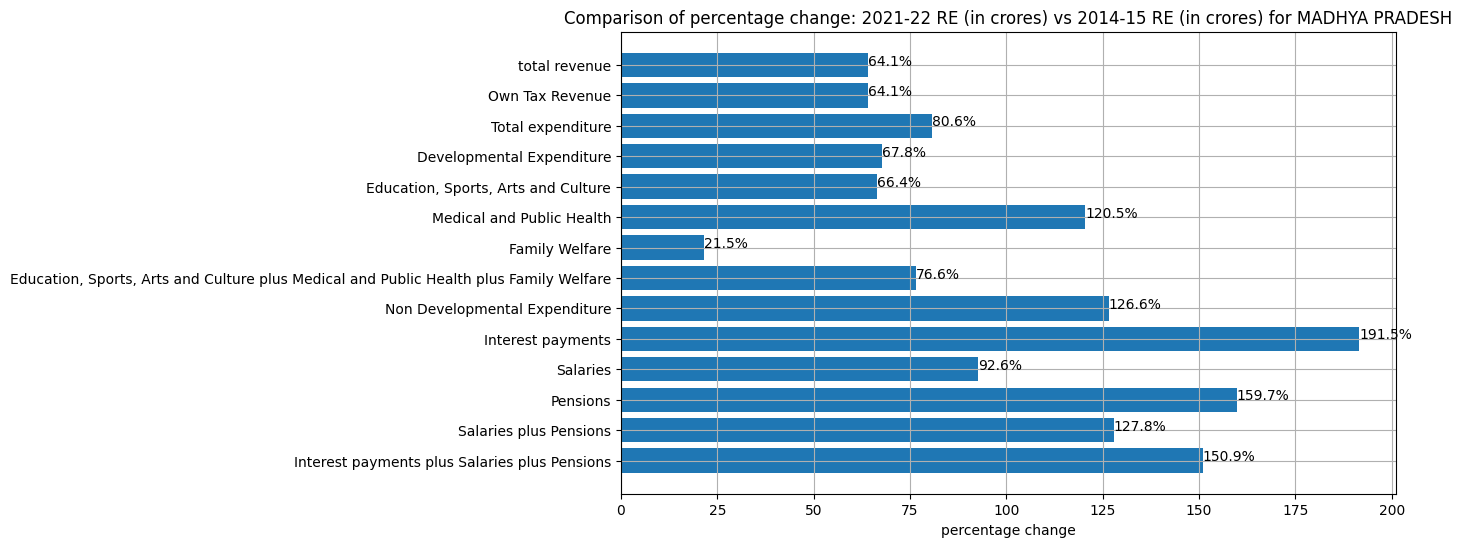

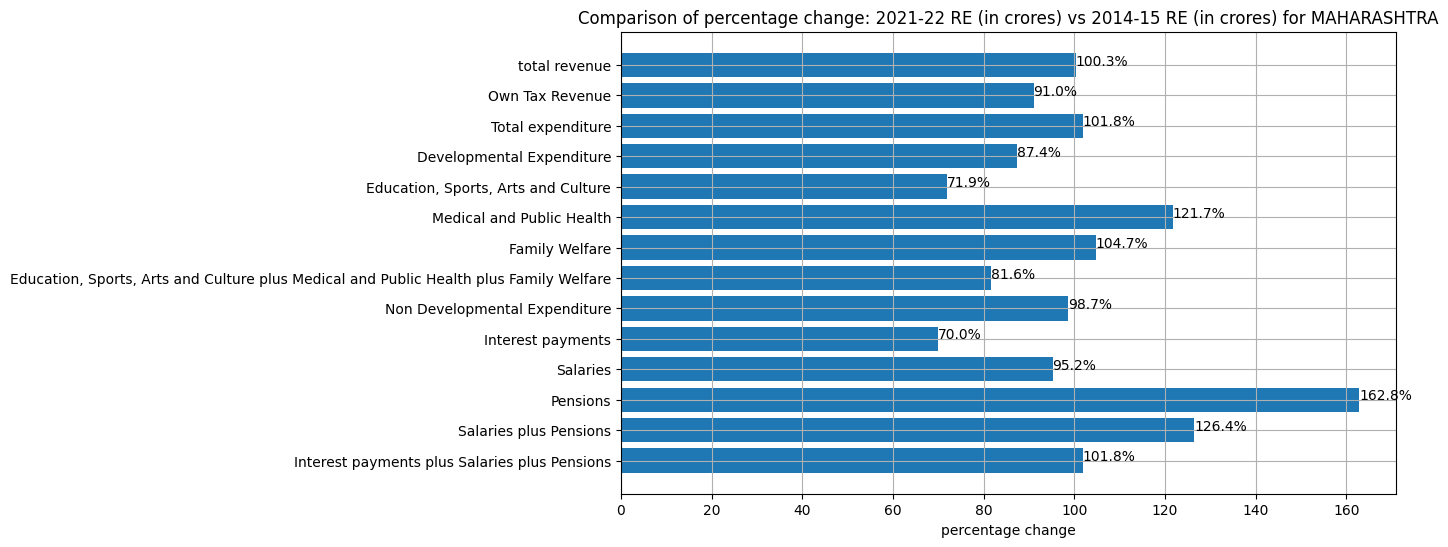

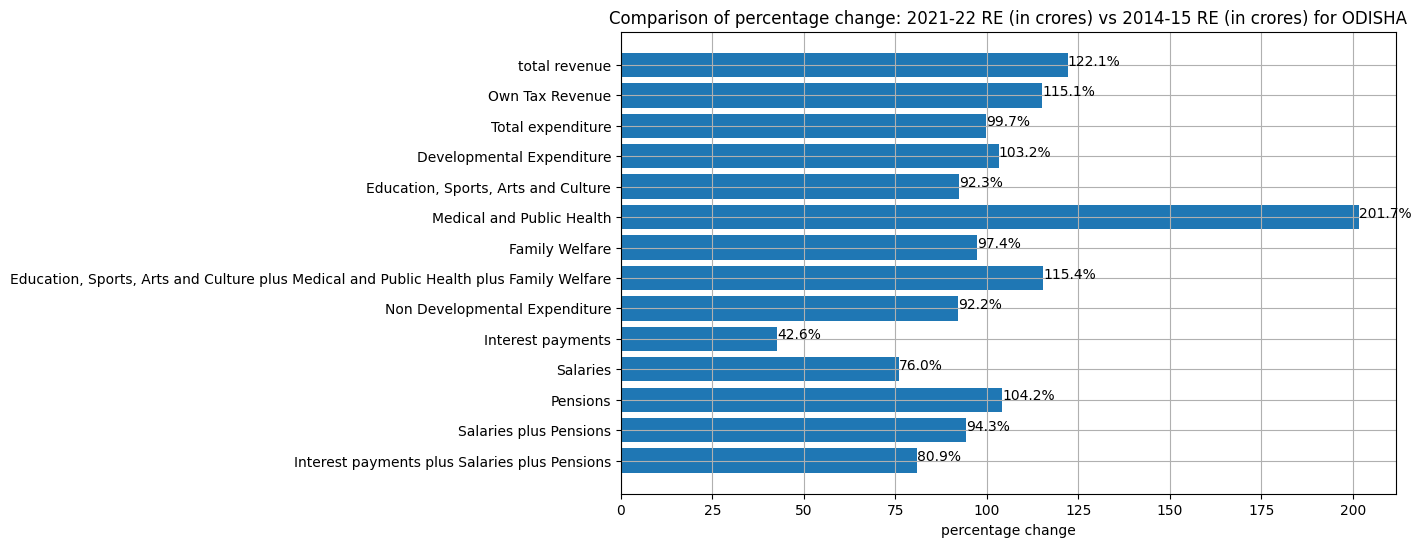

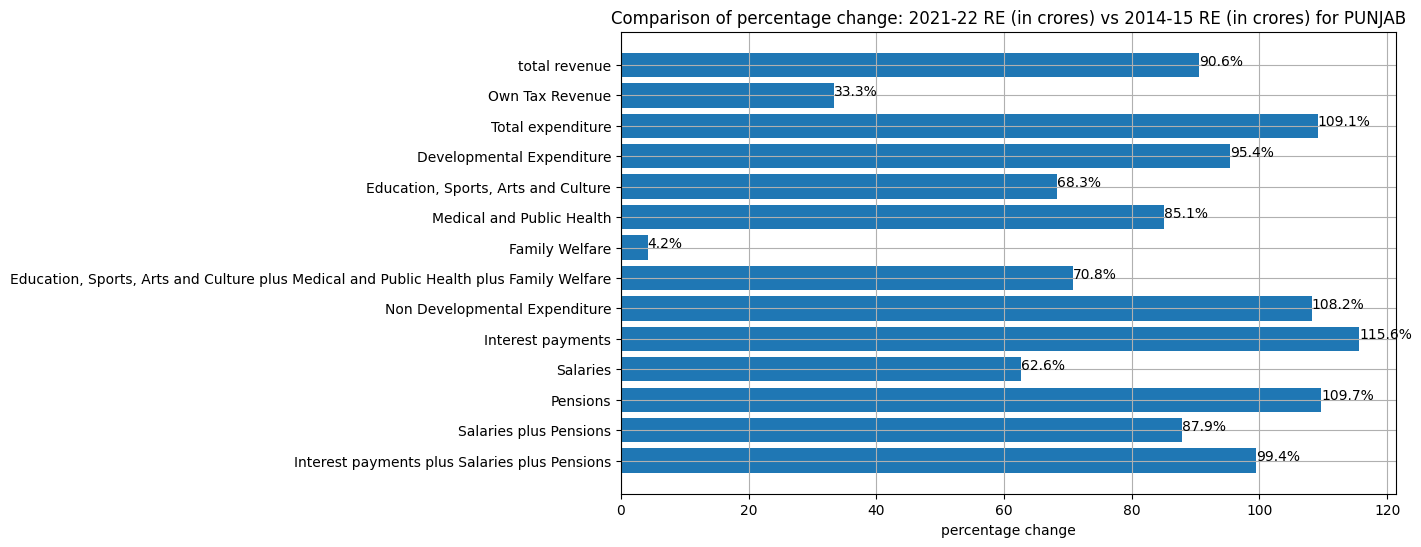

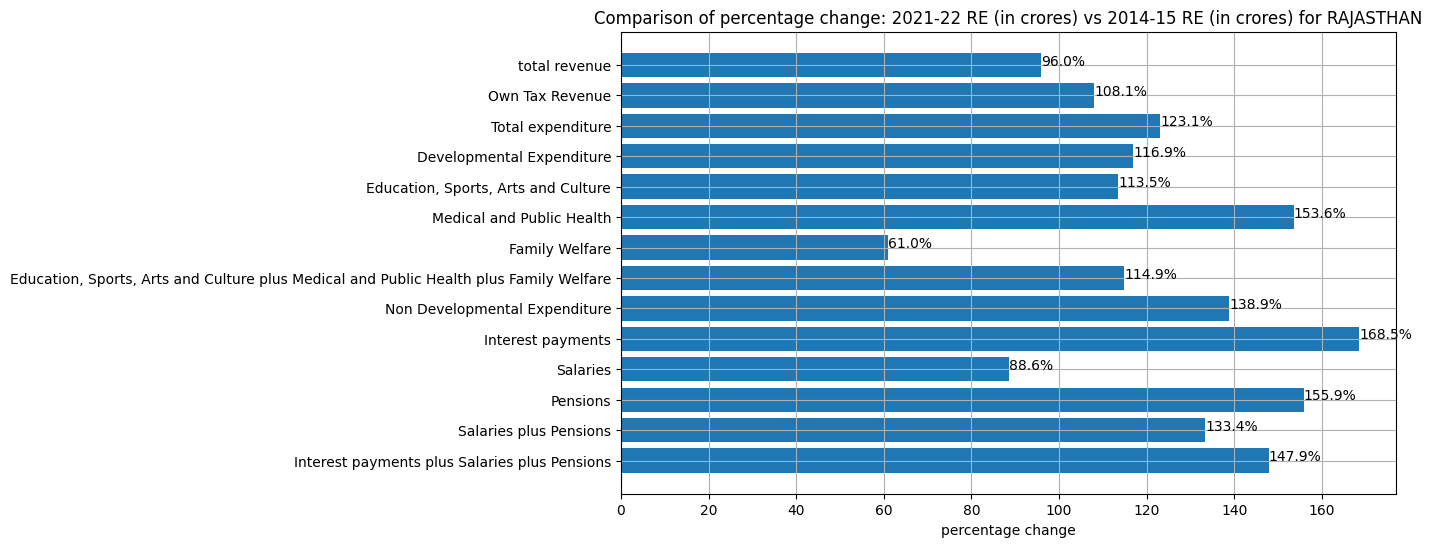

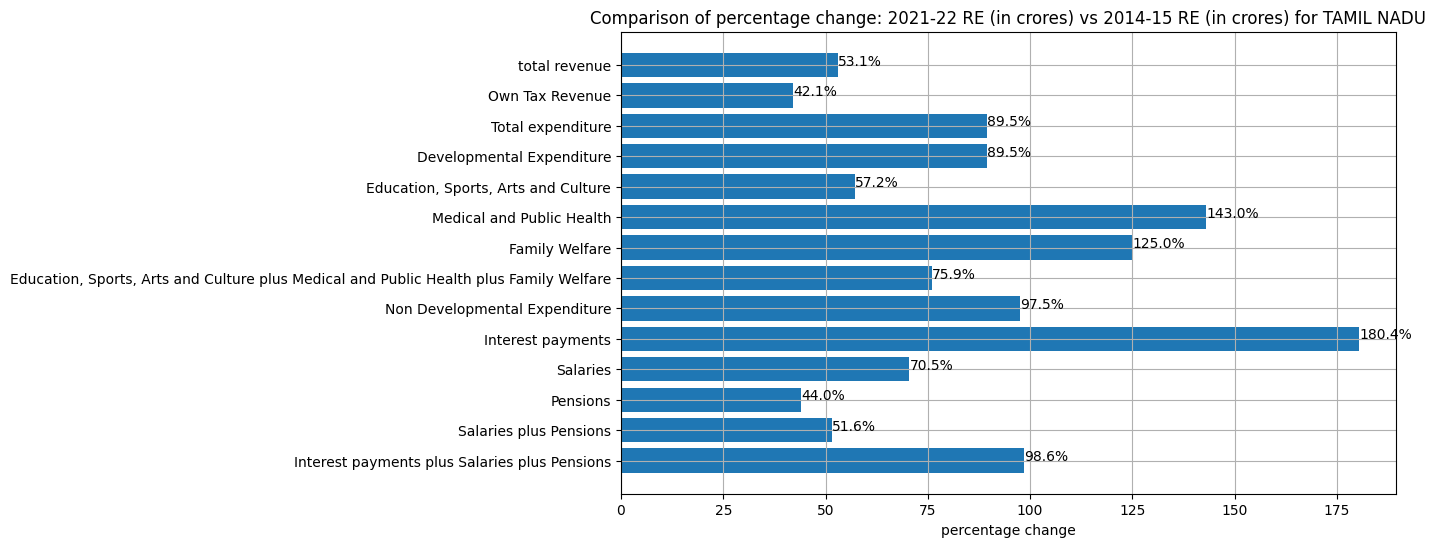

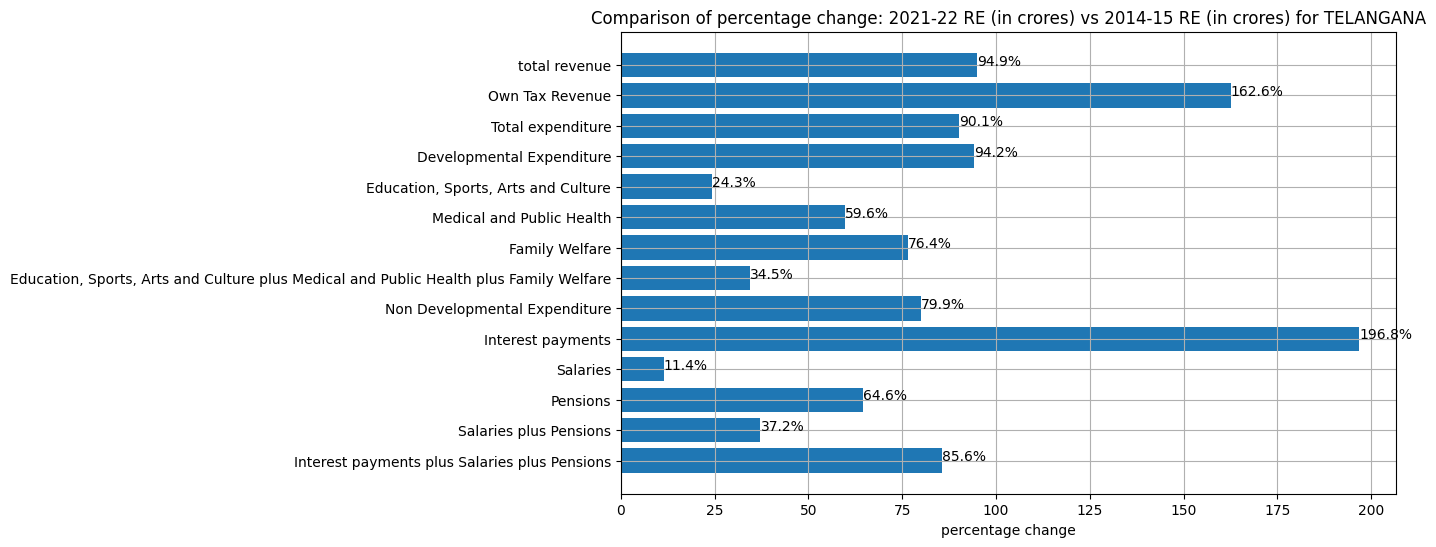

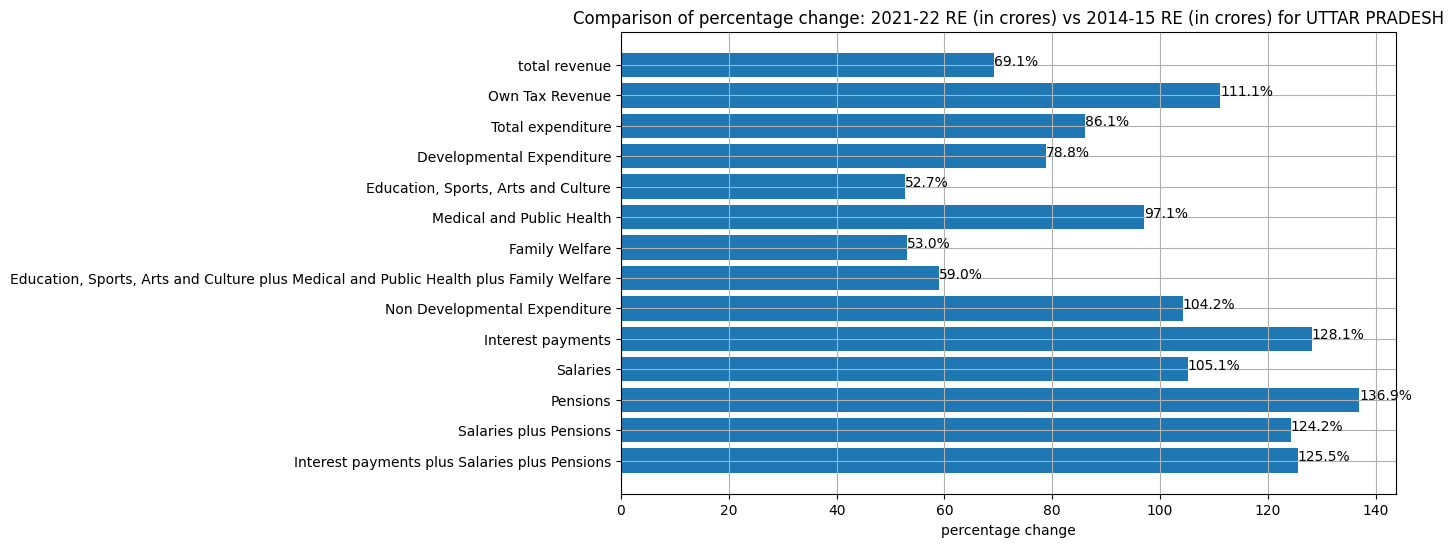

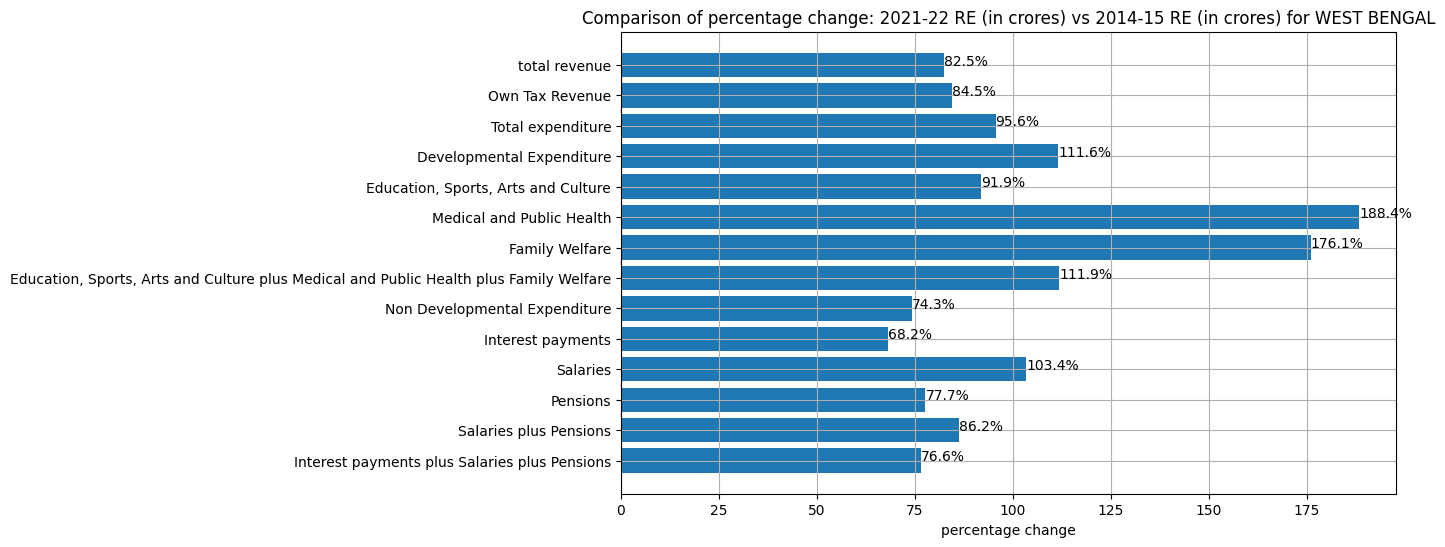

In [51]:
for state in d.keys():
    plt.figure(figsize = (10, 6))
    bars = plt.barh(d[state]['variables'], d[state]['percentage changes'])
    for index, value in enumerate(d[state]['percentage changes']):
        plt.text(value, index, str(value) + '%') 
    title = f'Comparison of percentage change: {year2} vs {year1} for {state}'
    plt.title(title)
    plt.xlabel('percentage change')
    plt.grid(True)
    plt.savefig(f'./images/{title}.png', bbox_inches = 'tight')
    plt.show()

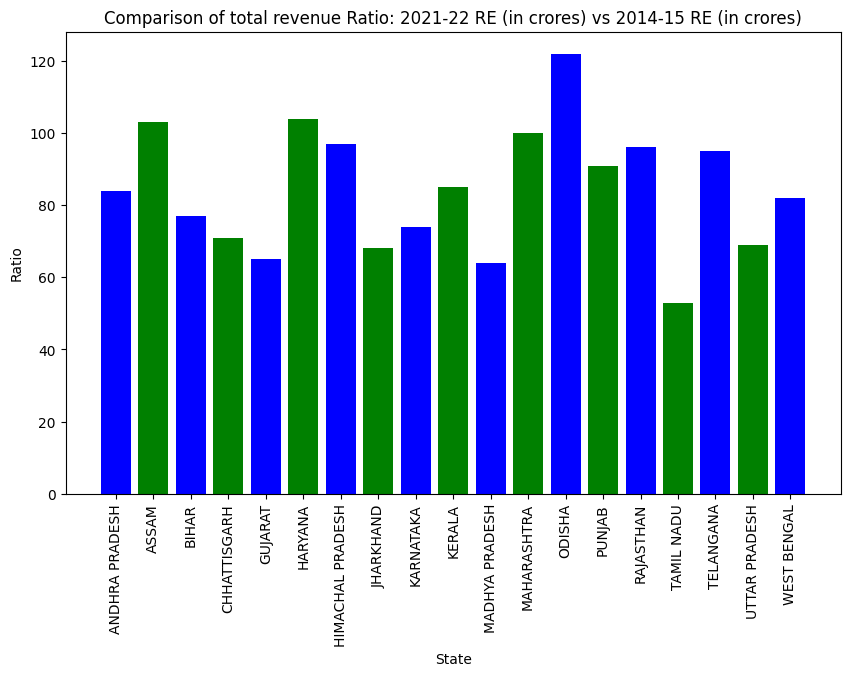

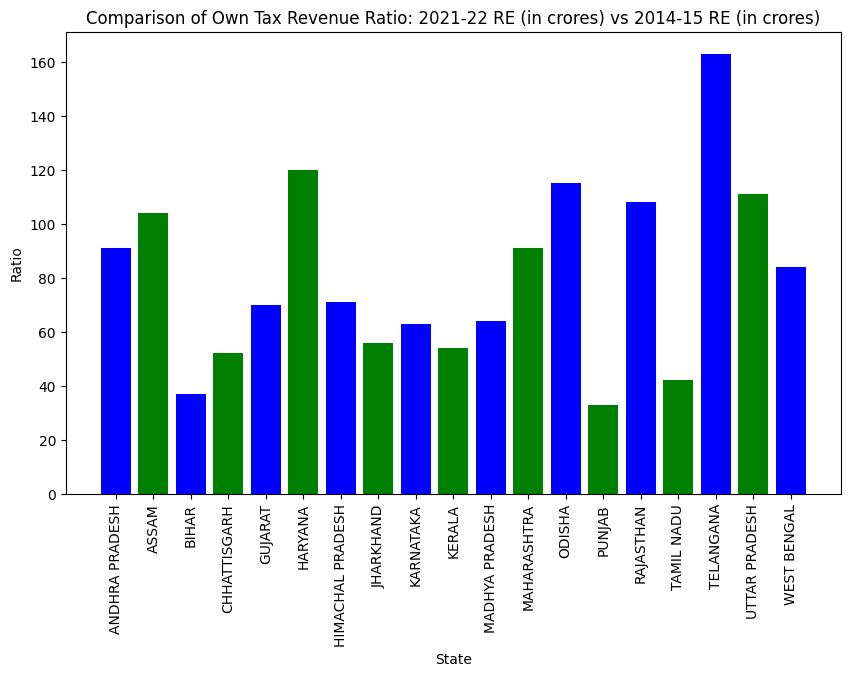

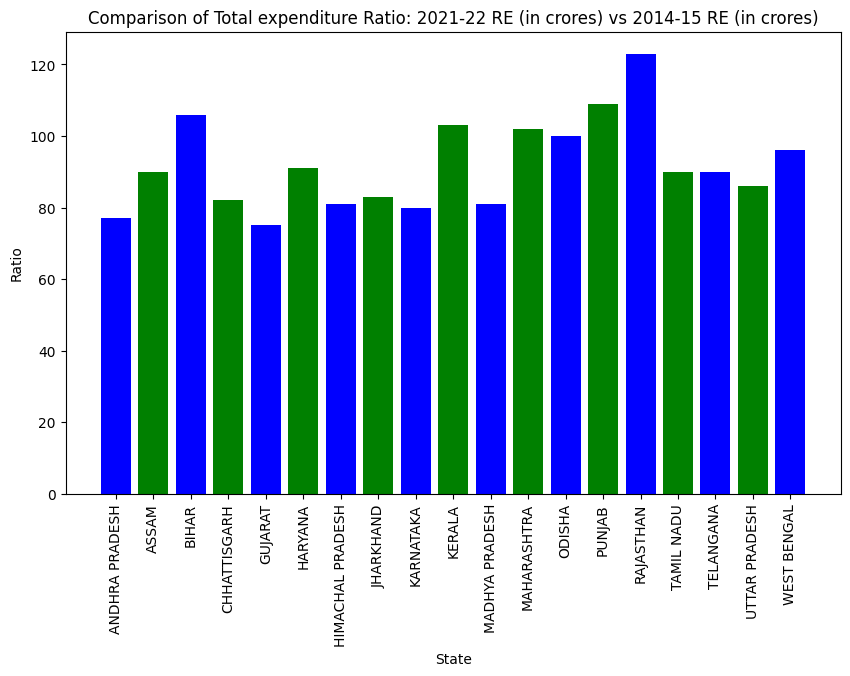

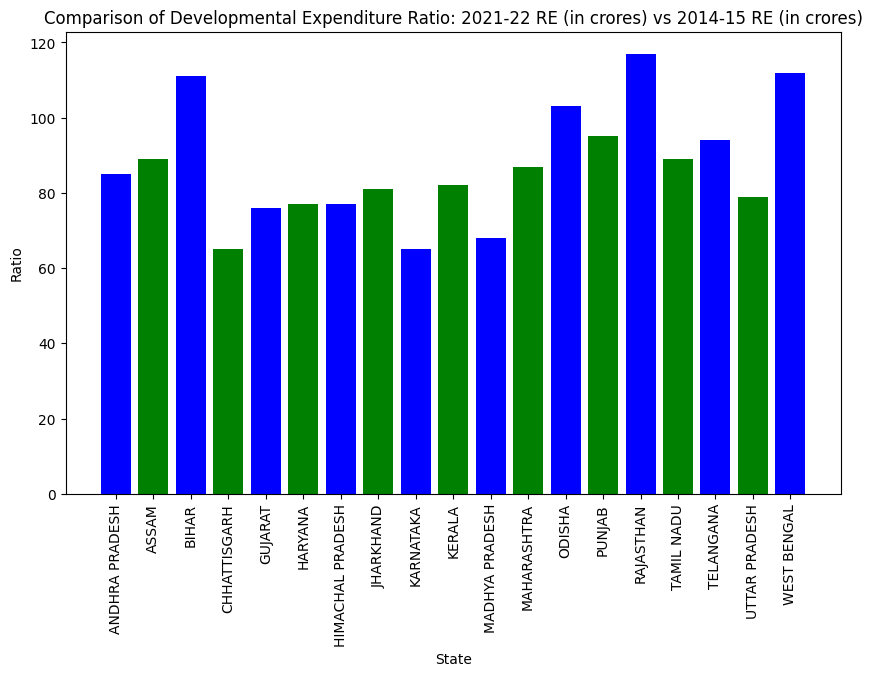

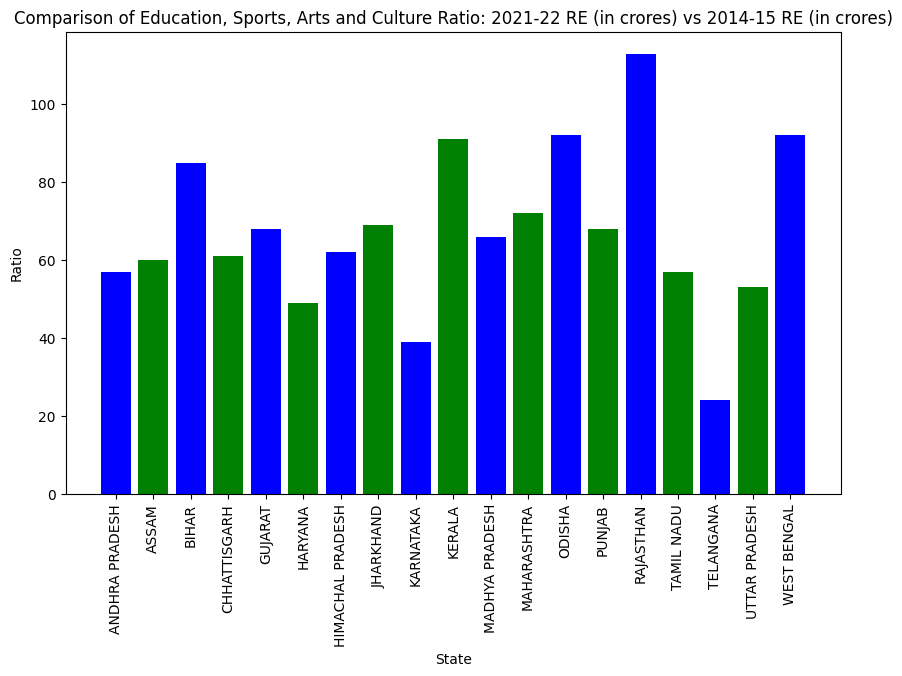

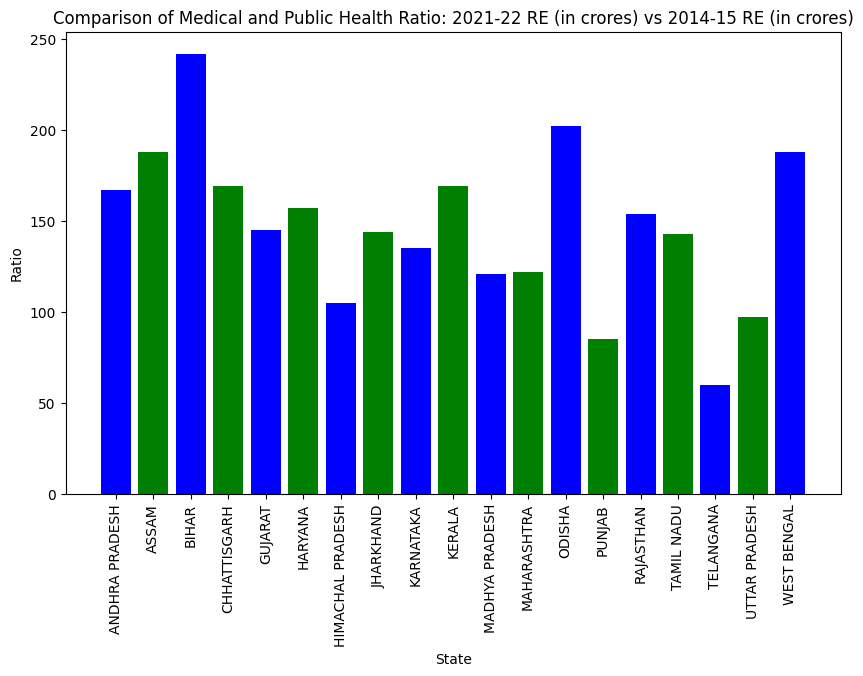

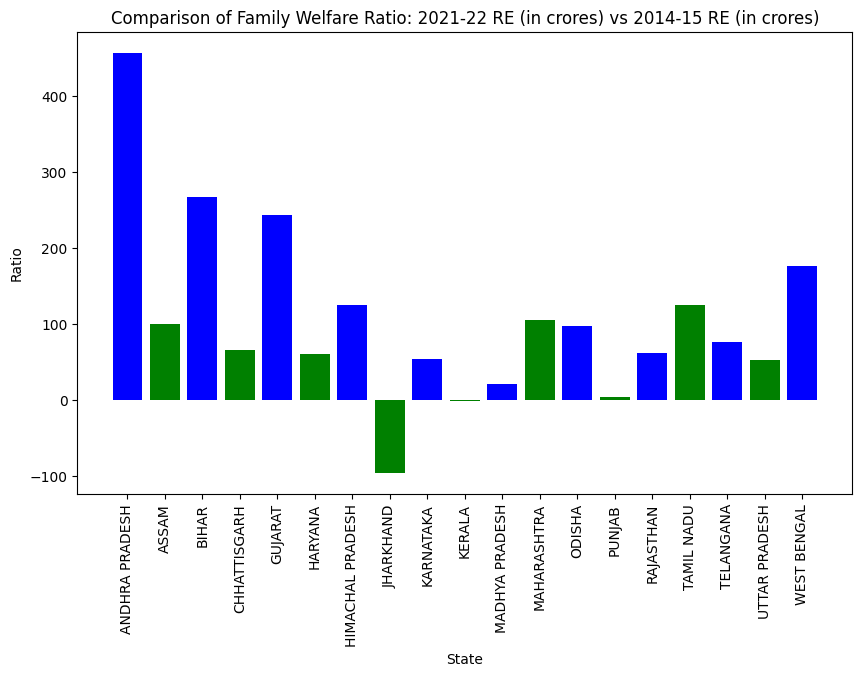

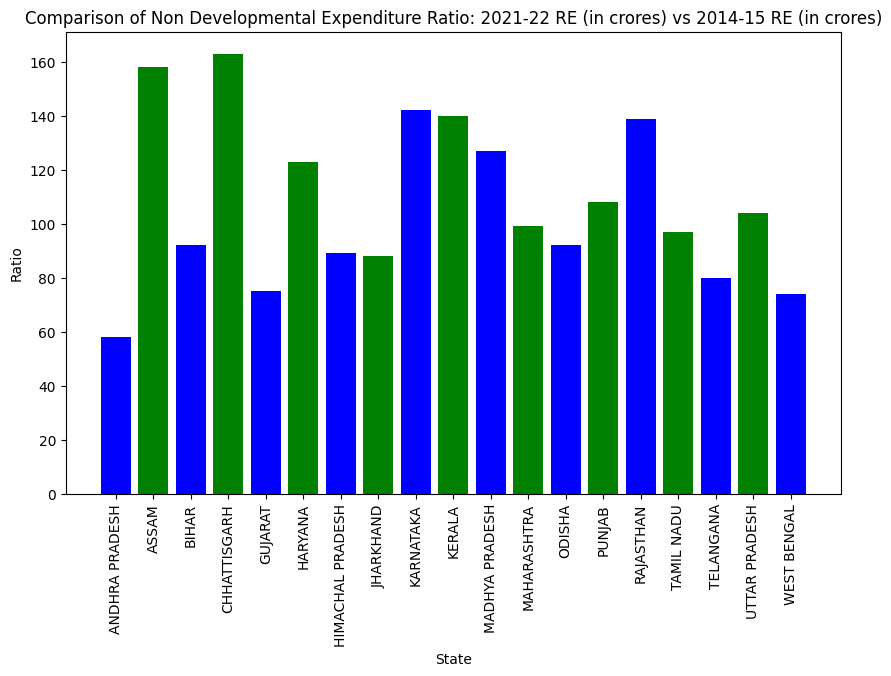

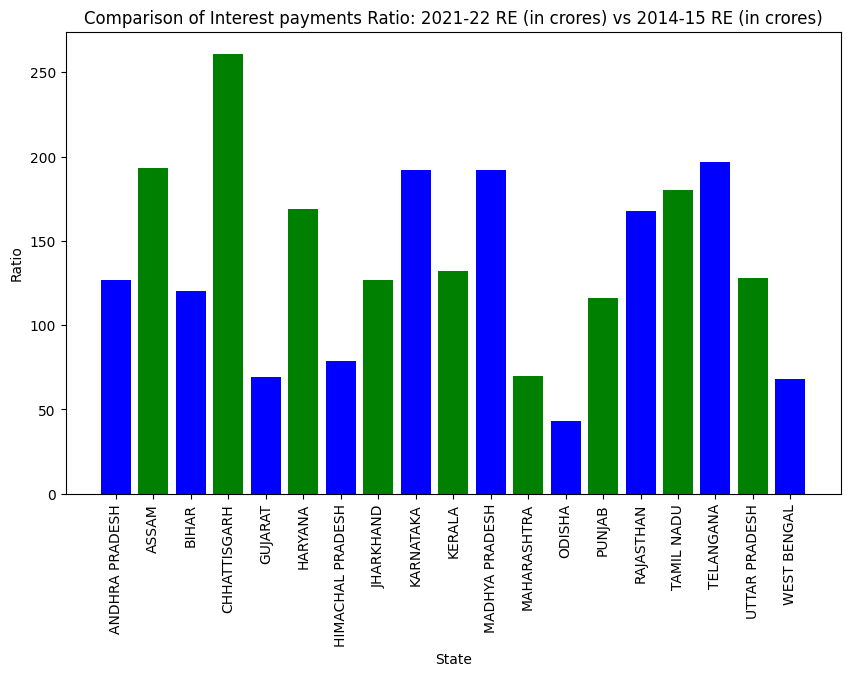

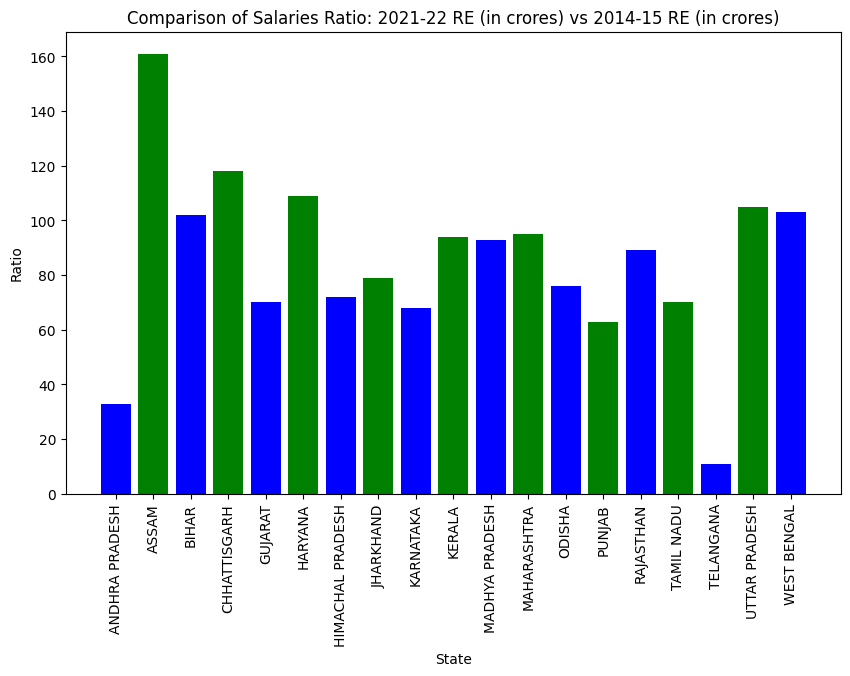

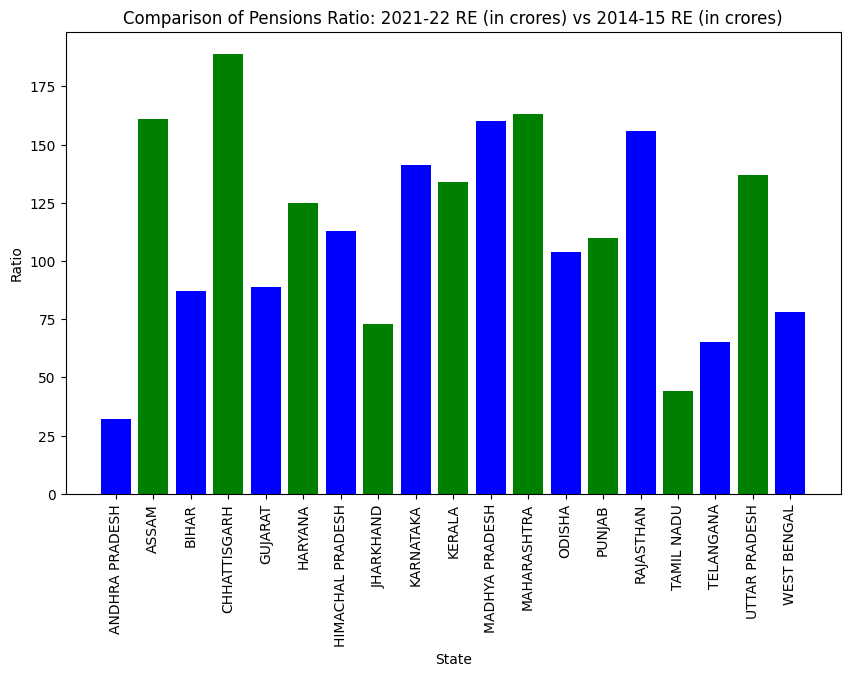

In [28]:
variables = ['total revenue', 'Own Tax Revenue', 'Total expenditure', 'Developmental Expenditure', 'Education, Sports, Arts and Culture', 'Medical and Public Health', 'Family Welfare', 'Non Developmental Expenditure', 'Interest payments', 'Salaries', 'Pensions']
states = pivot_table.index
colors = ['b', 'g']
for variable in variables:
    ratios = pivot_table[(variable, 'percentage change')]
    
    plt.figure(figsize=(10, 6))  # adjust the figure size as needed
    plt.bar(states, ratios, color=colors)
    plt.title(f'Comparison of {variable} Ratio: {year2} vs {year1}')
    plt.xlabel('State')
    plt.ylabel('Ratio')
    plt.xticks(rotation=90)
    plt.show()